# Predictive Modeling and Fairness in Higher Education

**IDC 6940: Capstone** \
**Terms:** Spring and Fall 2025 \
**Professor:** Dr. Ananda Mondal \
**Mentor:** Dr. Agoritsa Polyzou \
**Team Members:** 
- Osmel Cereijo – PID 5702063
- Daniela Zaccardi – PID 4902220

## Overview

#### Problem Area
Universities rely on predictive models to make admissions decisions and identify at-risk students. These models may introduce bias, leading to unfair outcomes for certain student groups.

What is bias?
- Machine Learning Bias: when human biases that skew the original training data or AI algorithm, lead to distorted outputs and potentially harmful outcomes.
- Statistical Bias: systematic error that leads to inaccurate representations of a population.​

Why fairness matters?
- Machine Learning models impact admissions, financial aid, and student success.
- Bias can reinforce inequalities, disadvantaging underrepresented groups.

#### Goals
1. Understand bias in predictive models: explore how machine learning models can develop bias accross different student groups.
2. Migitage bias: investigate methods to alleviate bias while maintaining predictive accuracy.

#### Objectives
1. Predict admissions outcomes using student admission data
2. Evaluate fairness across demographic groups
3. Determine the best methods to remove the most amount of bias possible from models

#### Key Research Questions
- How accurately can we predict admissions decisions?
- What features most strongly influence predictions?
- Does the model have bias, and if yes, which groups are the most effected?
- If bias exists, is it harmful or justifiable?
- What methods can detect, measure, and mitigate bias?
- How much bias can be effectively reduced without sacrificing accuracy?

## Environment Requirements and Libraries

In [4]:
# !pip install pandas matplotlib seaborn
# !pip install imblearn
# !pip install -U imbalanced-learn

In [5]:
# Standard library
import warnings
import textwrap

# General scientific computing & visualization
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import display

# Scikit-learn: model selection, preprocessing, pipelines
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Scikit-learn: models
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC

# Scikit-learn: metrics
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Imbalanced-learn
# from imblearn.over_sampling import SMOTE

In [6]:
pd.set_option('display.max_rows', None)  # show all rows
pd.set_option('display.max_columns', None)  # show all columns if wide
warnings.filterwarnings('ignore')

## 1. Data Acquisition and Exploratory Data Analysis

### 1.2. Loading the Dataset

In [7]:
df_all = pd.read_csv('Students_Fall2024_Dataset.csv')
df_all.columns = df_all.columns.str.upper()

# Show basic info
df_all.info()

# Preview the first few rows
df_all.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48426 entries, 0 to 48425
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STUDENT_GENDER              48426 non-null  object 
 1   TERM_AGE                    48426 non-null  int64  
 2   ETHNICITY                   48426 non-null  object 
 3   CNTRY_OF_BIRTH_DESCR        48426 non-null  object 
 4   HIGHEST_LEVEL_OF_EDUCATION  48426 non-null  object 
 5   INTENDED_MAJOR              48340 non-null  object 
 6   US_MILITARY_STATUS          48426 non-null  object 
 7   HIGH_SCHOOL_STATE_DESC      20257 non-null  object 
 8   HIGH_SCHOOL_TYPE_DESC       18472 non-null  object 
 9   HIGH_SCHL_GPA               18567 non-null  float64
 10  CUM_GPA_UGRD                0 non-null      float64
 11  CUM_GPA_GRAD                0 non-null      float64
 12  TOT_ACT                     2673 non-null   float64
 13  ACT_ENG_SCORE               243

,STUDENT_GENDER,TERM_AGE,ETHNICITY,CNTRY_OF_BIRTH_DESCR,HIGHEST_LEVEL_OF_EDUCATION,INTENDED_MAJOR,US_MILITARY_STATUS,HIGH_SCHOOL_STATE_DESC,HIGH_SCHOOL_TYPE_DESC,HIGH_SCHL_GPA,CUM_GPA_UGRD,CUM_GPA_GRAD,TOT_ACT,ACT_ENG_SCORE,ACT_MAT_SCORE,ACT_READING_SCORE,ACT_SCIENCE_SCORE,ACT_WR_SCORE,ACT2SAT_ERW,ACT2SAT_TOT,TOT_SAT,SAT_ONLY,SAT_QUANT,SAT_VERBAL,SAT_WRITING,SAT2_CUM,SAT2_M_SCORE,SAT2_MS_SCORE,SAT2_RPT,SAT2_RS_SCORE,SAT2_RW_SCORE,SAT2_TOT,SAT2_WL_SCORE,TOT_SAT_W,FL_RESY,STUDENT_ADMIT_TYPE,HONORS_COLLEGE,ADMITTED,ENROLLED,DENIED,INCOMPLETE,MATRICULATED
0,Female,18,White,United States,High School Diploma,Criminal Justice Studies,No Military Status,NaN,NaN,NaN,NaN,NaN,18.0,19.0,14.0,20.0,19.0,NaN,520.0,880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In-State,FTIC,Non-Honors,0,0,1,0,0
1,Male,18,Hispanic/Latino,United States,High School Diploma,Computer & Information Science,No Military Status,FL,PUBL,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210.0,NaN,NaN,NaN,1210.0,590.0,29.0,1210.0,34.0,620.0,1210.0,28.0,NaN,In-State,FTIC,Non-Honors,1,0,0,0,0
2,Female,24,Hispanic/Latino,Cuba,Baccalaureate,"Psychology, General",No Military Status,FL,PUBL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In-State,Graduate,Non-Honors,0,0,0,0,0
3,Female,18,Two or More Races,United States,High School Diploma,"Biology, General",No Military Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out-of-State,FTIC,Non-Honors,0,0,1,0,0
4,Male,24,White,United States,Baccalaureate,Medicine (M.D.),No Military Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In-State,Graduate,Non-Honors,0,0,0,0,0


### 1.2. Explore Admission Type Column

In [8]:
df_all['STUDENT_ADMIT_TYPE'].unique()

array(['FTIC', 'Graduate', 'CC Transfer', 'Other Transfer',
       'Undergraduate Non FTIC', 'Second Bachelors'], dtype=object)

**Remove Graduate Records:**
Exploration of the types of admissions included by FIU in our dataset reveals Graduate application records. Since our project\'s focus is Undergraduate applicants, we need to remove these types of admission applications from our data.

In [9]:
# Create a copy of the dataset excluding Graduate applicants
df = df_all[df_all['STUDENT_ADMIT_TYPE'] != 'Graduate'].copy()

print(f"Original dataset size: {df_all.shape[0]}")
print(f"Dataset size without Graduate applicants: {df.shape[0]}")

Original dataset size: 48426
Dataset size without Graduate applicants: 29829


### 1.3. Understand Dataset Structure

#### 1.3.1. Dataset Size

In [10]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 29829, Columns: 42


#### 1.3.2. Feature Types

In [11]:
# Data types of each column
df.dtypes

STUDENT_GENDER                 object
TERM_AGE                        int64
ETHNICITY                      object
CNTRY_OF_BIRTH_DESCR           object
HIGHEST_LEVEL_OF_EDUCATION     object
INTENDED_MAJOR                 object
US_MILITARY_STATUS             object
HIGH_SCHOOL_STATE_DESC         object
HIGH_SCHOOL_TYPE_DESC          object
HIGH_SCHL_GPA                 float64
CUM_GPA_UGRD                  float64
CUM_GPA_GRAD                  float64
TOT_ACT                       float64
ACT_ENG_SCORE                 float64
ACT_MAT_SCORE                 float64
ACT_READING_SCORE             float64
ACT_SCIENCE_SCORE             float64
ACT_WR_SCORE                  float64
ACT2SAT_ERW                   float64
ACT2SAT_TOT                   float64
TOT_SAT                       float64
SAT_ONLY                      float64
SAT_QUANT                     float64
SAT_VERBAL                    float64
SAT_WRITING                   float64
SAT2_CUM                      float64
SAT2_M_SCORE

**Number of Features by Type:**
- Categorical: 11
- Binary: 5
- Numerical: 26

Preliminary classification based on type and description of the features. After processing some of these might change to binary.

#### 1.3.3. Unique Values per Feature

In [12]:
print('Unique values per feature:')
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} – {len(uniques)}")
    # print(uniques)  # Uncomment to see the actual values

Unique values per feature:
STUDENT_GENDER – 3
TERM_AGE – 53
ETHNICITY – 9
CNTRY_OF_BIRTH_DESCR – 176
HIGHEST_LEVEL_OF_EDUCATION – 11
INTENDED_MAJOR – 89
US_MILITARY_STATUS – 6
HIGH_SCHOOL_STATE_DESC – 131
HIGH_SCHOOL_TYPE_DESC – 6
HIGH_SCHL_GPA – 38
CUM_GPA_UGRD – 1
CUM_GPA_GRAD – 1
TOT_ACT – 31
ACT_ENG_SCORE – 32
ACT_MAT_SCORE – 29
ACT_READING_SCORE – 31
ACT_SCIENCE_SCORE – 31
ACT_WR_SCORE – 11
ACT2SAT_ERW – 49
ACT2SAT_TOT – 100
TOT_SAT – 66
SAT_ONLY – 100
SAT_QUANT – 44
SAT_VERBAL – 41
SAT_WRITING – 39
SAT2_CUM – 101
SAT2_M_SCORE – 57
SAT2_MS_SCORE – 31
SAT2_RPT – 101
SAT2_RS_SCORE – 30
SAT2_RW_SCORE – 55
SAT2_TOT – 101
SAT2_WL_SCORE – 30
TOT_SAT_W – 76
FL_RESY – 2
STUDENT_ADMIT_TYPE – 5
HONORS_COLLEGE – 2
ADMITTED – 2
ENROLLED – 2
DENIED – 2
INCOMPLETE – 1
MATRICULATED – 2


In [13]:
# Threshold for low-cardinality features
threshold = 10  

low_cardinality = []
high_cardinality = []

for col in df.columns:
    # Count unique values including NaN
    n_unique = df[col].nunique(dropna=False)
    
    if n_unique <= threshold:
        low_cardinality.append(col)
    else:
        high_cardinality.append(col)

print("Low-cardinality features (≤10 unique values):")
print(low_cardinality)
print("\nHigh-cardinality features (>10 unique values):")
print(high_cardinality)

# Optional: Summary counts
print(f"\nTotal features: {len(df.columns)}")
print(f"Low-cardinality features: {len(low_cardinality)}")
print(f"High-cardinality features: {len(high_cardinality)}")

Low-cardinality features (≤10 unique values):
['STUDENT_GENDER', 'ETHNICITY', 'US_MILITARY_STATUS', 'HIGH_SCHOOL_TYPE_DESC', 'CUM_GPA_UGRD', 'CUM_GPA_GRAD', 'FL_RESY', 'STUDENT_ADMIT_TYPE', 'HONORS_COLLEGE', 'ADMITTED', 'ENROLLED', 'DENIED', 'INCOMPLETE', 'MATRICULATED']

High-cardinality features (>10 unique values):
['TERM_AGE', 'CNTRY_OF_BIRTH_DESCR', 'HIGHEST_LEVEL_OF_EDUCATION', 'INTENDED_MAJOR', 'HIGH_SCHOOL_STATE_DESC', 'HIGH_SCHL_GPA', 'TOT_ACT', 'ACT_ENG_SCORE', 'ACT_MAT_SCORE', 'ACT_READING_SCORE', 'ACT_SCIENCE_SCORE', 'ACT_WR_SCORE', 'ACT2SAT_ERW', 'ACT2SAT_TOT', 'TOT_SAT', 'SAT_ONLY', 'SAT_QUANT', 'SAT_VERBAL', 'SAT_WRITING', 'SAT2_CUM', 'SAT2_M_SCORE', 'SAT2_MS_SCORE', 'SAT2_RPT', 'SAT2_RS_SCORE', 'SAT2_RW_SCORE', 'SAT2_TOT', 'SAT2_WL_SCORE', 'TOT_SAT_W']

Total features: 42
Low-cardinality features: 14
High-cardinality features: 28


**Group Features by Cardinality:**
- Low-cardinality categorical features are good candidates for one-hot encoding.
- High-cardinality categorical features may need grouping, hashing, or embedding instead of one-hot.

Note: Numeric features are naturally excluded unless they’re coded as categorical.

### 1.4. Check for Missing Values

In [14]:
df.isnull().sum()

STUDENT_GENDER                    0
TERM_AGE                          0
ETHNICITY                         0
CNTRY_OF_BIRTH_DESCR              0
HIGHEST_LEVEL_OF_EDUCATION        0
INTENDED_MAJOR                   86
US_MILITARY_STATUS                0
HIGH_SCHOOL_STATE_DESC        14247
HIGH_SCHOOL_TYPE_DESC         15737
HIGH_SCHL_GPA                 11266
CUM_GPA_UGRD                  29829
CUM_GPA_GRAD                  29829
TOT_ACT                       27156
ACT_ENG_SCORE                 27391
ACT_MAT_SCORE                 27392
ACT_READING_SCORE             27392
ACT_SCIENCE_SCORE             27393
ACT_WR_SCORE                  29471
ACT2SAT_ERW                   25721
ACT2SAT_TOT                   25484
TOT_SAT                       29683
SAT_ONLY                      18248
SAT_QUANT                     29683
SAT_VERBAL                    29683
SAT_WRITING                   29695
SAT2_CUM                      17713
SAT2_M_SCORE                  17712
SAT2_MS_SCORE               

In [15]:
# Features with 90% or more missing values

# Total rows
total_rows = len(df)

# Calculate percentage of missing values per column
missing_percent = (df.isnull().sum() / total_rows) * 100

# Format and display only columns with missing values
missing_percent_90 = missing_percent[missing_percent >= 90].sort_values(ascending=False)
missing_percent_90 = missing_percent_90.round(2)

missing_percent_90 = missing_percent_90.reset_index()
print(f"Features at least 90% missing values (total {len(missing_percent_90)}):")
missing_percent_90.columns = ['Feature', 'Missing (%)']
print(missing_percent_90)

Features at least 90% missing values (total 13):
              Feature  Missing (%)
0        CUM_GPA_UGRD       100.00
1        CUM_GPA_GRAD       100.00
2         SAT_WRITING        99.55
3           TOT_SAT_W        99.55
4             TOT_SAT        99.51
5           SAT_QUANT        99.51
6          SAT_VERBAL        99.51
7        ACT_WR_SCORE        98.80
8   ACT_SCIENCE_SCORE        91.83
9       ACT_MAT_SCORE        91.83
10  ACT_READING_SCORE        91.83
11      ACT_ENG_SCORE        91.83
12            TOT_ACT        91.04


**90% or More Missing Values:** 13 features with at least 90% values missing accross the dataset. Undergraduate and graduate GPA is missing completly, so we will drop these features. The rest are related to SAT and ACT scores/sub-scores. We will continue to evaluate possible combinations to see if we can increase the availability of these features before dropping them. 

In [16]:
# Copy to avoid modifying original
df_check = df.copy()

# Define what counts as missing in categorical columns
extra_missing = ['Not Reported', ' ', 'Missing/Unknown']

# Replace those with np.nan so they’re counted consistently
df_check = df_check.replace(extra_missing, np.nan)

# Total rows
total_rows = len(df_check)

# Calculate percentage of missing values per column
missing_percent = (df_check.isnull().sum() / total_rows) * 100

# Filter: only columns with >= 90% missing
missing_percent_90 = missing_percent[missing_percent >= 90].sort_values(ascending=False).round(2)

# Convert to DataFrame for display
missing_percent_90 = missing_percent_90.reset_index()
missing_percent_90.columns = ['Feature', 'Missing (%)']

print(f"Features with at least 90% missing values (total {len(missing_percent_90)}):")
display(missing_percent_90)

Features with at least 90% missing values (total 13):


,Feature,Missing (%)
0,CUM_GPA_UGRD,100.00
1,CUM_GPA_GRAD,100.00
2,SAT_WRITING,99.55
3,TOT_SAT_W,99.55
4,TOT_SAT,99.51
5,SAT_QUANT,99.51
6,SAT_VERBAL,99.51
7,ACT_WR_SCORE,98.80
8,ACT_SCIENCE_SCORE,91.83
9,ACT_MAT_SCORE,91.83


In [17]:
# Features with missing values between 50% and 90%

# Total rows
total_rows = len(df)

# Calculate percentage of missing values per column
missing_percent = (df.isnull().sum() / total_rows) * 100

# Format and display only columns with missing values
missing_percent_filtered = missing_percent[(missing_percent < 90) & (missing_percent >= 50)]
missing_percent_50 = missing_percent_filtered.sort_values(ascending=False)
missing_percent_50 = missing_percent_50.round(2)

missing_df_50 = missing_percent_50.reset_index()
print(f"Features with 50%–90% missing values (total {len(missing_df_50)}):")
missing_df_50.columns = ['Feature', 'Missing (%)']
print(missing_df_50)

Features with 50%–90% missing values (total 12):
                  Feature  Missing (%)
0             ACT2SAT_ERW        86.23
1             ACT2SAT_TOT        85.43
2           SAT2_RS_SCORE        63.59
3           SAT2_MS_SCORE        63.58
4           SAT2_WL_SCORE        63.58
5                SAT_ONLY        61.18
6                SAT2_CUM        59.38
7                SAT2_TOT        59.38
8            SAT2_M_SCORE        59.38
9           SAT2_RW_SCORE        59.38
10               SAT2_RPT        58.76
11  HIGH_SCHOOL_TYPE_DESC        52.76


**Missing Values Between 50% to 90%:** 12 features with at least 50% values missing accross the dataset (and less than 90%). The majority are still related to SAT and ACT scores/sub-scores. We will continue to evaluate possible combinations to see if we can increase the availability of these features before dropping them. 

In [18]:
# Copy to avoid modifying original
df_check = df.copy()

# Define what counts as missing (extend for categorical and placeholders)
extra_missing = ['Not Reported', ' ', 'Missing/Unknown']

# Replace those with np.nan so they’re treated consistently
df_check = df_check.replace(extra_missing, np.nan)

# Total rows
total_rows = len(df_check)

# Calculate percentage of missing values per column
missing_percent = (df_check.isnull().sum() / total_rows) * 100

# Filter: between 50% and 90% missing
missing_percent_filtered = missing_percent[(missing_percent < 90) & (missing_percent >= 50)]
missing_percent_50 = missing_percent_filtered.sort_values(ascending=False).round(2)

# Convert to DataFrame for display
missing_df_50 = missing_percent_50.reset_index()
missing_df_50.columns = ['Feature', 'Missing (%)']

print(f"Features with 50%–90% missing values (total {len(missing_df_50)}):")
display(missing_df_50)

Features with 50%–90% missing values (total 13):


,Feature,Missing (%)
0,ACT2SAT_ERW,86.23
1,ACT2SAT_TOT,85.43
2,SAT2_RS_SCORE,63.59
3,SAT2_MS_SCORE,63.58
4,SAT2_WL_SCORE,63.58
5,SAT_ONLY,61.18
6,SAT2_CUM,59.38
7,SAT2_TOT,59.38
8,SAT2_M_SCORE,59.38
9,SAT2_RW_SCORE,59.38


In [19]:
# Features with less than 50% missing values

# Total rows
total_rows = len(df)

# Calculate percentage of missing values per column
missing_percent = (df.isnull().sum() / total_rows) * 100

# Format and display only columns with missing values
missing_percent_less_50 = missing_percent[missing_percent < 50].sort_values(ascending=False)
missing_percent_less_50 = missing_percent_less_50.round(2)

missing_percent_less_50 = missing_percent_less_50.reset_index()
print(f"Features with less than 50% missing values (total {len(missing_percent_less_50)}):")
missing_percent_less_50.columns = ['Feature', 'Missing (%)']
print(missing_percent_less_50)

Features with less than 50% missing values (total 17):
                       Feature  Missing (%)
0       HIGH_SCHOOL_STATE_DESC        47.76
1                HIGH_SCHL_GPA        37.77
2               INTENDED_MAJOR         0.29
3           STUDENT_ADMIT_TYPE         0.00
4                   INCOMPLETE         0.00
5                       DENIED         0.00
6                     ENROLLED         0.00
7                     ADMITTED         0.00
8               HONORS_COLLEGE         0.00
9               STUDENT_GENDER         0.00
10                     FL_RESY         0.00
11                    TERM_AGE         0.00
12          US_MILITARY_STATUS         0.00
13  HIGHEST_LEVEL_OF_EDUCATION         0.00
14        CNTRY_OF_BIRTH_DESCR         0.00
15                   ETHNICITY         0.00
16                MATRICULATED         0.00


**Less than 50% Missing Values:** the rest of the features (17) have less than 50% missing values. All features related to High-School information however, seems to be missing for a considerate amount of the applications (considering that HIGH_SCHOOL_TYPE_DESC has more than 53% missing values). This might be because there's a mix of international students in the dataset.

Excluding the high-school features, the rest (15) do not have empty values. Further exploration is needed to see if any have values such as Unknown and consider how these might impact our results.

### 1.5. Dataset Overview

#### 1.5.1. Admitted

In [20]:
# Count admitted vs not admitted
admission_counts = df['ADMITTED'].value_counts(dropna=False).sort_index()  # 0 then 1

# Calculate percentages
admission_percent = (admission_counts / len(df) * 100).round(1)

# Combine into a DataFrame
admission_summary = pd.DataFrame({
    'Count': admission_counts,
    'Percentage': admission_percent
}).reset_index()

# Rename columns for clarity
admission_summary.columns = ['Admitted (0=No,1=Yes)', 'Count', 'Percentage (%)']

print(admission_summary)

   Admitted (0=No,1=Yes)  Count  Percentage (%)
0                      0  15553            52.1
1                      1  14276            47.9


Admitted versus Denied: Not admitted is not the same as denied

In [21]:
# Cross-tabulation of both columns
pd.crosstab(df['ADMITTED'], df['DENIED'])

DENIED,0,1
ADMITTED,,
0,3457,12096
1,14276,0


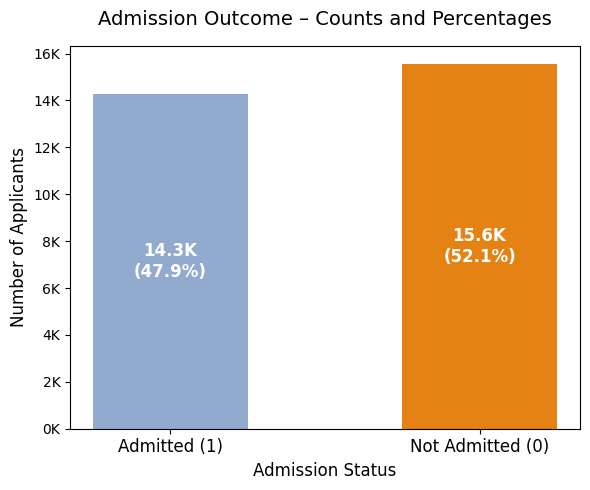

In [22]:
col = 'ADMITTED'

# Counts and percentages
counts = df[col].value_counts().sort_index()

# Reorder so Admitted (1) comes first
counts = counts.reindex([1, 0])
percent = (counts / counts.sum() * 100).round(1)

# Plot
fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(
    counts.index.astype(str),
    counts.values,
    color=['#92AACE','#E48313'],  # admitted = blue, not admitted = orange
    width=0.5
)

# Add labels inside bars (centered, formatted as K)
for i, (c, p) in enumerate(zip(counts.values, percent.values)):
    label = f"{c/1000:.1f}K\n({p:.1f}%)" if c >= 1000 else f"{c}\n({p:.1f}%)"
    ax.text(
        i, c/2,  # middle of bar
        label,
        ha='center', va='center',
        fontsize=12, fontweight='bold', color='white'
    )

# Style
ax.set_title("Admission Outcome – Counts and Percentages", fontsize=14, pad=15)
ax.set_xlabel("Admission Status", fontsize=12)
ax.set_ylabel("Number of Applicants", fontsize=12)
ax.set_xticks([0,1])
ax.set_xticklabels(['Admitted (1)', 'Not Admitted (0)'], fontsize=12)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax.grid(False)

plt.tight_layout()
plt.show()

#### 1.5.2. Admission Types

In [23]:
# Get counts
counts = df['STUDENT_ADMIT_TYPE'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Admit Type': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Admit Type,Count,Percentage (%)
0,FTIC,21032,70.5
1,CC Transfer,4645,15.6
2,Other Transfer,3360,11.3
3,Second Bachelors,496,1.7
4,Undergraduate Non FTIC,296,1.0


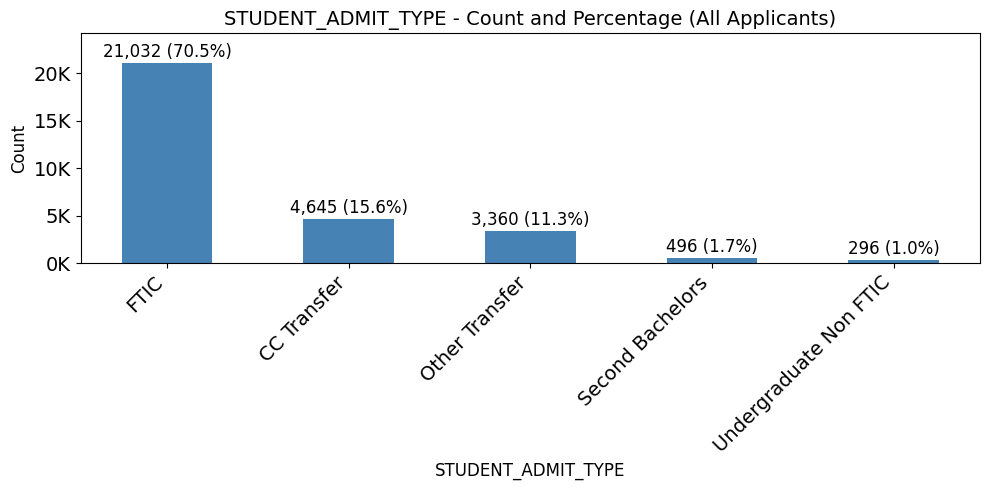

In [24]:
col = 'STUDENT_ADMIT_TYPE'

# Compute counts and percentages
value_counts = df[col].value_counts(dropna=False)
value_percent = (value_counts / value_counts.sum() * 100).round(1)

# Prepare x positions and data
categories = value_counts.index
counts = value_counts.values
percents = value_percent.values

x = np.arange(len(categories))
bar_width = 0.5

# Plot vertical bar chart
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(x, counts, width=bar_width, color='steelblue')

# Title and labels
ax.set_title(f'{col} - Count and Percentage (All Applicants)', fontsize=14)
ax.set_xlabel(col, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, rotation=45, ha='right')  # 45° diagonal

ax.set_xticklabels(categories, fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Add labels above bars
max_count = counts.max()
for i, (count, pct) in enumerate(zip(counts, percents)):
    ax.text(
        x[i],
        count + max_count * 0.01,
        f"{int(count):,} ({pct:.1f}%)",
        ha='center', va='bottom', fontsize=12
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))

# Adjust y limit for space above bars
ax.set_ylim(0, max_count * 1.15)

ax.grid(False)
plt.tight_layout()
plt.show()

In [25]:
col = 'STUDENT_ADMIT_TYPE' 

# Create crosstab: rows = admission type, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
STUDENT_ADMIT_TYPE,,,,
FTIC,13297,7735,21032,36.8
CC Transfer,631,4014,4645,86.4
Other Transfer,1559,1801,3360,53.6
Second Bachelors,55,441,496,88.9
Undergraduate Non FTIC,11,285,296,96.3


#### 1.5.3. Gender Mix

In [26]:
# Get counts
counts = df['STUDENT_GENDER'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Gender': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Gender,Count,Percentage (%)
0,Female,17159,57.5
1,Male,12665,42.5
2,Not Reported,5,0.0


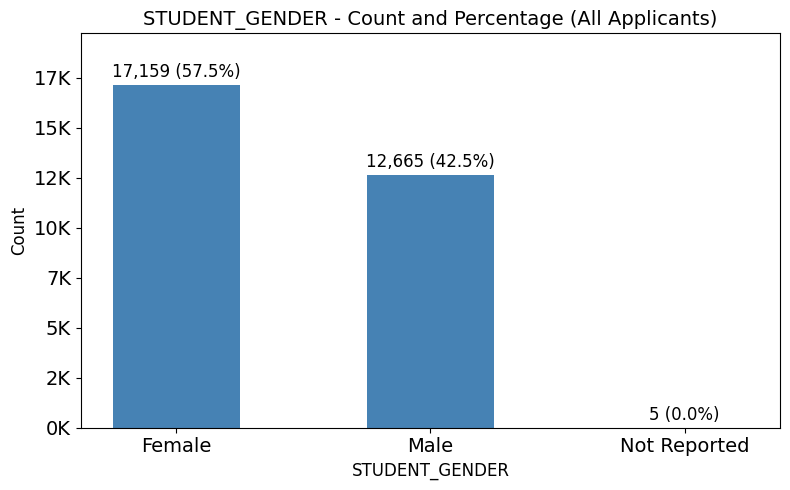

In [27]:
col = 'STUDENT_GENDER'

# Compute counts and percentages
value_counts = df[col].value_counts(dropna=False)
value_percent = (value_counts / value_counts.sum() * 100).round(1)

# Prepare x positions and data
categories = value_counts.index
counts = value_counts.values
percents = value_percent.values

x = np.arange(len(categories))
bar_width = 0.5

# Plot vertical bar chart with Matplotlib
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(x, counts, width=bar_width, color='steelblue')

# Title and labels
ax.set_title(f'{col} - Count and Percentage (All Applicants)', fontsize=14)
ax.set_xlabel(col, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Add labels above bars
max_count = counts.max()
for i, (count, pct) in enumerate(zip(counts, percents)):
    ax.text(
        x[i],
        count + max_count * 0.01,
        f"{int(count):,} ({pct:.1f}%)",
        ha='center', va='bottom', fontsize=12
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))

# Adjust y limit for space above bars
ax.set_ylim(0, max_count * 1.15)

ax.grid(False)
plt.tight_layout()
plt.show()

In [28]:
col = 'STUDENT_GENDER' 

# Create crosstab: rows = gender, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total if desired
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
STUDENT_GENDER,,,,
Female,9125,8034,17159,46.8
Male,6423,6242,12665,49.3
Not Reported,5,0,5,0.0


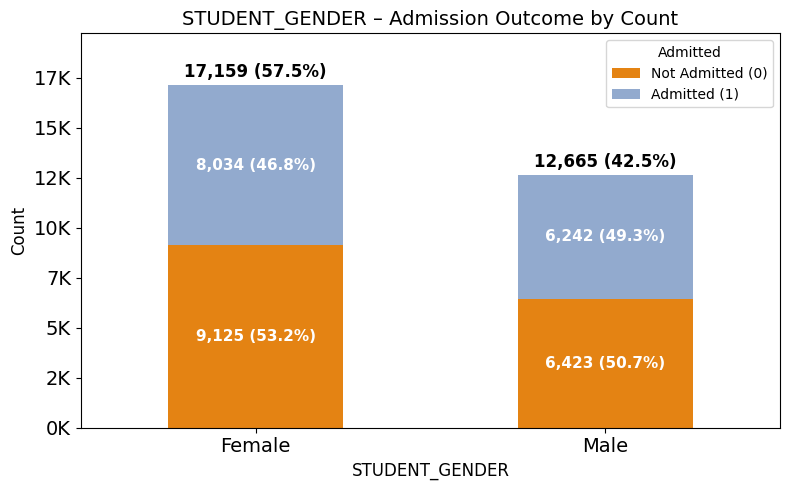

In [29]:
col = 'STUDENT_GENDER'

# Optional: exclude Not Reported
df_plot = df[~df[col].isin(['Not Reported'])].copy()

# Compute counts by Gender and Admitted status
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

# Compute totals per category
group_totals = group_counts.sum(axis=1)

# Compute % of total for each category (e.g., Female % of all)
grand_total = group_totals.sum()
group_totals_pct = (group_totals / grand_total * 100).round(1)

# Plot stacked bar chart by count
ax = group_counts.plot(kind='bar', stacked=True, figsize=(8,5),
                       color=['#E48313','#92AACE'])  # 0 then 1

plt.title(f'{col} – Admission Outcome by Count', fontsize=14)
plt.xlabel(col, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add count + percentage labels inside each stacked section
for idx, row in group_counts.iterrows():
    total = group_totals[idx]
    cumulative = 0
    for admitted_status, count in row.items():
        if count > 0:  # only label non-zero
            percent = count / total * 100
            ax.text(
                x=list(group_counts.index).index(idx),
                y=cumulative + count/2,
                s=f'{int(count):,} ({percent:.1f}%)',
                ha='center', va='center', color='white', fontsize=11, weight='bold'
            )
            cumulative += count

# Add total count + % of grand total on top of each stacked bar
for i, (total, pct_of_total) in enumerate(zip(group_totals, group_totals_pct)):
    ax.text(
        i,
        total + (group_totals.max() * 0.01),  # position just above bar
        f'{int(total):,} ({pct_of_total:.1f}%)',
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.ylim(0, max_count * 1.15)

plt.legend(title='Admitted', labels=['Not Admitted (0)', 'Admitted (1)'])
plt.grid(False)
plt.tight_layout()
plt.show()

#### 1.5.4. Florida Residency

In [30]:
df['FL_RESY'].unique()

array(['In-State', 'Out-of-State'], dtype=object)

In [31]:
# Get counts
counts = df['FL_RESY'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Florida Residency': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Florida Residency,Count,Percentage (%)
0,In-State,16962,56.9
1,Out-of-State,12867,43.1


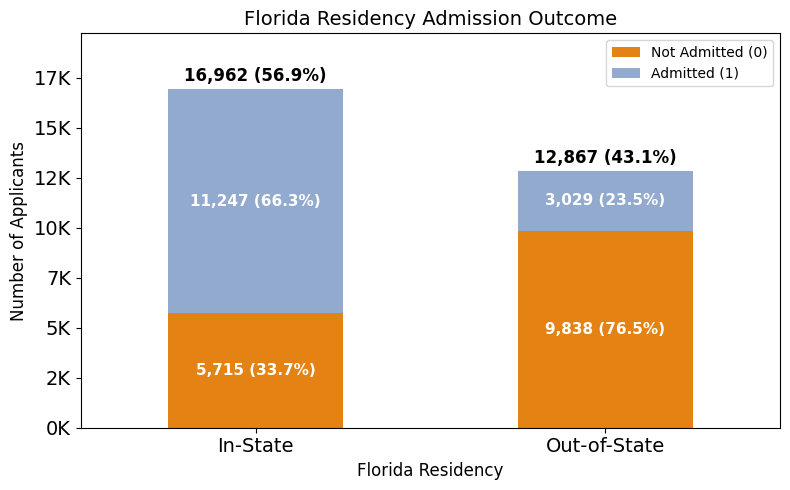

In [32]:
col = 'FL_RESY'

# Compute counts by Gender and Admitted status
group_counts = df.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

# Compute totals per category
group_totals = group_counts.sum(axis=1)

# Compute % of total for each category (e.g., Female % of all)
grand_total = group_totals.sum()
group_totals_pct = (group_totals / grand_total * 100).round(1)

# Plot stacked bar chart by count
ax = group_counts.plot(kind='bar', stacked=True, figsize=(8,5),
                       color=['#E48313','#92AACE'])  # 0 then 1

plt.title(f'Florida Residency Admission Outcome', fontsize=14)
plt.xlabel('Florida Residency', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add count + percentage labels inside each stacked section
for idx, row in group_counts.iterrows():
    total = group_totals[idx]
    cumulative = 0
    for admitted_status, count in row.items():
        if count > 0:  # only label non-zero
            percent = count / total * 100
            ax.text(
                x=list(group_counts.index).index(idx),
                y=cumulative + count/2,
                s=f'{int(count):,} ({percent:.1f}%)',
                ha='center', va='center', color='white', fontsize=11, weight='bold'
            )
            cumulative += count

# Add total count + % of grand total on top of each stacked bar
for i, (total, pct_of_total) in enumerate(zip(group_totals, group_totals_pct)):
    ax.text(
        i,
        total + (group_totals.max() * 0.01),  # position just above bar
        f'{int(total):,} ({pct_of_total:.1f}%)',
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.ylim(0, max_count * 1.15)

plt.legend(labels=['Not Admitted (0)', 'Admitted (1)'])
plt.grid(False)
plt.tight_layout()
plt.show()

#### 1.5.5. Age Distribution

In [33]:
df['TERM_AGE'].unique()

array([18, 23, 17, 29, 19, 20, 24, 22, 25, 21, 31, 34, 44, 26, 28, 30, 36,
       33, 51, 38, 39, 37, 27, 16, 40, 47, 32, 35, 50, 48, 56, 66, 41, 46,
       42, 67, 52, 53, 43, 54, 45, 55, 61, 15, 49, 62, 57, 59, 65, 58, 63,
       60, 68])

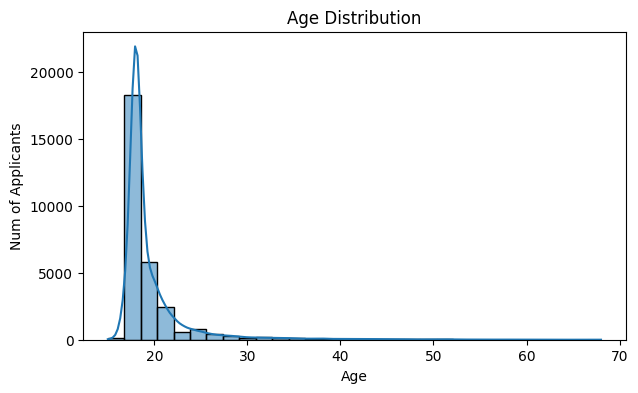

In [34]:
plt.figure(figsize=(7, 4))
sns.histplot(df['TERM_AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Num of Applicants')
plt.grid(False) #, linestyle='--', alpha=0.5)
plt.show()

In [35]:
df.TERM_AGE.describe().round(4)

count    29829.0000
mean        19.6714
std          4.3010
min         15.0000
25%         18.0000
50%         18.0000
75%         20.0000
max         68.0000
Name: TERM_AGE, dtype: float64

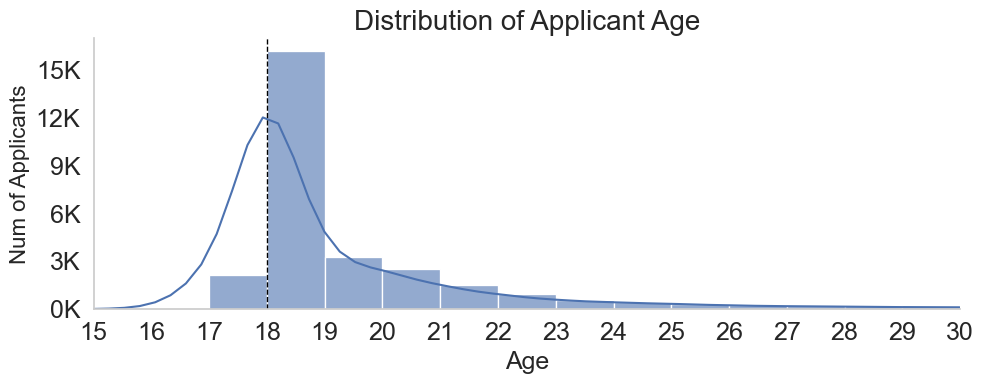

In [36]:
sns.set_theme(style="whitegrid", context="notebook")

ages = df['TERM_AGE'].dropna()
bins = np.arange(15, 31, 1)  # integer-aligned bins

plt.figure(figsize=(10,4))
ax = sns.histplot(ages, bins=bins, kde=True, stat='count', edgecolor='white', alpha=0.6)

# titles & labels
# plt.title("Distribution of Applicant's Age", fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Num of Applicants', fontsize=16)

# y-axis in K
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
max_y = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, max_y, 3000)) 

# tick sizes and limits
plt.xticks(bins, fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(15, 30)

# reference lines
median = ages.median()
mean = ages.mean()
plt.title("Distribution of Applicant Age", fontsize=20)
plt.axvline(median, color='black', linestyle='--', linewidth=1)
# plt.text(median+0.1, ax.get_ylim()[1]*0.9, f'Median {median:.0f}', fontsize=12, va='top')
# plt.axvline(mean, color='gray', linestyle=':', linewidth=1)
# plt.text(mean+0.1, ax.get_ylim()[1]*0.82, f'Mean {mean:.1f}', fontsize=12, va='top', color='gray')

sns.despine(ax=ax)  # removes top and right spines
plt.grid(False)
plt.tight_layout()
plt.show()

#### 1.5.6. Ethnicity

In [37]:
df['ETHNICITY'].unique()

array(['White', 'Hispanic/Latino', 'Two or More Races',
       'Nonresident Alien', 'Black or African American', 'Asian',
       'Not Reported', 'American Indian or Alaska Native',
       'Pacific Islander'], dtype=object)

In [38]:
# Get counts
counts = df['ETHNICITY'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Ethnicity': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Ethnicity,Count,Percentage (%)
0,Hispanic/Latino,11781,39.5
1,Nonresident Alien,6467,21.7
2,White,4700,15.8
3,Black or African American,4369,14.6
4,Asian,961,3.2
5,Two or More Races,888,3.0
6,Not Reported,622,2.1
7,Pacific Islander,21,0.1
8,American Indian or Alaska Native,20,0.1


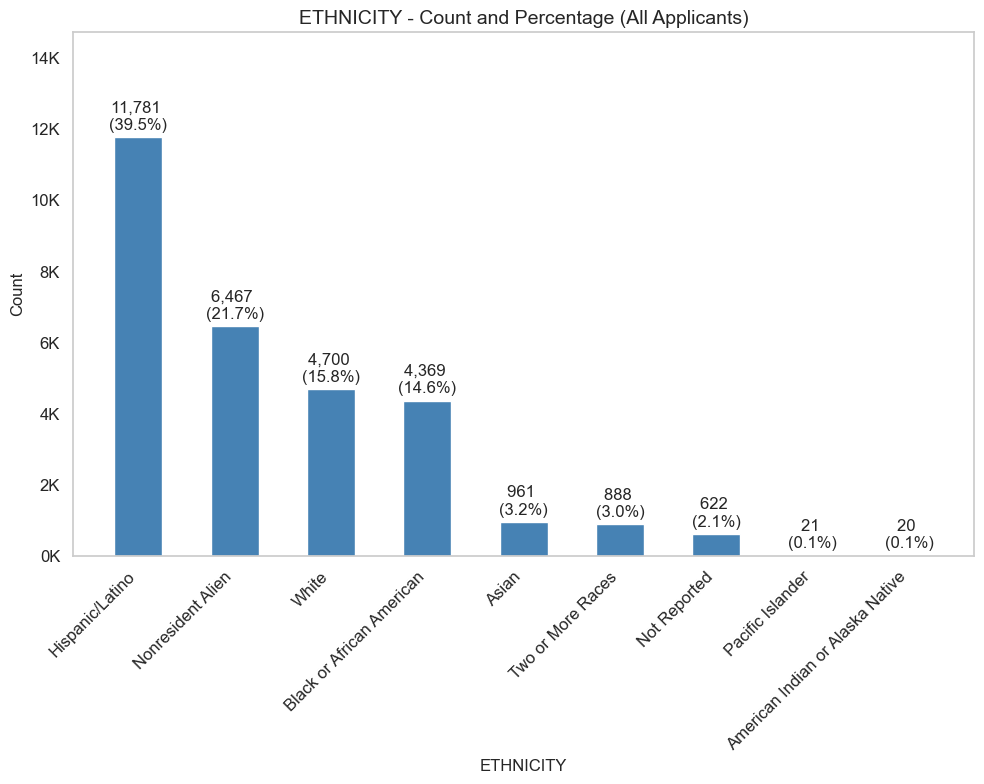

In [39]:
col = 'ETHNICITY'

# Compute counts and percentages
value_counts = df[col].value_counts(dropna=False)
value_percent = (value_counts / value_counts.sum() * 100).round(1)

# Prepare x positions and data
categories = value_counts.index
counts = value_counts.values
percents = value_percent.values

x = np.arange(len(categories))
bar_width = 0.5

# Plot vertical bar chart
fig, ax = plt.subplots(figsize=(10,8))
bars = ax.bar(x, counts, width=bar_width, color='steelblue')

# Title and labels
ax.set_title(f'{col} - Count and Percentage (All Applicants)', fontsize=14)
ax.set_xlabel(col, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, rotation=45, ha='right')  # 45° diagonal

ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add labels above bars
max_count = counts.max()
for i, (count, pct) in enumerate(zip(counts, percents)):
    ax.text(
        x[i],
        count + max_count * 0.01,
        f"{int(count):,} \n({pct:.1f}%)",
        ha='center', va='bottom', fontsize=12
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))

# Adjust y limit for space above bars
ax.set_ylim(0, max_count * 1.25)

ax.grid(False)
plt.tight_layout()
plt.show()

In [40]:
col = 'ETHNICITY' 

# Create crosstab: rows = ethnicity, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
ETHNICITY,,,,
Hispanic/Latino,4703,7078,11781,60.1
Nonresident Alien,4137,2330,6467,36.0
White,2392,2308,4700,49.1
Black or African American,3079,1290,4369,29.5
Asian,352,609,961,63.4
Two or More Races,498,390,888,43.9
Not Reported,364,258,622,41.5
Pacific Islander,13,8,21,38.1
American Indian or Alaska Native,15,5,20,25.0


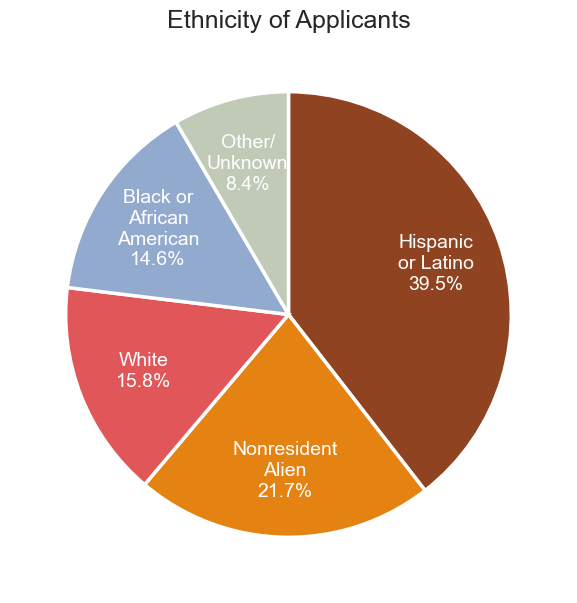

In [41]:
col = "ETHNICITY"

other_cats = [
    "Two or More Races", 
    "Not Reported", 
    "Asian", 
    "Pacific Islander", 
    "American Indian or Alaska Native"
]

df_plot = df.copy()
df_plot[col] = df_plot[col].replace(other_cats, "Other/Unknown")

desired_order = [
    "Hispanic/Latino",
    "Nonresident Alien",
    "White",
    "Black or African American",
    "Other/Unknown",
]

counts = df_plot[col].value_counts().reindex(desired_order, fill_value=0)
perc   = (counts / counts.sum() * 100).round(1)

labels = counts.index.tolist()
values = counts.values
colors = ["#904321","#E48312","#E15759","#92AACE","#C1CAB6"]

labels = [
    "Hispanic\nor Latino",
    "Nonresident\nAlien",
    "White",
    "Black or\nAfrican\nAmerican",
    "Other/\nUnknown"
]

fig, ax = plt.subplots(figsize=(8,6))
wedges, _ = ax.pie(
    values,
    labels=None,
    colors=colors[:len(values)],
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor="white", linewidth=2.5)
)

for w, lab, v, p in zip(wedges, labels, values, perc.values):
    ang = (w.theta2 + w.theta1) / 2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))

    # If this is the "Other/Unknown" slice → put label outside
    if lab == "Other/Unknown":
        ax.annotate(f"{lab}\n{p:.1f}%",
                    xy=(x*0.7, y*0.7),
                    xytext=(x*1, y*1.16),
                    ha="center", va="center",
                    arrowprops=dict(arrowstyle="-", color="#777", lw=1.2),
                    fontsize=14, color="#444")   # darker text outside
    else:
        # Label inside slice with white text
        ax.annotate(f"{lab}\n{p:.1f}%",
                    xy=(x*0.7, y*0.7),
                    ha="center", va="center",
                    fontsize=14, color="white")


ax.set_title("Ethnicity of Applicants", fontsize=18)
ax.set_aspect("equal")

for s in ["top", "right", "left", "bottom"]:
    ax.spines[s].set_visible(False)

plt.tight_layout(pad=0.5)
plt.show()


#### 1.5.7. Highest Level of Education

In [42]:
df['HIGHEST_LEVEL_OF_EDUCATION'].unique()

array(['High School Diploma', 'Associate in Arts (AA)', 'No Degree',
       'Associate in Science (AS)', 'GED', 'Baccalaureate', 'Masters',
       'Medicine, MD', 'Law, LLB or JD', 'Specialist', 'Doctorate'],
      dtype=object)

In [43]:
# Get counts
counts = df['HIGHEST_LEVEL_OF_EDUCATION'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Highest Level of Education': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Highest Level of Education,Count,Percentage (%)
0,High School Diploma,24211,81.2
1,Associate in Arts (AA),4119,13.8
2,Baccalaureate,610,2.0
3,Associate in Science (AS),421,1.4
4,GED,345,1.2
5,Masters,79,0.3
6,No Degree,26,0.1
7,"Medicine, MD",6,0.0
8,"Law, LLB or JD",6,0.0
9,Doctorate,4,0.0


In [44]:
# Make a copy of the dataframe
df_copy = df.copy()

# Apply the mapping on the copy
edu_map = {
    'High School Diploma': 'High School or GED',
    'GED': 'High School or GED',
    'Associate in Arts (AA)': 'Associate Degree',
    'Associate in Science (AS)': 'Associate Degree',
    'Baccalaureate': 'Bachelors or Higher',
    'Masters': 'Bachelors or Higher',
    'Doctorate': 'Bachelors or Higher',
    'Law, LLB or JD': 'Bachelors or Higher',
    'Medicine, MD': 'Bachelors or Higher',
    'Specialist': 'Bachelors or Higher',
    'No Degree': 'No Degree'
}

# Create the new grouped column on the copy
df_copy['EDUCATION_GROUPED'] = df_copy['HIGHEST_LEVEL_OF_EDUCATION'].replace(edu_map)

# Check the unique values
print(df_copy['EDUCATION_GROUPED'].value_counts())

EDUCATION_GROUPED
High School or GED     24556
Associate Degree        4540
Bachelors or Higher      707
No Degree                 26
Name: count, dtype: int64


In [45]:
# Get counts (no sort_index here — keep value_counts order)
counts = df_copy['EDUCATION_GROUPED'].value_counts(dropna=False)

# Calculate percentages
percent = (counts / len(df_copy) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Highest Level of Education': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count descending
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Highest Level of Education,Count,Percentage (%)
0,High School or GED,24556,82.3
1,Associate Degree,4540,15.2
2,Bachelors or Higher,707,2.4
3,No Degree,26,0.1


In [46]:
col = 'EDUCATION_GROUPED' 

# Create crosstab: rows = ethnicity, columns = admitted status
admission_table = pd.crosstab(
    index=df_copy[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
EDUCATION_GROUPED,,,,
High School or GED,14669,9887,24556,40.3
Associate Degree,621,3919,4540,86.3
Bachelors or Higher,259,448,707,63.4
No Degree,4,22,26,84.6


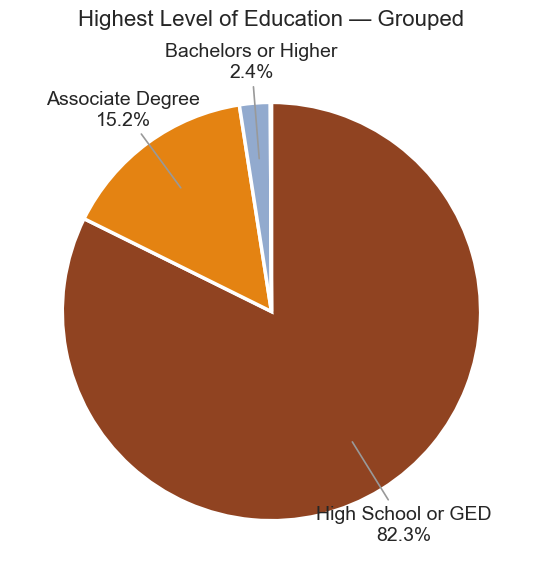

In [47]:
# Order clockwise from 12 o’clock
desired_order = ['High School or GED', 'Associate Degree', "Bachelors or Higher", 'No Degree']

counts = df_copy['EDUCATION_GROUPED'].value_counts().reindex(desired_order, fill_value=0)
perc   = (counts / counts.sum() * 100).round(1)

labels = counts.index.tolist()
values = counts.values

# palette to match your style
colors = ["#904321", "#E48312", "#92AACE", "#C1CAB6"]

fig, ax = plt.subplots(figsize=(10,6))

wedges, _ = ax.pie(
    values,
    labels=None,
    colors=colors[:len(values)],
    startangle=90,          # first slice at 12 o’clock
    counterclock=False,     # clockwise
    wedgeprops=dict(edgecolor="white", linewidth=2.5)  # donut look
)

# Outside labels w/ leader lines (percent only; add counts if you want)
for w, lab, v, p in zip(wedges, labels, values, perc.values):
    ang = (w.theta2 + w.theta1) / 2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    if p > 1:
        ax.annotate(f"{lab}\n{p:.1f}%",
                    xy=(x*0.72, y*0.72), xytext=(x*1.20, y*1.20),
                    ha="center", va="center",
                    arrowprops=dict(arrowstyle="-", color="#999", lw=1.2),
                    fontsize=14)
    
ax.set_title("Highest Level of Education — Grouped", fontsize=16, pad=18)
ax.set_aspect("equal")
for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

#### 1.5.8. Intended Majors

In [48]:
df['INTENDED_MAJOR'].unique()

array(['Criminal Justice Studies', 'Computer & Information Science',
       'Biology, General', 'Business Administration and Management',
       'Engineering, General', 'Nursing/Registered Nurse', 'Accounting',
       'Economics', 'Management Science',
       'Political Science & Government', 'Dramatic Arts',
       'Finance, General', 'Construction/Building Tech',
       'Business Marketing Management',
       'Multi-/Interdisciplinary Studies, General',
       'Criminalistics and Criminal Science', 'History', 'Biochemistry',
       'English, General', 'Visual & Performing Arts, Other',
       'International Business Management', 'English Teacher Ed',
       'MGMT Info Systems/Busi Data Proc', 'Geophysical Fluid Dynamics',
       'Human Resources Management', 'Visual Art, General',
       'Art History & Appreciation', 'Biomedical Engineering',
       'International Relations', 'Computer Engineering',
       'Psychology, General',
       'Architectural and Building Sciences/Technology'

In [49]:
# Get counts of Intended Major
counts = df['INTENDED_MAJOR'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Intended Major': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Show all rows
pd.set_option('display.max_rows', None)
display(summary)

,Intended Major,Count,Percentage (%)
0,Nursing/Registered Nurse,2422,8.1
1,"Biology, General",2131,7.1
2,"Psychology, General",2111,7.1
3,Computer & Information Science,2048,6.9
4,"Finance, General",1339,4.5
5,Management Science,1100,3.7
6,International Business Management,1064,3.6
7,Business Marketing Management,1027,3.4
8,Criminal Justice Studies,941,3.2
9,Mechanical Engineering,708,2.4


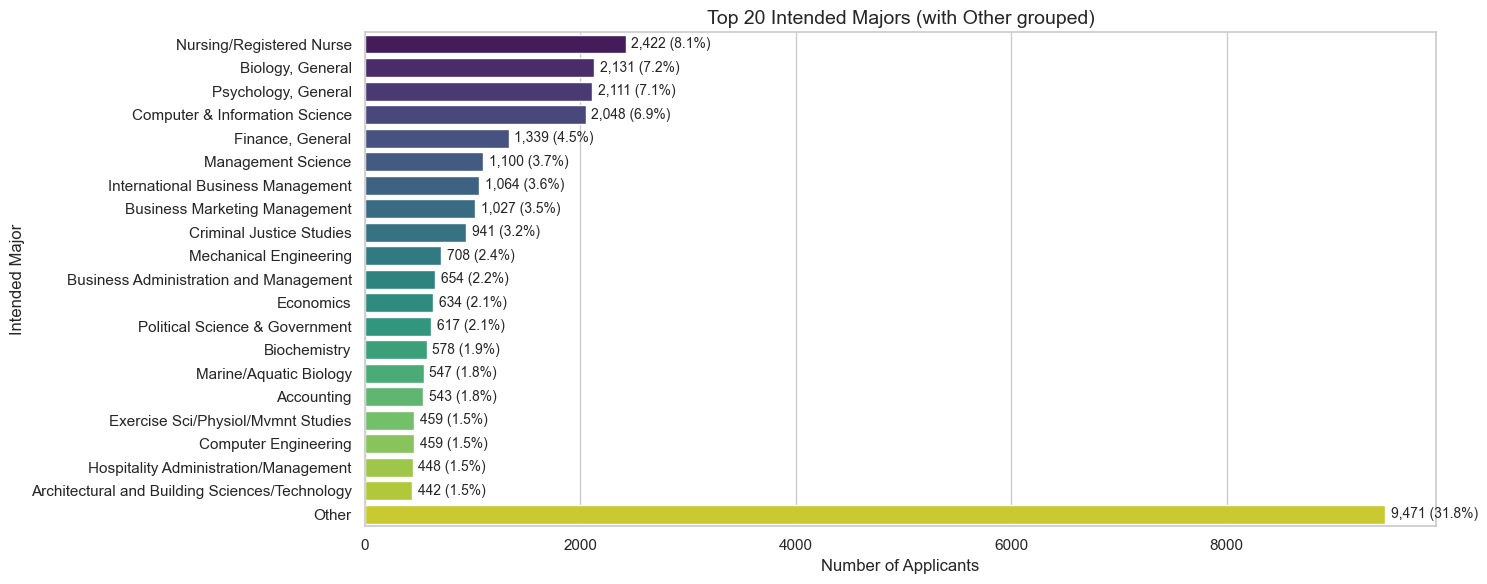

In [50]:
col = 'INTENDED_MAJOR'

# Get top n majors
top_n = 20
value_counts = df[col].value_counts().head(top_n)
others = df[col].value_counts().iloc[top_n:].sum()

# Append "Other" if there are more than top_n
if others > 0:
    value_counts['Other'] = others

# Compute percentages
percent = (value_counts / value_counts.sum() * 100).round(1)

# Make a DataFrame for plotting
plot_df = pd.DataFrame({col: value_counts.index, 'Count': value_counts.values, 'Percentage': percent.values})

# Plot
plt.figure(figsize=(15,6))
ax = sns.barplot(data=plot_df, y=col, x='Count', palette='viridis')

# Add labels with counts and %
for i, row in plot_df.iterrows():
    ax.text(row['Count']+50, i, f"{row['Count']:,} ({row['Percentage']}%)", va='center', fontsize=10)

plt.title(f'Top {top_n} Intended Majors (with Other grouped)', fontsize=14)
plt.xlabel('Number of Applicants')
plt.ylabel('Intended Major')
plt.tight_layout()
plt.show()

In [51]:
col = 'INTENDED_MAJOR' 

# Create crosstab: rows = intended major, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (
    admission_table['Admitted (1)'] /
    admission_table['Total'] * 100
).round(1)

# Sort rows by total descending
admission_table = admission_table.sort_values(by='Total', ascending=False)

# Keep only the top 20
admission_table = admission_table.head(20)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
INTENDED_MAJOR,,,,
Nursing/Registered Nurse,2054,368,2422,15.2
"Biology, General",801,1330,2131,62.4
"Psychology, General",871,1240,2111,58.7
Computer & Information Science,1029,1019,2048,49.8
"Finance, General",648,691,1339,51.6
Management Science,807,293,1100,26.6
International Business Management,649,415,1064,39.0
Business Marketing Management,590,437,1027,42.6
Criminal Justice Studies,620,321,941,34.1


#### 1.5.9. US Military Status

In [52]:
df['US_MILITARY_STATUS'].unique()

array(['No Military Status', 'Active Duty', 'Veteran', 'Dependents',
       'National Guard', 'Reservist'], dtype=object)

In [53]:
# Get counts
counts = df['US_MILITARY_STATUS'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'US Military Status': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,US Military Status,Count,Percentage (%)
0,No Military Status,28929,97.0
1,Dependents,527,1.8
2,Veteran,216,0.7
3,Active Duty,97,0.3
4,Reservist,39,0.1
5,National Guard,21,0.1


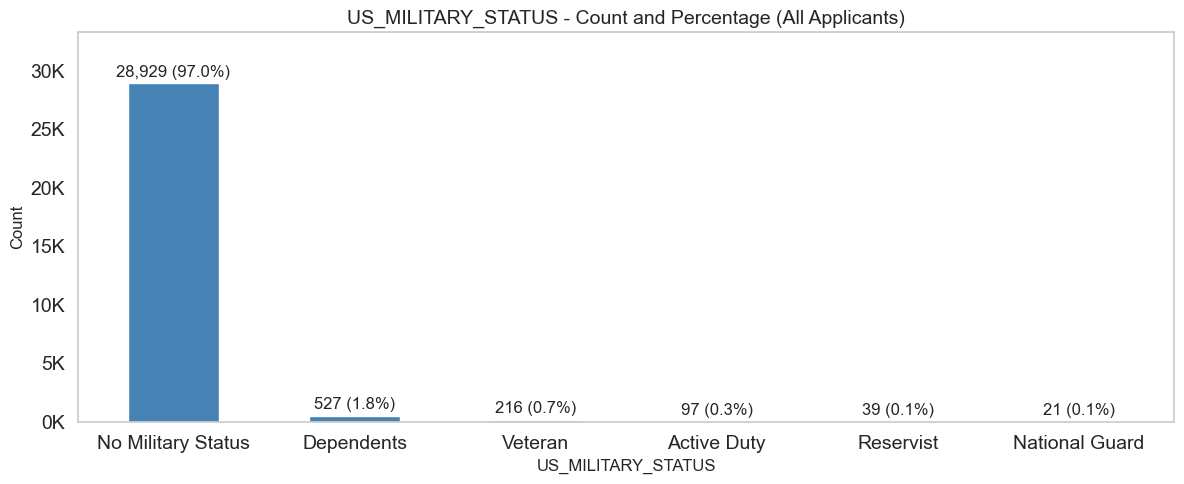

In [54]:
col = 'US_MILITARY_STATUS'

# Compute counts and percentages
value_counts = df[col].value_counts(dropna=False)
value_percent = (value_counts / value_counts.sum() * 100).round(1)

# Prepare x positions and data
categories = value_counts.index
counts = value_counts.values
percents = value_percent.values

x = np.arange(len(categories))
bar_width = 0.5

# Plot vertical bar chart with Matplotlib
fig, ax = plt.subplots(figsize=(12,5))
bars = ax.bar(x, counts, width=bar_width, color='steelblue')

# Title and labels
ax.set_title(f'{col} - Count and Percentage (All Applicants)', fontsize=14)
ax.set_xlabel(col, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Add labels above bars
max_count = counts.max()
for i, (count, pct) in enumerate(zip(counts, percents)):
    ax.text(
        x[i],
        count + max_count * 0.01,
        f"{int(count):,} ({pct:.1f}%)",
        ha='center', va='bottom', fontsize=12
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))

# Adjust y limit for space above bars
ax.set_ylim(0, max_count * 1.15)

ax.grid(False)
plt.tight_layout()
plt.show()

In [55]:
col = 'US_MILITARY_STATUS' 

# Create crosstab: rows = gender, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total if desired
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
US_MILITARY_STATUS,,,,
No Military Status,15141,13788,28929,47.7
Dependents,266,261,527,49.5
Veteran,72,144,216,66.7
Active Duty,55,42,97,43.3
Reservist,13,26,39,66.7
National Guard,6,15,21,71.4


#### 1.5.10. Admission to Honors College

In [56]:
df['HONORS_COLLEGE'].unique()

array(['Non-Honors', 'Honors'], dtype=object)

In [57]:
# Get counts
counts = df['HONORS_COLLEGE'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Honors College': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,Honors College,Count,Percentage (%)
0,Non-Honors,28854,96.7
1,Honors,975,3.3


In [58]:
col = 'HONORS_COLLEGE' 

# Create crosstab: rows = gender, columns = admitted status
admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (admission_table['Admitted (1)'] /
                                 admission_table['Total'] * 100).round(1)

# Sort rows by total if desired
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
HONORS_COLLEGE,,,,
Non-Honors,15549,13305,28854,46.1
Honors,4,971,975,99.6


#### 1.5.11.High-School GPA and Standardized Test Score Statistics

In [59]:
# Select only float columns
float_cols = df.select_dtypes(include=['float', 'float64']).columns

# Exclude specific columns
exclude_cols = ['CUM_GPA_UGRD', 'CUM_GPA_GRAD']
float_cols = [c for c in float_cols if c not in exclude_cols]

# Summary statistics for the remaining float columns
summary_floats = df[float_cols].describe().round(2)

display(summary_floats)

,HIGH_SCHL_GPA,TOT_ACT,ACT_ENG_SCORE,ACT_MAT_SCORE,ACT_READING_SCORE,ACT_SCIENCE_SCORE,ACT_WR_SCORE,ACT2SAT_ERW,ACT2SAT_TOT,TOT_SAT,SAT_ONLY,SAT_QUANT,SAT_VERBAL,SAT_WRITING,SAT2_CUM,SAT2_M_SCORE,SAT2_MS_SCORE,SAT2_RPT,SAT2_RS_SCORE,SAT2_RW_SCORE,SAT2_TOT,SAT2_WL_SCORE,TOT_SAT_W
count,18563.00,2673.00,2438.00,2437.00,2437.00,2436.00,358.00,4108.00,4345.00,146.00,11581.00,146.00,146.00,134.00,12116.00,12117.00,10864.00,12302.00,10860.00,12117.00,12116.00,10864.00,134.00
mean,3.87,24.12,24.55,22.67,26.73,24.11,7.03,603.24,1140.86,939.86,1193.87,468.08,471.78,460.30,1191.75,586.69,28.84,1189.19,30.31,605.05,1191.75,30.32,1395.82
std,0.66,6.03,7.03,5.60,6.90,5.80,1.50,97.99,202.53,178.43,184.50,97.74,96.35,87.54,184.52,106.26,5.21,185.50,4.55,89.80,184.52,4.95,251.24
min,1.40,6.00,6.00,9.00,7.00,7.00,2.00,280.00,400.00,450.00,550.00,250.00,200.00,240.00,470.00,230.00,11.00,470.00,10.00,200.00,470.00,12.00,700.00
25%,3.40,19.00,20.00,17.00,21.00,20.00,6.00,540.00,990.00,820.00,1060.00,400.00,410.00,410.00,1060.00,510.00,25.00,1050.00,27.00,540.00,1060.00,27.00,1250.00
50%,4.00,25.00,25.00,23.00,28.00,24.00,7.00,630.00,1180.00,920.00,1230.00,460.00,460.00,445.00,1230.00,600.00,29.00,1230.00,31.00,620.00,1230.00,31.00,1345.00
75%,4.40,29.00,30.00,27.00,33.00,29.00,8.00,680.00,1290.00,1047.50,1330.00,520.00,537.50,517.50,1320.00,660.00,33.00,1320.00,33.00,670.00,1320.00,34.00,1547.50
max,5.00,36.00,36.00,36.00,36.00,36.00,12.00,790.00,1590.00,1520.00,1600.00,740.00,800.00,730.00,1600.00,800.00,40.00,1600.00,40.00,800.00,1600.00,40.00,2180.00


#### 1.5.12. High-School Type

In [60]:
df['HIGH_SCHOOL_TYPE_DESC'].unique()

array([nan, 'PUBL', 'RELG', 'PRIV', 'OTHR', ' '], dtype=object)

In [61]:
# Get counts
counts = df['HIGH_SCHOOL_TYPE_DESC'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'High-School Type': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,High-School Type,Count,Percentage (%)
0,NaN,15737,52.8
1,PUBL,12311,41.3
2,RELG,1367,4.6
3,PRIV,367,1.2
4,OTHR,41,0.1
5,,6,0.0


In [62]:
col = 'HIGH_SCHOOL_TYPE_DESC'

df_temp = df.copy()
df_temp[col] = df_temp[col].replace(' ', np.nan)           # turn blank space into NaN
df_temp[col] = df_temp[col].fillna('Missing/Unknown')      # fill NaN with label
df_temp[col] = df_temp[col].replace('OTHR', 'Missing/Unknown')  # group OTHR too

counts = df_temp[col].value_counts(dropna=False)  # sorted by count descending by default

percent = (counts / len(df_temp) * 100).round(1)

summary = pd.DataFrame({
    'High-School Type': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,High-School Type,Count,Percentage (%)
0,Missing/Unknown,15784,52.9
1,PUBL,12311,41.3
2,RELG,1367,4.6
3,PRIV,367,1.2


In [63]:
col = 'HIGH_SCHOOL_TYPE_DESC'

# Replace NaN with a label
df_temp = df.copy()
df_temp[col] = df_temp[col].replace(' ', np.nan)  # turn blank space into NaN
df_temp[col] = df_temp[col].fillna('Missing/Unknown')  # fill NaN with label
df_temp[col] = df_temp[col].replace('OTHR', 'Missing/Unknown')

admission_table = pd.crosstab(
    index=df_temp[col],
    columns=df_temp['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (
    admission_table['Admitted (1)'] /
    admission_table['Total'] * 100
).round(1)

# Sort rows
admission_table = admission_table.sort_values(by='Total', ascending=False)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
HIGH_SCHOOL_TYPE_DESC,,,,
Missing/Unknown,11261,4523,15784,28.7
PUBL,3882,8429,12311,68.5
RELG,278,1089,1367,79.7
PRIV,132,235,367,64.0


#### 1.5.13. High-School State

In [64]:
df['HIGH_SCHOOL_STATE_DESC'].unique()

array([nan, 'FL', 'MD', 'TX', ' ', 'PR', 'PA', 'NY', 'CA', 'MN', 'MA',
       'GA', 'AK', 'NJ', 'CT', 'CO', 'WI', 'MO', 'HI', '28', 'IL', 'VA',
       '02', 'MS', 'SC', 'WV', 'SS', 'DC', 'WA', 'KHOREZ', 'ZU', 'NC',
       'ON', 'KS', 'LIMA', 'DE', 'SAMARQ', 'NH', 'OH', 'TOSHKE', 'NL',
       'UT', 'RS', 'BAGMAT', 'CUNDIN', 'NV', 'LAGOS', 'TN', 'IN', 'RI',
       'OR', 'OK', 'AZ', 'MI', 'ME', 'AL', 'MAH.', '29', 'SP', 'KY', 'IA',
       'NQ', 'MG', 'ND', 'BUKHOR', 'AE', 'BC', 'GJ', 'RJ', 'LA', 'BB',
       'NM', 'ANKARA', 'MB', 'WY', 'VI', 'DF', 'NE', 'LH', 'MOW', 'BA',
       'MTZ', 'CMG', 'VALLE', 'MT', 'VC', 'ATLANT', '87', '21', 'CH',
       'AP', '38', 'VT', 'TG', 'AR', 'RM', 'PUNJAB', 'KA', 'RIVERS',
       'ANDIJO', 'SA', 'ISTANB', 'FRANCI', 'GANDAK', 'LAMBAY', '01',
       'SIND', 'CE', 'SON', 'ID', 'MAGDAL', '45', 'HB', '46', 'DELHI',
       'SK', 'DN', 'SD', 'YUC', 'OGUN', 'JANAKP', 'CF', 'PQ', 'NAVOI',
       'SIN', 'SANTAN', 'MUSCAT', 'HGO', 'TV', '26', 'KASHKA'],
      dtyp

In [65]:
col = 'HIGH_SCHOOL_STATE_DESC'

df_temp = df.copy()

df_temp[col] = df_temp[col].replace(' ', np.nan)            # turn blank space into NaN
df_temp[col] = df_temp[col].fillna('Missing/Unknown')       # fill NaN with label

us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
    'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
    'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC'
]

def group_state(x):
    if x == 'FL':
        return 'Florida'
    elif x in us_states:
        return 'Other U.S.'
    elif x == 'Missing/Unknown':
        return 'Missing/Unknown'
    else:
        return 'International/Other'

df_temp['HIGH_SCHOOL_STATE_GROUPED'] = df_temp[col].apply(group_state)

counts = df_temp['HIGH_SCHOOL_STATE_GROUPED'].value_counts(dropna=False)
percent = (counts / len(df_temp) * 100).round(1)

summary = pd.DataFrame({
    'High-School State (Grouped)': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,High-School State (Grouped),Count,Percentage (%)
0,Missing/Unknown,15086,50.6
1,Florida,12938,43.4
2,Other U.S.,1570,5.3
3,International/Other,235,0.8


In [66]:
# Filter only 'Other U.S.'
other_us_df = df_temp[df_temp['HIGH_SCHOOL_STATE_GROUPED'] == 'Other U.S.']

# Check counts of FL_RESY within this group
residency_counts = other_us_df['FL_RESY'].value_counts(dropna=False)
residency_percent = (residency_counts / residency_counts.sum() * 100).round(1)

summary = pd.DataFrame({
    'Count': residency_counts,
    'Percentage (%)': residency_percent
})

display(summary)

,Count,Percentage (%)
FL_RESY,,
Out-of-State,1104,70.3
In-State,466,29.7


In [67]:
df['HIGH_SCHOOL_STATE_DESC'].nunique(dropna=False)

131

#### 1.5.14. Country of Birth

In [68]:
df['CNTRY_OF_BIRTH_DESCR'].unique()

array(['United States', 'Syrian Arab Republic', 'Cuba', 'Venezuela',
       'Philippines', 'Brazil', 'Spain', 'Ethiopia', 'Mexico',
       'Saudi Arabia', 'Haiti', 'Jamaica', 'Kazakhstan', 'Ecuador',
       'Kuwait', 'Nigeria', 'Trinidad and Tobago', 'Greece', 'Pakistan',
       'Bolivia', 'Nicaragua', 'El Salvador',
       'Iran (Islamic Republic Of)', 'Uzbekistan', 'Kyrgyzstan',
       'United Arab Emirates', 'Azerbaijan', 'Netherlands', 'Nepal',
       'South Africa', 'Australia', 'Puerto Rico', 'Honduras', 'Barbados',
       'Albania', 'Germany', 'Bangladesh', 'Tajikistan', 'Portugal',
       'Iraq', 'Oman', 'India', 'Turkmenistan', 'Russian Federation',
       'Argentina', 'Mongolia', 'Dominican Republic', 'Peru', 'Colombia',
       'Ghana', 'Ukraine', 'Canada', 'Turkey', 'Romania', 'Italy',
       'United Kingdom', 'Panama', 'Virgin Islands (U.S.)', 'Uruguay',
       'Sudan', 'Chile', 'Czech Republic', 'Jordan', 'Sint Maarten',
       'Myanmar', 'Afghanistan', 'Bahamas', 'Morocco

In [69]:
df['CNTRY_OF_BIRTH_DESCR'].nunique(dropna=False)

176

In [70]:
# Get counts 
counts = df['CNTRY_OF_BIRTH_DESCR'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'Country of Birth': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Show all rows
pd.set_option('display.max_rows', None)
display(summary)

,Country of Birth,Count,Percentage (%)
0,United States,20217,67.8
1,Cuba,852,2.9
2,Venezuela,715,2.4
3,Brazil,494,1.7
4,Uzbekistan,490,1.6
5,Jamaica,441,1.5
6,Colombia,401,1.3
7,Haiti,381,1.3
8,Dominican Republic,295,1.0
9,Bangladesh,256,0.9


In [71]:
col = 'CNTRY_OF_BIRTH_DESCR' 

admission_table = pd.crosstab(
    index=df[col],
    columns=df['ADMITTED'],
    dropna=False
)

# Rename columns 0/1 to more descriptive labels
admission_table.columns = ['Not Admitted (0)', 'Admitted (1)']

# Add totals and percentages
admission_table['Total'] = admission_table.sum(axis=1)
admission_table['% Admitted'] = (
    admission_table['Admitted (1)'] /
    admission_table['Total'] * 100
).round(1)

# Sort rows by total descending
admission_table = admission_table.sort_values(by='Total', ascending=False)

# Keep only the top 20
admission_table = admission_table.head(20)

display(admission_table)

,Not Admitted (0),Admitted (1),Total,% Admitted
CNTRY_OF_BIRTH_DESCR,,,,
United States,10185,10032,20217,49.6
Cuba,233,619,852,72.7
Venezuela,217,498,715,69.7
Brazil,270,224,494,45.3
Uzbekistan,421,69,490,14.1
Jamaica,304,137,441,31.1
Colombia,167,234,401,58.4
Haiti,232,149,381,39.1
Dominican Republic,156,139,295,47.1


## 2. Data Cleaning

Copy of the original dataframe:

In [72]:
df_clean = df.copy()

In [73]:
df_clean.head()

,STUDENT_GENDER,TERM_AGE,ETHNICITY,CNTRY_OF_BIRTH_DESCR,HIGHEST_LEVEL_OF_EDUCATION,INTENDED_MAJOR,US_MILITARY_STATUS,HIGH_SCHOOL_STATE_DESC,HIGH_SCHOOL_TYPE_DESC,HIGH_SCHL_GPA,CUM_GPA_UGRD,CUM_GPA_GRAD,TOT_ACT,ACT_ENG_SCORE,ACT_MAT_SCORE,ACT_READING_SCORE,ACT_SCIENCE_SCORE,ACT_WR_SCORE,ACT2SAT_ERW,ACT2SAT_TOT,TOT_SAT,SAT_ONLY,SAT_QUANT,SAT_VERBAL,SAT_WRITING,SAT2_CUM,SAT2_M_SCORE,SAT2_MS_SCORE,SAT2_RPT,SAT2_RS_SCORE,SAT2_RW_SCORE,SAT2_TOT,SAT2_WL_SCORE,TOT_SAT_W,FL_RESY,STUDENT_ADMIT_TYPE,HONORS_COLLEGE,ADMITTED,ENROLLED,DENIED,INCOMPLETE,MATRICULATED
0,Female,18,White,United States,High School Diploma,Criminal Justice Studies,No Military Status,NaN,NaN,NaN,NaN,NaN,18.0,19.0,14.0,20.0,19.0,NaN,520.0,880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In-State,FTIC,Non-Honors,0,0,1,0,0
1,Male,18,Hispanic/Latino,United States,High School Diploma,Computer & Information Science,No Military Status,FL,PUBL,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210.0,NaN,NaN,NaN,1210.0,590.0,29.0,1210.0,34.0,620.0,1210.0,28.0,NaN,In-State,FTIC,Non-Honors,1,0,0,0,0
3,Female,18,Two or More Races,United States,High School Diploma,"Biology, General",No Military Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out-of-State,FTIC,Non-Honors,0,0,1,0,0
6,Male,18,Hispanic/Latino,United States,High School Diploma,Business Administration and Management,No Military Status,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,970.0,NaN,NaN,NaN,970.0,500.0,25.0,970.0,24.0,470.0,970.0,23.0,NaN,Out-of-State,FTIC,Non-Honors,0,0,1,0,0
8,Female,18,Two or More Races,Syrian Arab Republic,High School Diploma,"Biology, General",No Military Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080.0,NaN,NaN,NaN,1080.0,500.0,25.0,1080.0,31.0,580.0,1080.0,27.0,NaN,In-State,FTIC,Non-Honors,0,0,1,0,0


### 2.1. Handeling Missing Values

#### 2.1.1. High-School GPA

Keep missing as a separate category by creating a missing indicator column (new feature). This way we can directly analyze missingness by group (ethnicity, gender, residency) to see if some groups are under-documented.

In [74]:
# Create missing flag
df_clean['HIGH_SCHL_GPA_MISSING'] = df_clean['HIGH_SCHL_GPA'].isna().astype(int)

In [75]:
# Get counts
counts = df_clean['HIGH_SCHL_GPA_MISSING'].value_counts(dropna=False)  # sorted by count descending by default

# Calculate percentages
percent = (counts / len(df) * 100).round(1)

# Combine into a DataFrame
summary = pd.DataFrame({
    'High-School GPA Missing': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

# Sort by Count (descending)
summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)

,High-School GPA Missing,Count,Percentage (%)
0,0,18563,62.2
1,1,11266,37.8


In [76]:
df_clean['HIGH_SCHL_GPA_MISSING'].unique()

array([1, 0])

For modeling purposes, we may need to keep the GPA as numerical but find a way to handle the missing values. Since there are many groups in the data and one of our goals is to uncover bias, inputation does not seem like the right approach. If we impute everything too aggressively (especially with median or mean), we risk masking patterns in the data. For example, if international applicants systematically have missing GPAs, imputation would erase the evidence of that disparity.

#### 2.1.2. Standardized Test Scores (SAT / ACT)

**SAT**: for the total/communlative SAT score, there are multiple features that contain the similar information. The idea is to consolidate the information into a single new column to see if we can improve the SAT score availability within the dataset. 
- If multiple SAT scores are available, we will keep the highest score found per applicant.
- If no new/old SAT score is reported but the ACT to SAT coversion is available, we will keep this one as the SAT score.
- If neither the SAT scores not the ACT to SAT score are available, the column will remain empty. 

**ACT**: for this score, there's only one commulative one included in the dataset, so we will keep that one as is for now (TOT_ACT).

In [77]:
# Columns to check
sat_cols = ['SAT2_CUM', 'SAT2_RPT', 'SAT2_TOT', 'SAT_ONLY', 'TOT_SAT', 'ACT2SAT_TOT']

# Take row-wise maximum across the columns
df_clean['SAT_TOTAL_BEST'] = df_clean[sat_cols].max(axis=1, skipna=True)

# If you want to see how many are filled:
print(df_clean['SAT_TOTAL_BEST'].notna().sum(), "rows with at least one score")
print(df_clean['SAT_TOTAL_BEST'].isna().sum(), "rows with no scores at all")

14969 rows with at least one score
14860 rows with no scores at all


In [78]:
df_clean['ACT_TOTAL_BEST'] = df_clean['TOT_ACT']

We will also create a missing flag for each, similar to what we did for High-School GPA.

In [79]:
# Create a missing flag for SAT_TOTAL_BEST (analysis purposes)
df_clean['SAT_TOTAL_BEST_MISSING'] = df_clean['SAT_TOTAL_BEST'].isna().astype(int)

In [80]:
df_clean['SAT_TOTAL_BEST_MISSING'].unique()

array([0, 1])

In [81]:
# Create a missing flag for ACT_TOTAL_BEST
df_clean['ACT_TOTAL_BEST_MISSING'] = df_clean['ACT_TOTAL_BEST'].isna().astype(int)

In [82]:
df_clean['ACT_TOTAL_BEST_MISSING'].unique()

array([0, 1])

#### 2.1.3. Intended Major

In [83]:
# Replace blank strings with NaN
df_clean['INTENDED_MAJOR'] = df_clean['INTENDED_MAJOR'].replace(' ', np.nan)

# Fill NaN with a unified label
df_clean['INTENDED_MAJOR'] = df_clean['INTENDED_MAJOR'].fillna('Missing/Unknown')

In [84]:
# df_clean['INTENDED_MAJOR'].unique()

#### 2.1.4. High-School Type

In [85]:
# Replace blank strings with NaN
df_clean['HIGH_SCHOOL_TYPE_DESC'] = df_clean['HIGH_SCHOOL_TYPE_DESC'].replace(' ', np.nan)

# Fill NaN with a unified label
df_clean['HIGH_SCHOOL_TYPE_DESC'] = df_clean['HIGH_SCHOOL_TYPE_DESC'].fillna('Missing/Unknown')

In [86]:
# df_clean['HIGH_SCHOOL_TYPE_DESC'].unique()

#### 2.1.5. High-School State

In [87]:
# Replace blank strings with NaN
df_clean['HIGH_SCHOOL_STATE_DESC'] = df_clean['HIGH_SCHOOL_STATE_DESC'].replace(' ', np.nan)

# Fill NaN with a unified label
df_clean['HIGH_SCHOOL_STATE_DESC'] = df_clean['HIGH_SCHOOL_STATE_DESC'].fillna('Missing/Unknown')

In [88]:
# df_clean['HIGH_SCHOOL_STATE_DESC'].unique()

#### 2.1.6. Gender

In [89]:
df_clean['STUDENT_GENDER'] = df_clean['STUDENT_GENDER'].replace('Not Reported', 'Missing/Unknown')

In [90]:
df_clean['STUDENT_GENDER'].unique()

array(['Female', 'Male', 'Missing/Unknown'], dtype=object)

#### 2.1.7. Ethnicity

In [91]:
df_clean['ETHNICITY'] = df_clean['ETHNICITY'].replace('Not Reported', 'Missing/Unknown')

In [92]:
df_clean['ETHNICITY'].unique()

array(['White', 'Hispanic/Latino', 'Two or More Races',
       'Nonresident Alien', 'Black or African American', 'Asian',
       'Missing/Unknown', 'American Indian or Alaska Native',
       'Pacific Islander'], dtype=object)

### 2.2. Handeling High-Cardinality Features

#### 2.2.1. Intended Major

Since we have too many unique intended majors (134 possible values), we propose to create an additional column with the corresponding college according to FIU's Colleges and Schools: https://research.fiu.edu/colleges-schools/

Based on our list of intended majors, we'll focus on 8 colleges: 
- College of Business
- College of Engineering and Computing
- College of Arts, Sciences and Education
- College of Nursing and Health Sciences
- School of Hospitality and Tourism Management
- College of Law
- College of Communication, Architecture + Arts
- School of International and Public Affairs

In [93]:
# Dictionary with mapping to college

major_to_college = {
    # College of Business
    'Accounting': 'Business',
    'Business Administration and Management': 'Business',
    'Finance, General': 'Business',
    'International Business Management': 'Business',
    'Business Marketing Management': 'Business',
    'Logistics & Materials Mgt': 'Business',
    'Economics': 'Business',
    'International Real Estate': 'Business',
    'Management Science': 'Business',
    'Business MGMT. & Administrative Serv., Other': 'Business',
    'Real Estate': 'Business',
    'Econometrics and Quantitative Economics': 'Business',
    'MGMT Info Systems/Busi Data Proc': 'Business',
    'Human Resources Management': 'Business',

    # College of Engineering & Computing
    'Computer & Information Science': 'Engineering & Computing',
    'Computer Engineering': 'Engineering & Computing',
    'Computer Systems Analysis/Analyst': 'Engineering & Computing',
    'Computer and Information Systems Security/Information Assurance': 'Engineering & Computing',
    'Information Technology': 'Engineering & Computing',
    'Biomedical Engineering': 'Engineering & Computing',
    'Mechanical Engineering': 'Engineering & Computing',
    'Civil Engineering': 'Engineering & Computing',
    'Electrical, Electronics Engin': 'Engineering & Computing',
    'Industrial & Systems Engin': 'Engineering & Computing',
    'Telecommunications Engineering': 'Engineering & Computing',
    'Materials Engineering': 'Engineering & Computing',
    'Engineering, General': 'Engineering & Computing',
    'Engineering Related Technol./Tech., Other': 'Engineering & Computing',
    'Engineering/Industrial Management': 'Engineering & Computing',
    'Environmental Health Engin': 'Engineering & Computing',
    'Engineering and Computing Education': 'Engineering & Computing',

    # College of Arts, Sciences & Education
    'Psychology, General': 'Arts, Sciences & Education',
    'Biology, General': 'Arts, Sciences & Education',
    'Marine/Aquatic Biology': 'Arts, Sciences & Education',
    'Chemistry': 'Arts, Sciences & Education',
    'Physics': 'Arts, Sciences & Education',
    'Mathematics, General': 'Arts, Sciences & Education',
    'Applied Math/Math Sciences': 'Arts, Sciences & Education',
    'Statistics': 'Arts, Sciences & Education',
    'Environmental Studies': 'Arts, Sciences & Education',
    'Geology': 'Arts, Sciences & Education',
    'Natural Resources Management and Policy': 'Arts, Sciences & Education',
    'Biochemistry': 'Arts, Sciences & Education',
    'Computational Science': 'Arts, Sciences & Education',
    'Geophysical Fluid Dynamics': 'Arts, Sciences & Education',
    'Latin American and Caribbean Studies': 'Arts, Sciences & Education',
    'Latin American Studies': 'Arts, Sciences & Education',
    'Asian Studies': 'Arts, Sciences & Education',
    'African-American (Black) Studies': 'Arts, Sciences & Education',
    'Women\'s Studies': 'Arts, Sciences & Education',
    'Religious Studies': 'Arts, Sciences & Education',
    'Liberal Arts & Sciences': 'Arts, Sciences & Education',
    'International/Global Studies': 'Arts, Sciences & Education',
    'International Relations': 'Arts, Sciences & Education',
    'Political Science & Government': 'Arts, Sciences & Education',
    'History': 'Arts, Sciences & Education',
    'Philosophy': 'Arts, Sciences & Education',
    'Spanish': 'Arts, Sciences & Education',
    'Foreign Lang, Multiple': 'Arts, Sciences & Education',
    'Ed. Admin/Leadership, General': 'Arts, Sciences & Education',
    'English Teacher Ed': 'Arts, Sciences & Education',
    'Pre-Elem/Early Childhood Teacher Ed': 'Arts, Sciences & Education',
    'Curriculum & Instruction': 'Arts, Sciences & Education',
    'Elementary Teacher Ed': 'Arts, Sciences & Education',
    'Reading Teacher Ed': 'Arts, Sciences & Education',
    'Special Ed, General': 'Arts, Sciences & Education',
    'Higher Ed. Administration': 'Arts, Sciences & Education',
    'International & Comparative Ed': 'Arts, Sciences & Education',
    'Adult & Continuing Teacher Ed': 'Arts, Sciences & Education',
    'School Psychology': 'Arts, Sciences & Education',
    'Counselor Ed./Student Counseling/Guidance': 'Arts, Sciences & Education',
    'Maritime Studies': 'Arts, Sciences & Education',

    # College of Nursing & Health Sciences
    'Nursing/Registered Nurse': 'Nursing & Health Sciences',
    'Pediatric Nurse/Nursing': 'Nursing & Health Sciences',
    'Nursing Practice': 'Nursing & Health Sciences',
    'Psychiatric/Mental Health Nurse/Nursing': 'Nursing & Health Sciences',
    'Nursing Science Research': 'Nursing & Health Sciences',
    'Medicine (M.D.)': 'Nursing & Health Sciences',
    'Physician Associate/Assistant': 'Nursing & Health Sciences',
    'Occupational Therapy': 'Nursing & Health Sciences',
    'Physical Therapy': 'Nursing & Health Sciences',
    'Exercise Sci/Physiol/Mvmnt Studies': 'Nursing & Health Sciences',
    'Public Health': 'Nursing & Health Sciences',
    'Health Services Administration': 'Nursing & Health Sciences',
    'Family Health': 'Nursing & Health Sciences',
    'Medical Sciences': 'Nursing & Health Sciences',
    'Medical Informatics': 'Nursing & Health Sciences',

    # School of Hospitality & Tourism Management
    'Hospitality Administration/Management': 'Hospitality & Tourism Management',
    'Recreation, Leisure Studies': 'Hospitality & Tourism Management',

    # College of Law
    'Law': 'Law',
    'American Law for Foreign Lawyers': 'Law',
    'Advanced Legal Research/Studies, General': 'Law',

    # Arts / Communication
    'Visual Art, General': 'Arts & Communication',
    'Studio/Fine Art': 'Arts & Communication',
    'Art History & Appreciation': 'Arts & Communication',
    'Dramatic Arts': 'Arts & Communication',
    'Music, General': 'Arts & Communication',
    'Music Teacher Ed': 'Arts & Communication',
    'Multimedia Studies': 'Arts & Communication',
    'Digital Arts': 'Arts & Communication',
    'Creative Writing': 'Arts & Communication',
    'Visual & Performing Arts, Other': 'Arts & Communication',
    'Communication (Mass)': 'Arts & Communication',
    'Public Relations, Advertising, and Applied Communication': 'Arts & Communication',
    'Organizational Communication, General': 'Arts & Communication',
    'Landscape Architecture': 'Arts & Communication',
    'Design in Architecture Studies': 'Arts & Communication',

    # Criminal Justice / Public Affairs
    'Criminal Justice Studies': 'Public Affairs',
    'Criminalistics and Criminal Science': 'Public Affairs',
    'Forensic Science': 'Public Affairs',
    'Public Administration': 'Public Affairs',
    'Crisis/Emergency/Disaster Management': 'Public Affairs',
}

In [94]:
df_clean['INTENDED_COLLEGE'] = df_clean['INTENDED_MAJOR'].map(major_to_college).fillna('Missing/Unknown')
df_clean['INTENDED_COLLEGE'].nunique()

8

In [95]:
df_clean['INTENDED_COLLEGE'].unique()

array(['Public Affairs', 'Engineering & Computing',
       'Arts, Sciences & Education', 'Business',
       'Nursing & Health Sciences', 'Arts & Communication',
       'Missing/Unknown', 'Hospitality & Tourism Management'],
      dtype=object)

In [96]:
college_counts = df_clean['INTENDED_COLLEGE'].value_counts(dropna=False)
college_pct = (college_counts / len(df_clean) * 100).round(1)
college_summary = pd.DataFrame({'Count': college_counts, 'Pct': college_pct})
display(college_summary)

,Count,Pct
INTENDED_COLLEGE,,
"Arts, Sciences & Education",8111,27.2
Business,7004,23.5
Engineering & Computing,5412,18.1
Nursing & Health Sciences,3203,10.7
Missing/Unknown,2114,7.1
Arts & Communication,1925,6.5
Public Affairs,1290,4.3
Hospitality & Tourism Management,770,2.6


In [97]:
# Total count per college
college_total = df_clean['INTENDED_COLLEGE'].value_counts(dropna=False)

# Admitted count per college
college_admitted = df_clean.loc[df_clean['ADMITTED'] == 1, 'INTENDED_COLLEGE'] \
                          .value_counts(dropna=False)

# Not admitted count per college
college_not = df_clean.loc[df_clean['ADMITTED'] == 0, 'INTENDED_COLLEGE'] \
                      .value_counts(dropna=False)

college_summary = pd.DataFrame({
    'Total Count': college_total,
    'Admitted Count': college_admitted,
    'Not Admitted Count': college_not
}).fillna(0)

# Compute percentages
college_summary['Admitted %'] = (college_summary['Admitted Count'] / college_summary['Total Count'] * 100).round(1)
college_summary['Not Admitted %'] = (college_summary['Not Admitted Count'] / college_summary['Total Count'] * 100).round(1)
college_summary['Total %'] = (college_summary['Total Count'] / len(df_clean) * 100).round(1)

# Reorder columns for readability
college_summary = college_summary[['Total Count', 'Total %', 'Admitted Count', 'Admitted %', 'Not Admitted Count', 'Not Admitted %']]

# Sort by total count descending (optional)
college_summary = college_summary.sort_values('Total Count', ascending=False)

display(college_summary)

,Total Count,Total %,Admitted Count,Admitted %,Not Admitted Count,Not Admitted %
INTENDED_COLLEGE,,,,,,
"Arts, Sciences & Education",8111,27.2,4646,57.3,3465,42.7
Business,7004,23.5,2967,42.4,4037,57.6
Engineering & Computing,5412,18.1,2902,53.6,2510,46.4
Nursing & Health Sciences,3203,10.7,725,22.6,2478,77.4
Missing/Unknown,2114,7.1,1090,51.6,1024,48.4
Arts & Communication,1925,6.5,1045,54.3,880,45.7
Public Affairs,1290,4.3,488,37.8,802,62.2
Hospitality & Tourism Management,770,2.6,413,53.6,357,46.4


#### 2.2.2. Country of Birth

Since we have too many country of birth (196 unique values), we propose to create an additional column with the corresponding continent.

In [98]:
country_to_continent = {
    # North America & Caribbean
    'United States': 'North America',
    'Puerto Rico': 'North America',
    'Virgin Islands (U.S.)': 'North America',
    'Virgin Islands (British)': 'North America',
    'United States Minor Outlying Islands': 'North America',
    'Cuba': 'North America',
    'Haiti': 'North America',
    'Jamaica': 'North America',
    'Trinidad and Tobago': 'North America',
    'Nicaragua': 'North America',
    'El Salvador': 'North America',
    'Honduras': 'North America',
    'Barbados': 'North America',
    'Dominican Republic': 'North America',
    'Belize': 'North America',
    'Panama': 'North America',
    'Bahamas': 'North America',
    'Grenada': 'North America',
    'Costa Rica': 'North America',
    'Sint Maarten': 'North America',
    'Antigua and Barbuda': 'North America',
    'Saint Lucia': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Saint Martin': 'North America',
    'St Vincent and the Grenadines': 'North America',
    'Dominica': 'North America',
    'Aruba': 'North America',
    'Turks and Caicos Islands': 'North America',
    'Montserrat': 'North America',
    'Cayman Islands': 'North America',
    'Bermuda': 'North America',
    'Bonaire, Saint Eustatius & Saba': 'North America',
    'Curacao': 'North America',
    'Guadeloupe': 'North America',
    'Turks and Caicos Islands': 'North America',
    'Cayman Islands': 'North America',

    # South America
    'Venezuela': 'South America',
    'Brazil': 'South America',
    'Ecuador': 'South America',
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Uruguay': 'South America',
    'Chile': 'South America',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Paraguay': 'South America',
    'Suriname': 'South America',
    'Guyana': 'South America',
    'French Guiana': 'South America',

    # Europe
    'Spain': 'Europe',
    'Greece': 'Europe',
    'Netherlands': 'Europe',
    'Albania': 'Europe',
    'Portugal': 'Europe',
    'Russian Federation': 'Europe',
    'Ukraine': 'Europe',
    'Turkey': 'Europe',
    'Romania': 'Europe',
    'Italy': 'Europe',
    'United Kingdom': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Czech Republic': 'Europe',
    'Sweden': 'Europe',
    'France': 'Europe',
    'Latvia': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Norway': 'Europe',
    'Ireland': 'Europe',
    'Belarus': 'Europe',
    'Luxembourg': 'Europe',
    'Switzerland': 'Europe',
    'Montenegro': 'Europe',
    'Poland': 'Europe',
    'Estonia': 'Europe',
    'Former Yugoslav Republic of Macedonia': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Hungary': 'Europe',
    'Andorra': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Croatia': 'Europe',
    'Slovenia': 'Europe',
    'Scotland': 'Europe',
    'Scotland': 'Europe',

    # Africa
    'Ethiopia': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    'Eritrea': 'Africa',
    'Ghana': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Egypt': 'Africa',
    'Morocco': 'Africa',
    'Gambia': 'Africa',
    'Senegal': 'Africa',
    'Uganda': 'Africa',
    'Cameroon': 'Africa',
    'Tunisia': 'Africa',
    'Malawi': 'Africa',
    'Mozambique': 'Africa',
    'Chad': 'Africa',
    'Kenya': 'Africa',
    'Eritrea': 'Africa',
    'Cote D\'Ivoire': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Djibouti': 'Africa',
    'Zambia': 'Africa',
    'Sierra Leone': 'Africa',
    'Libyan Arab Jamahiriya': 'Africa',
    'Guinea': 'Africa',
    'Lesotho': 'Africa',
    'Burundi': 'Africa',
    'Swaziland': 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Angola': 'Africa',
    'Botswana': 'Africa',
    'Zimbabwe': 'Africa',
    'Rwanda': 'Africa',
    'Gabon': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Mauritius': 'Africa',
    'Cape Verde': 'Africa',
    'Seychelles': 'Africa',
    'Togo': 'Africa',
    'Benin': 'Africa',
    'Burkina Faso': 'Africa',
    'Algeria': 'Africa',
    'Comoros': 'Africa',

    # Asia
    'Armenia': 'Asia',
    'Turkmenistan': 'Asia',
    'Yemen': 'Asia',
    'Palestine': 'Asia',
    'Lebanon': 'Asia',
    'Saudi Arabia': 'Asia',
    'Iran (Islamic Republic Of)': 'Asia',
    'Syrian Arab Republic': 'Asia',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'United Arab Emirates': 'Asia',
    'Iraq': 'Asia',
    'Nepal': 'Asia',
    'India': 'Asia',
    'Pakistan': 'Asia',
    'Uzbekistan': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Kazakhstan': 'Asia',
    'Azerbaijan': 'Asia',
    'Bangladesh': 'Asia',
    'Tajikistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Mongolia': 'Asia',
    'Indonesia': 'Asia',
    'Kazakhstan': 'Asia',
    'Azerbaijan': 'Asia',
    'Philippines': 'Asia',
    'Saudi Arabia': 'Asia',
    'Iran (Islamic Republic Of)': 'Asia',
    'India': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Nepal': 'Asia',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Thailand': 'Asia',
    'Sri Lanka': 'Asia',
    'Singapore': 'Asia',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'United Arab Emirates': 'Asia',
    'Kazakhstan': 'Asia',
    'Uzbekistan': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Mongolia': 'Asia',
    'Hong Kong': 'Asia',
    'Macau': 'Asia',
    'Myanmar': 'Asia',
    'Afghanistan': 'Asia',
    'Israel': 'Asia',
    'Palestine': 'Asia',
    'Lebanon': 'Asia',
    'Yemen': 'Asia',
    'Bahrain': 'Asia',
    'South Korea': 'Asia',
    'North Korea': 'Asia',
    'Taiwan': 'Asia',
    'Qatar': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Cambodia': 'Asia',
    'Vietnam': 'Asia',
    'Malaysia': 'Asia',
    'Philippines': 'Asia',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',
    'Vanuatu': 'Oceania',
    'Kiribati': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Guam': 'Oceania',
    'French Polynesia': 'Oceania',
    'Christmas Island': 'Oceania',
    'Bonaire, Saint Eustatius & Saba': 'Oceania',

    # Unknown
    'Not Reported': 'Missing/Unknown'
}

In [99]:
df_clean['CONTINENT_OF_BIRTH'] = df_clean['CNTRY_OF_BIRTH_DESCR'].map(country_to_continent).fillna('Missing/Unknown')
df_clean['CONTINENT_OF_BIRTH'].nunique()

7

In [100]:
df_clean['CONTINENT_OF_BIRTH'].unique()

array(['North America', 'Asia', 'South America', 'Europe', 'Africa',
       'Missing/Unknown', 'Oceania'], dtype=object)

In [101]:
continent_counts = df_clean['CONTINENT_OF_BIRTH'].value_counts(dropna=False)
continent_pct = (continent_counts / len(df) * 100).round(1)
continent_summary = pd.DataFrame({'Count': continent_counts, 'Pct': continent_pct})
display(continent_summary)

,Count,Pct
CONTINENT_OF_BIRTH,,
North America,23098,77.4
South America,2267,7.6
Asia,2168,7.3
Europe,871,2.9
Africa,798,2.7
Missing/Unknown,614,2.1
Oceania,13,0.0


In [102]:
# Total count per continent
continent_total = df_clean['CONTINENT_OF_BIRTH'].value_counts(dropna=False)

# Admitted count per continent
continent_admitted = df_clean.loc[df_clean['ADMITTED'] == 1, 'CONTINENT_OF_BIRTH'] \
                          .value_counts(dropna=False)

# Not admitted count per continent
continent_not = df_clean.loc[df_clean['ADMITTED'] == 0, 'CONTINENT_OF_BIRTH'] \
                      .value_counts(dropna=False)

# Combine into one DataFrame
continent_summary = pd.DataFrame({
    'Total Count': continent_total,
    'Admitted Count': continent_admitted,
    'Not Admitted Count': continent_not
}).fillna(0)

# Compute percentages
continent_summary['Admitted %'] = (continent_summary['Admitted Count'] / continent_summary['Total Count'] * 100).round(1)
continent_summary['Not Admitted %'] = (continent_summary['Not Admitted Count'] / continent_summary['Total Count'] * 100).round(1)
continent_summary['Total %'] = (continent_summary['Total Count'] / len(df_clean) * 100).round(1)

# Reorder columns for readability
continent_summary = continent_summary[['Total Count', 'Total %', 'Admitted Count', 'Admitted %', 'Not Admitted Count', 'Not Admitted %']]

# Sort by total count descending
continent_summary = continent_summary.sort_values('Total Count', ascending=False)

display(continent_summary)

,Total Count,Total %,Admitted Count,Admitted %,Not Admitted Count,Not Admitted %
CONTINENT_OF_BIRTH,,,,,,
North America,23098,77.4,11458,49.6,11640,50.4
South America,2267,7.6,1372,60.5,895,39.5
Asia,2168,7.3,643,29.7,1525,70.3
Europe,871,2.9,401,46.0,470,54.0
Africa,798,2.7,106,13.3,692,86.7
Missing/Unknown,614,2.1,291,47.4,323,52.6
Oceania,13,0.0,5,38.5,8,61.5


**Deep-dive into Ethnicity versus Country of Birth**

In [103]:
ct = pd.crosstab(df_clean['ETHNICITY'], df_clean['CONTINENT_OF_BIRTH'])

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

CONTINENT_OF_BIRTH,North America,South America,Asia,Europe,Africa,Missing/Unknown,Oceania
ETHNICITY,,,,,,,
Hispanic/Latino,10813,713,16,90,1,146,2
Nonresident Alien,1424,1531,1838,597,684,385,8
White,4409,7,74,148,30,32,0
Black or African American,4264,2,5,11,73,13,1
Asian,727,5,192,7,2,27,1
Two or More Races,833,4,27,14,3,7,0
Missing/Unknown,592,4,15,4,4,3,0
Pacific Islander,17,0,1,0,1,1,1
American Indian or Alaska Native,19,1,0,0,0,0,0


#### 2.2.3. High-School State

Since we have too many values for state and a mix of U.S. and international locations, we propose to group them as below. 

In [104]:
# US states list (excluding FL handled separately)
us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
    'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
    'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC'
]

# Group function
def group_state(x):
    if x == 'FL':
        return 'Florida'
    elif x in us_states:
        return 'Other U.S.'
    elif x == 'Missing/Unknown':
        return 'Missing/Unknown'
    else:
        return 'International/Other'

# Apply grouping
df_clean['HIGH_SCHOOL_STATE_GROUPED'] = df_clean['HIGH_SCHOOL_STATE_DESC'].apply(group_state)

# Build summary table
counts = df_clean['HIGH_SCHOOL_STATE_GROUPED'].value_counts(dropna=False)
percent = (counts / len(df_clean) * 100).round(1)

summary = pd.DataFrame({
    'High-School State (Grouped)': counts.index,
    'Count': counts.values,
    'Percentage (%)': percent.values
})

summary = summary.sort_values(by='Count', ascending=False).reset_index(drop=True)

display(summary)


,High-School State (Grouped),Count,Percentage (%)
0,Missing/Unknown,15086,50.6
1,Florida,12938,43.4
2,Other U.S.,1570,5.3
3,International/Other,235,0.8


In [105]:
# Total count per continent
continent_total = df_clean['HIGH_SCHOOL_STATE_GROUPED'].value_counts(dropna=False)

# Admitted count per continent
continent_admitted = df_clean.loc[df_clean['ADMITTED'] == 1, 'HIGH_SCHOOL_STATE_GROUPED'] \
                          .value_counts(dropna=False)

# Not admitted count per continent
continent_not = df_clean.loc[df_clean['ADMITTED'] == 0, 'HIGH_SCHOOL_STATE_GROUPED'] \
                      .value_counts(dropna=False)

# Combine into one DataFrame
continent_summary = pd.DataFrame({
    'Total Count': continent_total,
    'Admitted Count': continent_admitted,
    'Not Admitted Count': continent_not
}).fillna(0)

# Compute percentages
continent_summary['Admitted %'] = (continent_summary['Admitted Count'] / continent_summary['Total Count'] * 100).round(1)
continent_summary['Not Admitted %'] = (continent_summary['Not Admitted Count'] / continent_summary['Total Count'] * 100).round(1)
continent_summary['Total %'] = (continent_summary['Total Count'] / len(df_clean) * 100).round(1)

# Reorder columns for readability
continent_summary = continent_summary[['Total Count', 'Total %', 'Admitted Count', 'Admitted %', 'Not Admitted Count', 'Not Admitted %']]

# Sort by total count descending
continent_summary = continent_summary.sort_values('Total Count', ascending=False)

display(continent_summary)

,Total Count,Total %,Admitted Count,Admitted %,Not Admitted Count,Not Admitted %
HIGH_SCHOOL_STATE_GROUPED,,,,,,
Missing/Unknown,15086,50.6,4023,26.7,11063,73.3
Florida,12938,43.4,9239,71.4,3699,28.6
Other U.S.,1570,5.3,863,55.0,707,45.0
International/Other,235,0.8,151,64.3,84,35.7


### 2.3. Other Grouping

Apply additional grouping as necessary depending on the categories size within the features. 

#### 2.3.1. Ethnicity

Since some of the Ethnic groups reported are very small, we can group them to reduce the amount of possible values/categories.

In [106]:
# Create a new grouped column from ETHNICITY
df_clean['ETHNICITY_GROUPED'] = df_clean['ETHNICITY']

# Handle missing/blank values
df_clean['ETHNICITY_GROUPED'] = df_clean['ETHNICITY_GROUPED'].replace(' ', np.nan)
df_clean['ETHNICITY_GROUPED'] = df_clean['ETHNICITY_GROUPED'].fillna('Missing/Unknown')

# Group small known categories into "Other"
other_cats = [
    "Two or More Races",
    "Pacific Islander",
    "American Indian or Alaska Native"
]

df_clean['ETHNICITY_GROUPED'] = df_clean['ETHNICITY_GROUPED'].replace(other_cats, 'Other')

# Verify
print(df_clean['ETHNICITY_GROUPED'].value_counts(dropna=False))

ETHNICITY_GROUPED
Hispanic/Latino              11781
Nonresident Alien             6467
White                         4700
Black or African American     4369
Asian                          961
Other                          929
Missing/Unknown                622
Name: count, dtype: int64


#### 2.3.2. Highest Level of Education

Same applies to this feature.

In [107]:
# Mapping dictionary
edu_map = {
    'High School Diploma': 'High School or GED',
    'GED': 'High School or GED',
    'Associate in Arts (AA)': 'Associate Degree',
    'Associate in Science (AS)': 'Associate Degree',
    'Baccalaureate': 'Bachelors or Higher',
    'Masters': 'Bachelors or Higher',
    'Doctorate': 'Bachelors or Higher',
    'Law, LLB or JD': 'Bachelors or Higher',
    'Medicine, MD': 'Bachelors or Higher',
    'Specialist': 'Bachelors or Higher',
    'No Degree': 'No Degree'
}

# Start from a clean copy column
df_clean['EDUCATION_GROUPED'] = df_clean['HIGHEST_LEVEL_OF_EDUCATION']

# Replace according to mapping
df_clean['EDUCATION_GROUPED'] = df_clean['EDUCATION_GROUPED'].replace(edu_map)

# Handle blanks and NaNs
df_clean['EDUCATION_GROUPED'] = df_clean['EDUCATION_GROUPED'].replace(' ', np.nan)
df_clean['EDUCATION_GROUPED'] = df_clean['EDUCATION_GROUPED'].fillna('Missing/Unknown')

# Verify
print(df_clean['EDUCATION_GROUPED'].value_counts(dropna=False))

EDUCATION_GROUPED
High School or GED     24556
Associate Degree        4540
Bachelors or Higher      707
No Degree                 26
Name: count, dtype: int64


### 2.4. Feature Encoding / Binary Conversion

For features that only have 2 unique values (e.g., Honors College) or those that have multiple categories but are highly skewed (e.g., US Military Status), we will transform them into binary instead of categorical.

#### 2.4.1. Honors College

In [108]:
df_clean['HONORS_COLLEGE'].unique()

array(['Non-Honors', 'Honors'], dtype=object)

In [109]:
# Convert HONORS_COLLEGE to binary: 1 = Honors, 0 = Non-Honors (or Missing)
df_clean['HONORS_COLLEGE_BINARY'] = df_clean['HONORS_COLLEGE'].map({
    'Honors': 1,
    'Non-Honors': 0
})

df_clean['HONORS_COLLEGE_BINARY'].unique()

array([0, 1])

#### 2.4.2. US Military Status

In [110]:
df_clean['US_MILITARY_STATUS'].unique()

array(['No Military Status', 'Active Duty', 'Veteran', 'Dependents',
       'National Guard', 'Reservist'], dtype=object)

In [111]:
# Map US_MILITARY_STATUS to 0 if "No Military Status", 1 otherwise
df_clean['US_MILITARY_STATUS_BINARY'] = np.where(
    df_clean['US_MILITARY_STATUS'] == 'No Military Status', 0, 1
)

# Verify
print(df_clean[['US_MILITARY_STATUS', 'US_MILITARY_STATUS_BINARY']].head())

   US_MILITARY_STATUS  US_MILITARY_STATUS_BINARY
0  No Military Status                          0
1  No Military Status                          0
3  No Military Status                          0
6  No Military Status                          0
8  No Military Status                          0


In [112]:
df_clean['US_MILITARY_STATUS_BINARY'].unique()

array([0, 1])

#### 2.4.3. Florida Residency

In [113]:
# Map FL_RESY to 1 if "In-State", else 0
df_clean['FL_RESY_BINARY'] = np.where(
    df_clean['FL_RESY'] == 'In-State', 1, 0
)

# Verify
print(df_clean[['FL_RESY', 'FL_RESY_BINARY']].head())

        FL_RESY  FL_RESY_BINARY
0      In-State               1
1      In-State               1
3  Out-of-State               0
6  Out-of-State               0
8      In-State               1


### 2.5. Missing Value Analysis

After cleaning up the data and trying to combine features (specially ACT/SAT score) to improve the number of missing values, re-do missing value analysis.

In [114]:
# Function to compute missing for each column
def missing_all(series):
    return ((series.isna()) | 
            (series == 'Missing/Unknown') | 
            (series == -1)).sum()

# Compute counts
missing_counts = df_clean.apply(missing_all)

# Compute percentages
missing_percent = (missing_counts / len(df_clean) * 100).round(1)

# Combine into a DataFrame
missing_summary = pd.DataFrame({
    'Missing Count (NaN + Missing/Unknown + -1)': missing_counts,
    'Missing % (NaN + Missing/Unknown + -1)': missing_percent
}).sort_values(by='Missing Count (NaN + Missing/Unknown + -1)', ascending=False)

display(missing_summary)

,Missing Count (NaN + Missing/Unknown + -1),Missing % (NaN + Missing/Unknown + -1)
CUM_GPA_UGRD,29829,100.0
CUM_GPA_GRAD,29829,100.0
TOT_SAT_W,29695,99.6
SAT_WRITING,29695,99.6
SAT_VERBAL,29683,99.5
SAT_QUANT,29683,99.5
TOT_SAT,29683,99.5
ACT_WR_SCORE,29471,98.8
ACT_SCIENCE_SCORE,27393,91.8
ACT_READING_SCORE,27392,91.8


In [115]:
# Filter: columns with <55% missing
keep_cols = missing_percent[missing_percent < 50].index

# Create a new dataframe with only the kept columns
df_clean_filtered = df_clean[keep_cols].copy()

print(f"Original columns: {df_clean.shape[1]}")
print(f"Kept columns: {df_clean_filtered.shape[1]}")

Original columns: 55
Kept columns: 27


In [116]:
df_clean_filtered.head()

,STUDENT_GENDER,TERM_AGE,ETHNICITY,CNTRY_OF_BIRTH_DESCR,HIGHEST_LEVEL_OF_EDUCATION,INTENDED_MAJOR,US_MILITARY_STATUS,HIGH_SCHL_GPA,FL_RESY,STUDENT_ADMIT_TYPE,HONORS_COLLEGE,ADMITTED,ENROLLED,DENIED,INCOMPLETE,MATRICULATED,HIGH_SCHL_GPA_MISSING,SAT_TOTAL_BEST,SAT_TOTAL_BEST_MISSING,ACT_TOTAL_BEST_MISSING,INTENDED_COLLEGE,CONTINENT_OF_BIRTH,ETHNICITY_GROUPED,EDUCATION_GROUPED,HONORS_COLLEGE_BINARY,US_MILITARY_STATUS_BINARY,FL_RESY_BINARY
0,Female,18,White,United States,High School Diploma,Criminal Justice Studies,No Military Status,NaN,In-State,FTIC,Non-Honors,0,0,1,0,0,1,880.0,0,0,Public Affairs,North America,White,High School or GED,0,0,1
1,Male,18,Hispanic/Latino,United States,High School Diploma,Computer & Information Science,No Military Status,4.2,In-State,FTIC,Non-Honors,1,0,0,0,0,0,1210.0,0,1,Engineering & Computing,North America,Hispanic/Latino,High School or GED,0,0,1
3,Female,18,Two or More Races,United States,High School Diploma,"Biology, General",No Military Status,NaN,Out-of-State,FTIC,Non-Honors,0,0,1,0,0,1,NaN,1,1,"Arts, Sciences & Education",North America,Other,High School or GED,0,0,0
6,Male,18,Hispanic/Latino,United States,High School Diploma,Business Administration and Management,No Military Status,3.3,Out-of-State,FTIC,Non-Honors,0,0,1,0,0,0,970.0,0,1,Business,North America,Hispanic/Latino,High School or GED,0,0,0
8,Female,18,Two or More Races,Syrian Arab Republic,High School Diploma,"Biology, General",No Military Status,NaN,In-State,FTIC,Non-Honors,0,0,1,0,0,1,1080.0,0,1,"Arts, Sciences & Education",Asia,Other,High School or GED,0,0,1


### 2.6. Improved Dataset 

Dataset to be used for bias investigation, after data cleaning and dropping features that will not be necessary or have too many missing values. List of additional features to drop:
- Keep binary transformation: US_MILITARY_STATUS, FL_RESY, HONORS_COLLEGE
- Keep grouped categorization: CNTRY_OF_BIRTH_DESCR, HIGHEST_LEVEL_OF_EDUCATION, ETHNICITY
- College application outcomes out of the scope: ENROLLED, DENIED, INCOMPLETE, MATRICULATED

In [117]:
# List of additional columns to drop
extra_drop_cols = [
    'ETHNICITY',
    'ACT_TOTAL_BEST_MISSING',
    'CNTRY_OF_BIRTH_DESCR', 
    'HIGHEST_LEVEL_OF_EDUCATION',  
    'US_MILITARY_STATUS', 
    'INTENDED_MAJOR',
    'FL_RESY', 
    'HONORS_COLLEGE', 
    'ENROLLED', 
    'DENIED', 
    'INCOMPLETE', 
    'MATRICULATED',
    'HONORS_COLLEGE_BINARY'
]

# Create a new dataframe without these columns
df_improved = df_clean_filtered.drop(columns=extra_drop_cols)

print(f"Original columns: {df_clean_filtered.shape[1]}")
print(f"Columns after drop: {df_improved.shape[1]}")
print("Dropped columns:", extra_drop_cols)

Original columns: 27
Columns after drop: 14
Dropped columns: ['ETHNICITY', 'ACT_TOTAL_BEST_MISSING', 'CNTRY_OF_BIRTH_DESCR', 'HIGHEST_LEVEL_OF_EDUCATION', 'US_MILITARY_STATUS', 'INTENDED_MAJOR', 'FL_RESY', 'HONORS_COLLEGE', 'ENROLLED', 'DENIED', 'INCOMPLETE', 'MATRICULATED', 'HONORS_COLLEGE_BINARY']


In [118]:
df_improved.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29829 entries, 0 to 48424
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STUDENT_GENDER             29829 non-null  object 
 1   TERM_AGE                   29829 non-null  int64  
 2   HIGH_SCHL_GPA              18563 non-null  float64
 3   STUDENT_ADMIT_TYPE         29829 non-null  object 
 4   ADMITTED                   29829 non-null  int64  
 5   HIGH_SCHL_GPA_MISSING      29829 non-null  int64  
 6   SAT_TOTAL_BEST             14969 non-null  float64
 7   SAT_TOTAL_BEST_MISSING     29829 non-null  int64  
 8   INTENDED_COLLEGE           29829 non-null  object 
 9   CONTINENT_OF_BIRTH         29829 non-null  object 
 10  ETHNICITY_GROUPED          29829 non-null  object 
 11  EDUCATION_GROUPED          29829 non-null  object 
 12  US_MILITARY_STATUS_BINARY  29829 non-null  int64  
 13  FL_RESY_BINARY             29829 non-null  int64  


## 3. Bias Investigation

In [119]:
# Export to Excel
# df_improved.to_excel('final_dataset.xlsx', index=False)

### 3.1. Visualization

#### 3.1.1. Gender

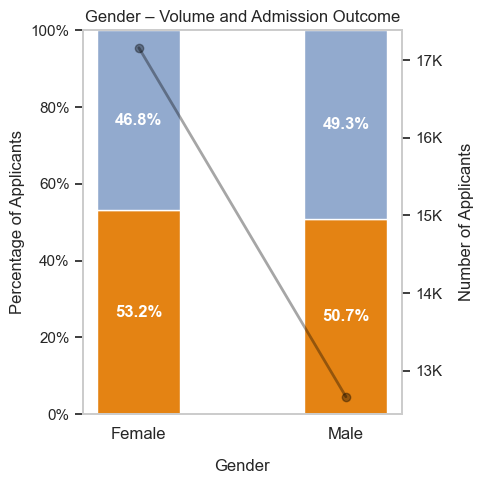

In [120]:
col = 'STUDENT_GENDER'
df_plot = df_improved[~df_improved[col].isin(['Missing/Unknown'])].copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(5,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.4)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Gender', fontsize=12, labelpad=12)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'Gender – Volume and Admission Outcome', fontsize=12)
plt.xticks(rotation=0, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 15) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12, labelpad=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1., 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

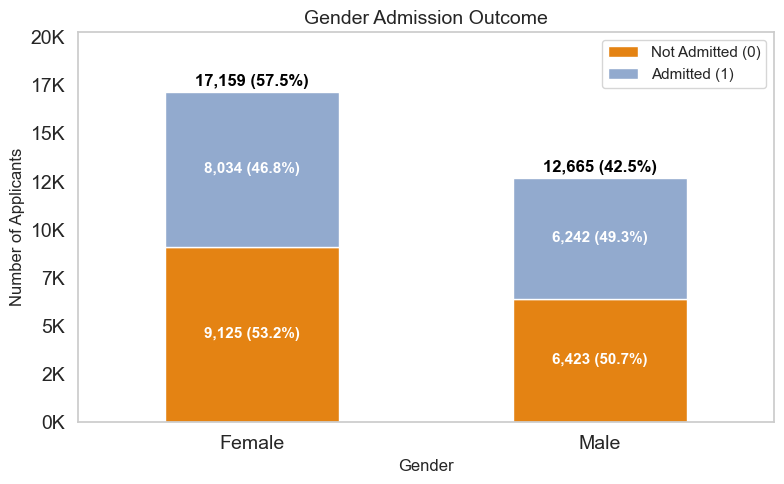

In [121]:
col = 'STUDENT_GENDER'

# Optional: exclude Not Reported
df_plot = df_improved[~df_improved[col].isin(['Missing/Unknown'])].copy()

# Compute counts by Gender and Admitted status
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

# Compute totals per category
group_totals = group_counts.sum(axis=1)

# Compute % of total for each category (e.g., Female % of all)
grand_total = group_totals.sum()
group_totals_pct = (group_totals / grand_total * 100).round(1)

# Plot stacked bar chart by count
ax = group_counts.plot(kind='bar', stacked=True, figsize=(8,5),
                       color=['#E48313','#92AACE'])  # 0 then 1

plt.title(f'Gender Admission Outcome', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add count + percentage labels inside each stacked section
for idx, row in group_counts.iterrows():
    total = group_totals[idx]
    cumulative = 0
    for admitted_status, count in row.items():
        if count > 0:  # only label non-zero
            percent = count / total * 100
            ax.text(
                x=list(group_counts.index).index(idx),
                y=cumulative + count/2,
                s=f'{int(count):,} ({percent:.1f}%)',
                ha='center', va='center', color='white', fontsize=11, weight='bold'
            )
            cumulative += count

# Add total count + % of grand total on top of each stacked bar
for i, (total, pct_of_total) in enumerate(zip(group_totals, group_totals_pct)):
    ax.text(
        i,
        total + (group_totals.max() * 0.01),  # position just above bar
        f'{int(total):,} ({pct_of_total:.1f}%)',
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.ylim(0, max_count * 0.7)

plt.legend(labels=['Not Admitted (0)', 'Admitted (1)'])
plt.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.2. Florida Residency

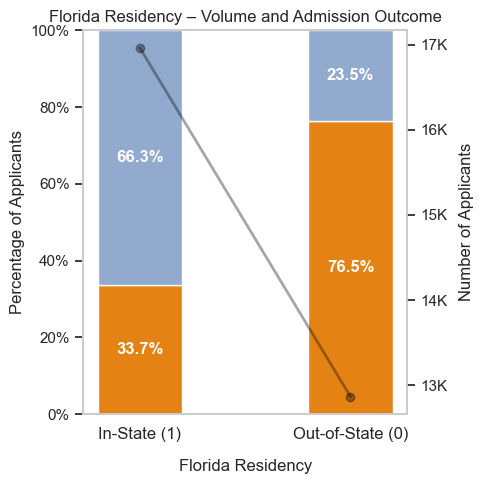

In [122]:
col = 'FL_RESY_BINARY'
df_plot = df_improved.copy()

# Map binary to readable labels and keep Missing/Unknown
label_map = {1: 'In-State (1)', 0: 'Out-of-State (0)'}
df_plot['FL_RESY_LABEL'] = df_plot[col].map(label_map)
df_plot['FL_RESY_LABEL'] = df_plot['FL_RESY_LABEL'].fillna('Missing/Unknown')

# counts -> totals -> percentages
group_counts = df_plot.groupby(['FL_RESY_LABEL', 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(5,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.4)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Florida Residency', fontsize=12, labelpad=12)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title('Florida Residency – Volume and Admission Outcome', fontsize=12)
ax1.set_xticklabels([textwrap.fill(label, 16) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12, labelpad=8)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
# Uncomment to show combined legend outside:
# ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.3. Military Status

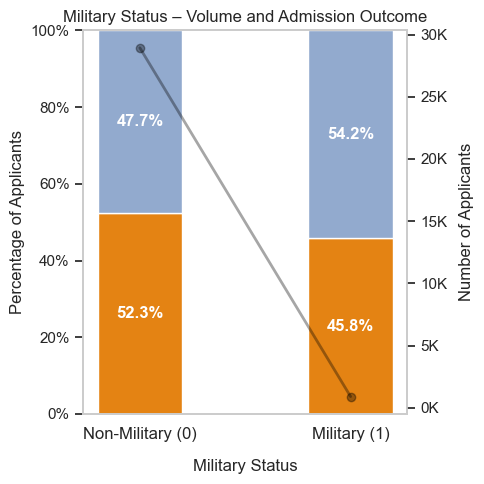

In [123]:
col = 'US_MILITARY_STATUS_BINARY'
df_plot = df_improved.copy()

# Map binary to readable labels and keep Missing/Unknown
label_map = {1: 'Military (1)', 0: 'Non-Military (0)'}
df_plot['US_MILITARY_STATUS_BINARY'] = df_plot[col].map(label_map)
# df_plot['US_MILITARY_STATUS_BINARY'] = df_plot['US_MILITARY_STATUS_BINARY'].fillna('Missing/Unknown')

# counts -> totals -> percentages
group_counts = df_plot.groupby(['US_MILITARY_STATUS_BINARY', 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(5,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.4)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Military Status', fontsize=12, labelpad=12)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title('Military Status – Volume and Admission Outcome', fontsize=12)
ax1.set_xticklabels([textwrap.fill(label, 16) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12, labelpad=8)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
# Uncomment to show combined legend outside:
# ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.4. Ethnicity

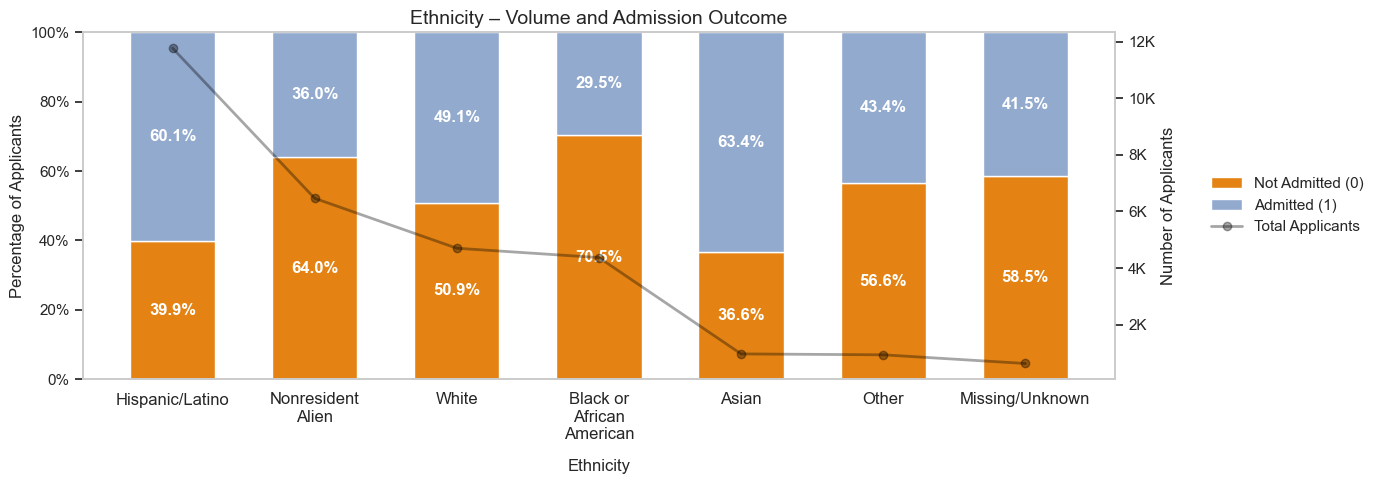

In [124]:
col = 'ETHNICITY_GROUPED'
df_plot = df_improved.copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(14,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.6)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Ethnicity', fontsize=12, labelpad=12)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'Ethnicity – Volume and Admission Outcome', fontsize=14)
plt.xticks(rotation=0, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 15) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.5. Admittion Type

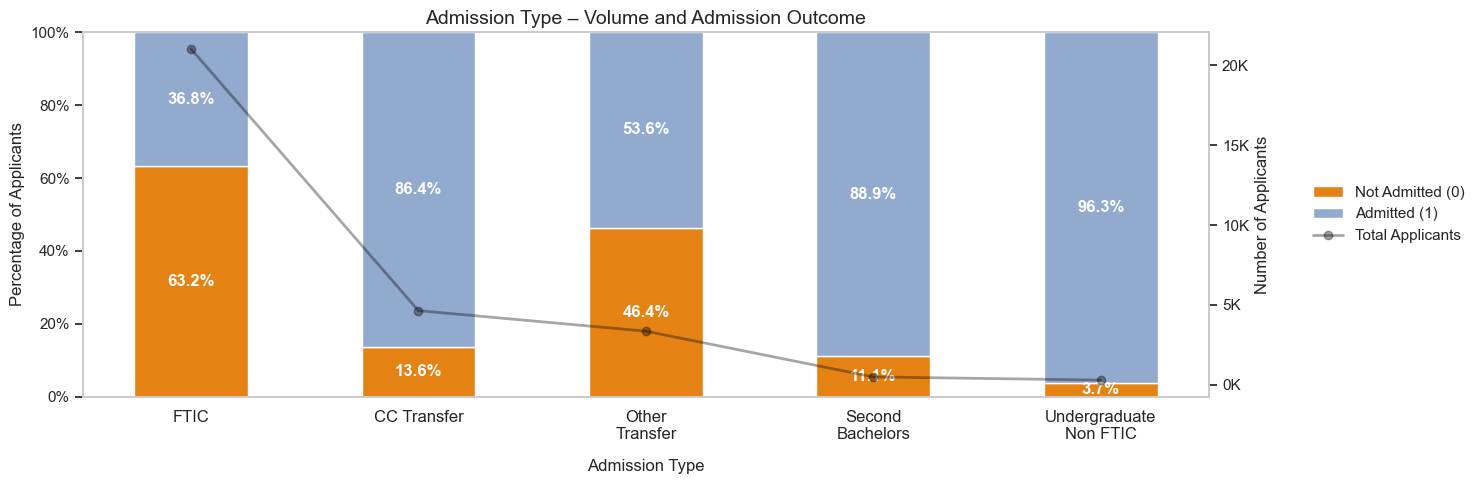

In [125]:
col = 'STUDENT_ADMIT_TYPE'
df_plot = df_improved.copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(15,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.5)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Admission Type', fontsize=12, labelpad=12)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'Admission Type – Volume and Admission Outcome', fontsize=14)
plt.xticks(rotation=0, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 13) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.6. Intended College

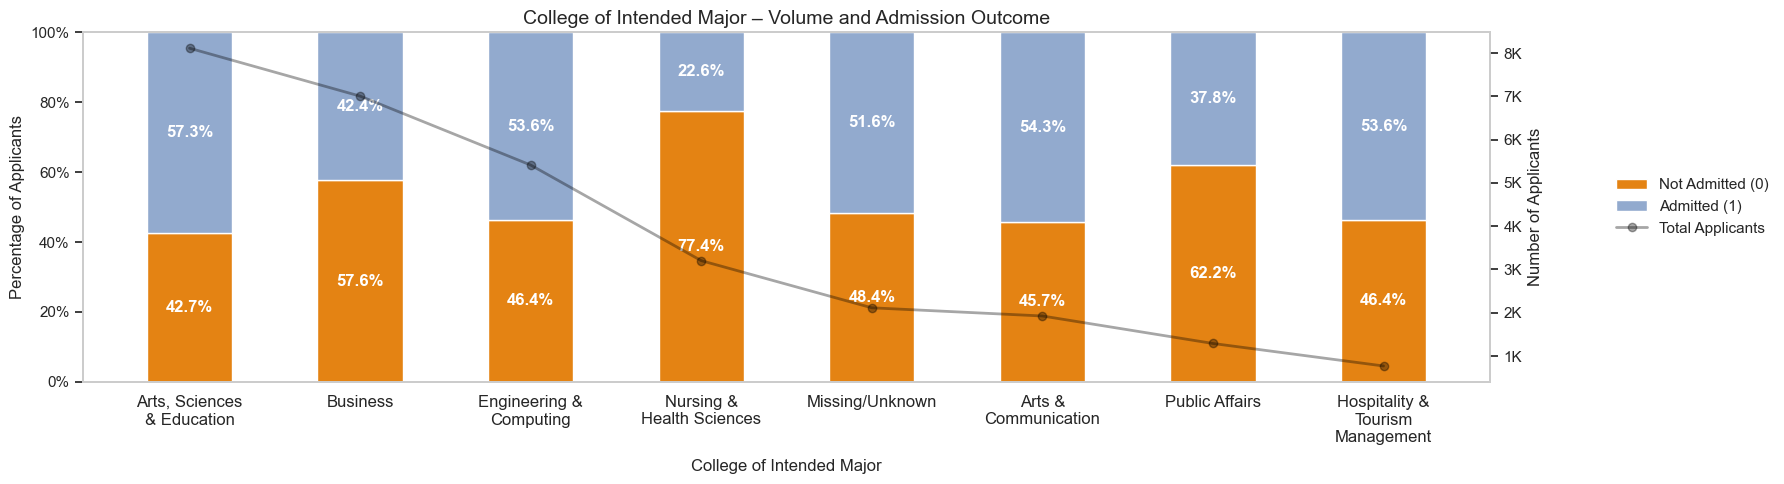

In [126]:
col = 'INTENDED_COLLEGE'
df_plot = df_improved.copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(18,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.5)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('College of Intended Major', fontsize=12, labelpad=10)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'College of Intended Major – Volume and Admission Outcome', fontsize=14)
plt.xticks(rotation=30, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 15) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.7. Continent of Birth

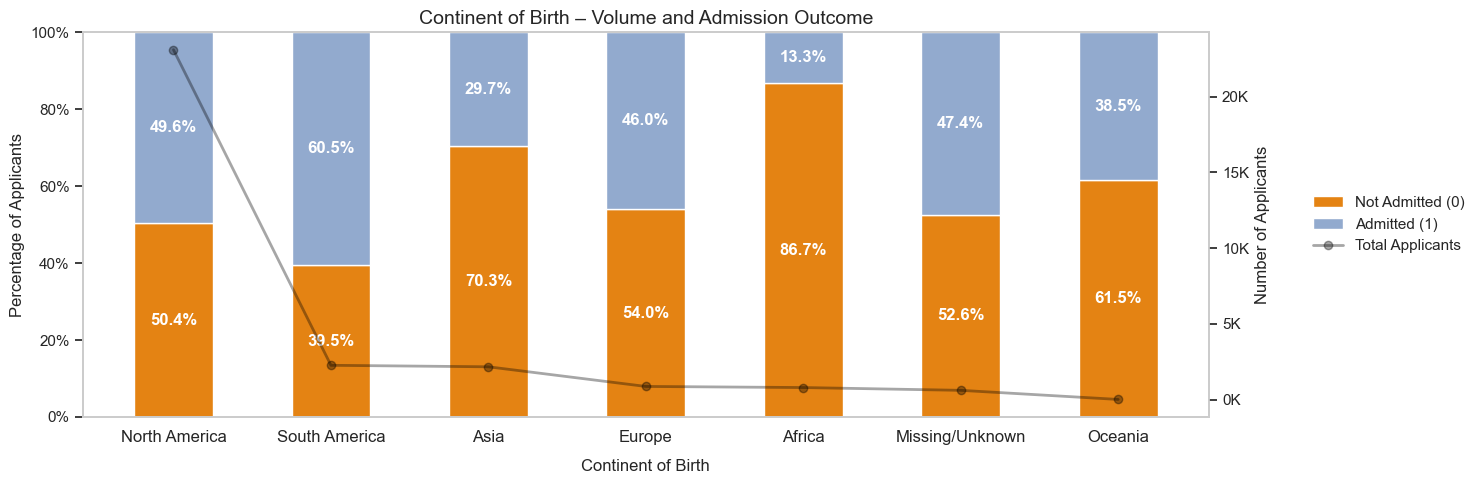

In [127]:
col = 'CONTINENT_OF_BIRTH'
df_plot = df_improved.copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(15,5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.5)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Continent of Birth', fontsize=12, labelpad=10)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'Continent of Birth – Volume and Admission Outcome', fontsize=14)
plt.xticks(rotation=30, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 15) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

#### 3.1.8. Age

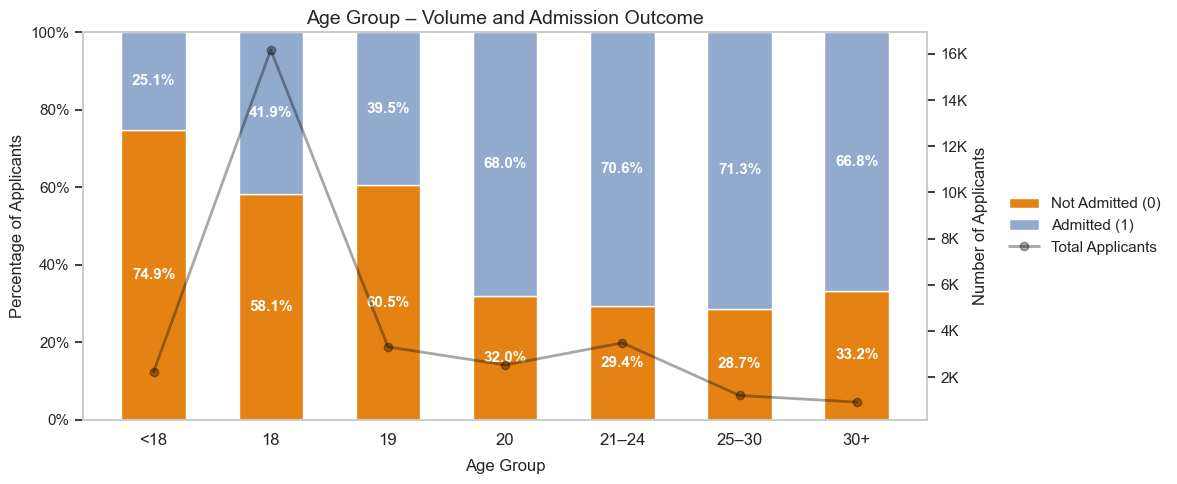

In [128]:
# Define bins and labels (chronological order)
bins   = [15, 17, 18, 19, 20, 24, 30, 100]
labels = ['<18', '18', '19', '20', '21–24', '25–30', '30+']

df_plot = df_improved.copy()
df_plot['AGE_GROUP'] = pd.cut(df_plot['TERM_AGE'], bins=bins, labels=labels, right=True)

col = 'AGE_GROUP'

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'ADMITTED']).size().unstack(fill_value=0)

# Force label order (not sorted by totals)
group_counts = group_counts.reindex(labels, fill_value=0)

group_totals = group_counts.sum(axis=1)
group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(12, 5))
bottom = np.zeros(len(cats))
colors = ['#E48313', '#92AACE']  # 0 then 1
labels_leg = ['Not Admitted (0)', 'Admitted (1)']

for j, status in enumerate(group_perc.columns):
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], width=0.55, label=labels_leg[j])
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=11, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Age Group', fontsize=12, labelpad=8)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title('Age Group – Volume and Admission Outcome', fontsize=14)

ax1.set_xticklabels([textwrap.fill(str(label), 10) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

### 3.2. High-School GPA and SAT Scores by Admission Type

In [129]:
# Admission rate by GPA missing flag
gpa_missing_rate = (
    df_improved.groupby("HIGH_SCHL_GPA_MISSING")["ADMITTED"]
    .mean()
    .rename("Admission Rate")
)
print("Admission Rate by GPA Missing Flag:\n", gpa_missing_rate, "\n")

# Admission rate by SAT missing flag
sat_missing_rate = (
    df_improved.groupby("SAT_TOTAL_BEST_MISSING")["ADMITTED"]
    .mean()
    .rename("Admission Rate")
)
print("Admission Rate by SAT Missing Flag:\n", sat_missing_rate)

Admission Rate by GPA Missing Flag:
 HIGH_SCHL_GPA_MISSING
0    0.653612
1    0.190218
Name: Admission Rate, dtype: float64 

Admission Rate by SAT Missing Flag:
 SAT_TOTAL_BEST_MISSING
0    0.690093
1    0.265545
Name: Admission Rate, dtype: float64


In [130]:
# Cross-tabulation of both columns
pd.crosstab(df_improved['ADMITTED'], df_improved['HIGH_SCHL_GPA_MISSING'])

HIGH_SCHL_GPA_MISSING,0,1
ADMITTED,,
0,6430,9123
1,12133,2143


In [131]:
# Cross-tabulation of both columns
pd.crosstab(df_improved['ADMITTED'], df_improved['SAT_TOTAL_BEST_MISSING'])

SAT_TOTAL_BEST_MISSING,0,1
ADMITTED,,
0,4639,10914
1,10330,3946


#### 3.2.1. High-School GPA Missing

In [132]:
ct = pd.crosstab(df_improved['STUDENT_ADMIT_TYPE'], df_improved['HIGH_SCHL_GPA_MISSING'])

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

HIGH_SCHL_GPA_MISSING,0,1
STUDENT_ADMIT_TYPE,,
FTIC,13055,7977
CC Transfer,3249,1396
Other Transfer,1723,1637
Second Bachelors,274,222
Undergraduate Non FTIC,262,34


In [133]:
# Crosstab only for admitted students
ct = pd.crosstab(
    df_improved.loc[df_improved['ADMITTED'] == 1, 'STUDENT_ADMIT_TYPE'],
    df_improved.loc[df_improved['ADMITTED'] == 1, 'HIGH_SCHL_GPA_MISSING']
)

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

HIGH_SCHL_GPA_MISSING,0,1
STUDENT_ADMIT_TYPE,,
FTIC,7694,41
CC Transfer,2831,1183
Other Transfer,1089,712
Second Bachelors,265,176
Undergraduate Non FTIC,254,31


In [134]:
# Crosstab only for admitted students
ct = pd.crosstab(
    df_improved.loc[df_improved['ADMITTED'] == 0, 'STUDENT_ADMIT_TYPE'],
    df_improved.loc[df_improved['ADMITTED'] == 0, 'HIGH_SCHL_GPA_MISSING']
)

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

HIGH_SCHL_GPA_MISSING,1,0
STUDENT_ADMIT_TYPE,,
FTIC,7936,5361
Other Transfer,925,634
CC Transfer,213,418
Second Bachelors,46,9
Undergraduate Non FTIC,3,8


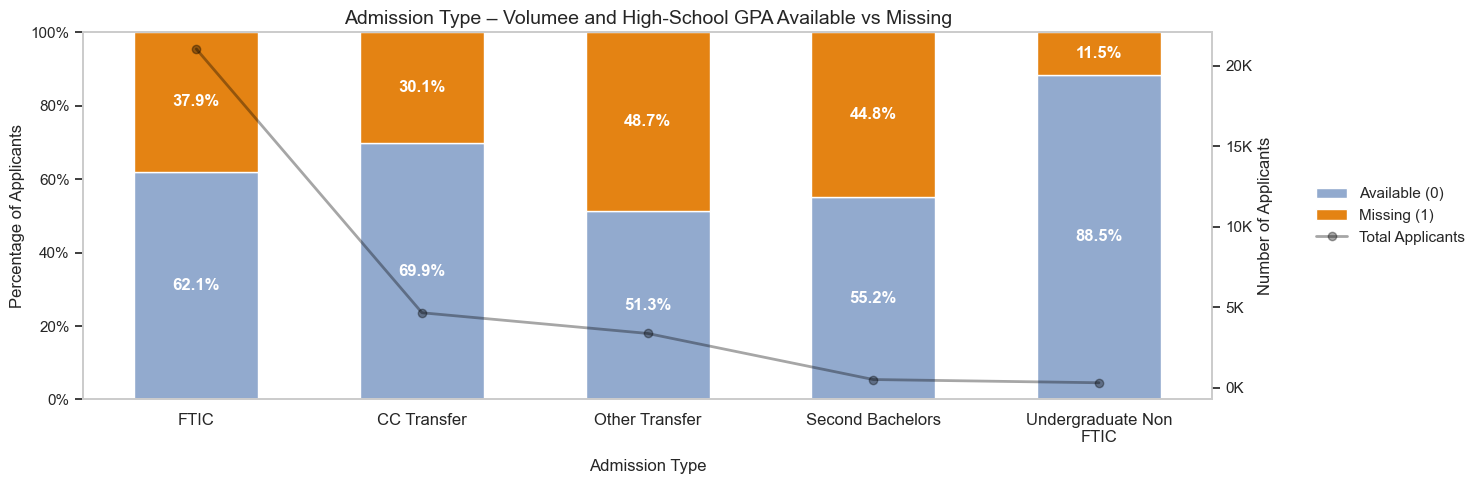

In [135]:
col = 'STUDENT_ADMIT_TYPE'
df_plot = df_improved.copy()

# Ensure the flag is numeric 0/1
df_plot['HIGH_SCHL_GPA_MISSING'] = df_plot['HIGH_SCHL_GPA_MISSING'].astype(int)

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'HIGH_SCHL_GPA_MISSING']).size().unstack(fill_value=0)

# Make sure both columns 0 and 1 exist and are in order (0=Available, 1=Missing)
for needed in [0, 1]:
    if needed not in group_counts.columns:
        group_counts[needed] = 0
group_counts = group_counts[[0, 1]]

group_totals = group_counts.sum(axis=1)

# Sort by total volume (optional). Remove these two lines to keep original order.
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(15, 5))
bottom = np.zeros(len(cats))

# Consistent colors: 0=Available (blue), 1=Missing (orange)
colors = ['#92AACE', '#E48313']
labels = ['Available (0)', 'Missing (1)']

for j, status in enumerate(group_perc.columns):  # 0, 1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.55)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Admission Type', fontsize=12, labelpad=10)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title('Admission Type – Volumee and High-School GPA Available vs Missing', fontsize=14)

# Wrap labels once (don’t also call plt.xticks)
ax1.set_xticklabels([textwrap.fill(str(label), 18) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

In [136]:
print("Overall Summary Statistics for HIGH_SCHL_GPA (Excluding Missing):")
display(
    df_improved.loc[df_improved['HIGH_SCHL_GPA_MISSING'] == 0, 'HIGH_SCHL_GPA']
    .describe().round(2)
)

print("\nSummary Statistics for HIGH_SCHL_GPA by STUDENT_ADMIT_TYPE (Excluding Missing):")
summary_by_type_gpa = (
    df_improved.loc[df_improved['HIGH_SCHL_GPA_MISSING'] == 0]
    .groupby('STUDENT_ADMIT_TYPE')['HIGH_SCHL_GPA']
    .describe().round(2)
)
pd.set_option('display.max_rows', None)
display(summary_by_type_gpa)

Overall Summary Statistics for HIGH_SCHL_GPA (Excluding Missing):


count    18563.00
mean         3.87
std          0.66
min          1.40
25%          3.40
50%          4.00
75%          4.40
max          5.00
Name: HIGH_SCHL_GPA, dtype: float64


Summary Statistics for HIGH_SCHL_GPA by STUDENT_ADMIT_TYPE (Excluding Missing):


,count,mean,std,min,25%,50%,75%,max
STUDENT_ADMIT_TYPE,,,,,,,,
CC Transfer,3249.0,3.56,0.60,1.4,3.1,3.6,4.0,5.0
FTIC,13055.0,4.00,0.63,1.4,3.6,4.1,4.5,5.0
Other Transfer,1723.0,3.55,0.65,1.6,3.1,3.6,4.0,5.0
Second Bachelors,274.0,3.61,0.67,1.6,3.2,3.7,4.1,4.9
Undergraduate Non FTIC,262.0,3.35,0.45,2.4,3.0,3.4,3.7,4.2


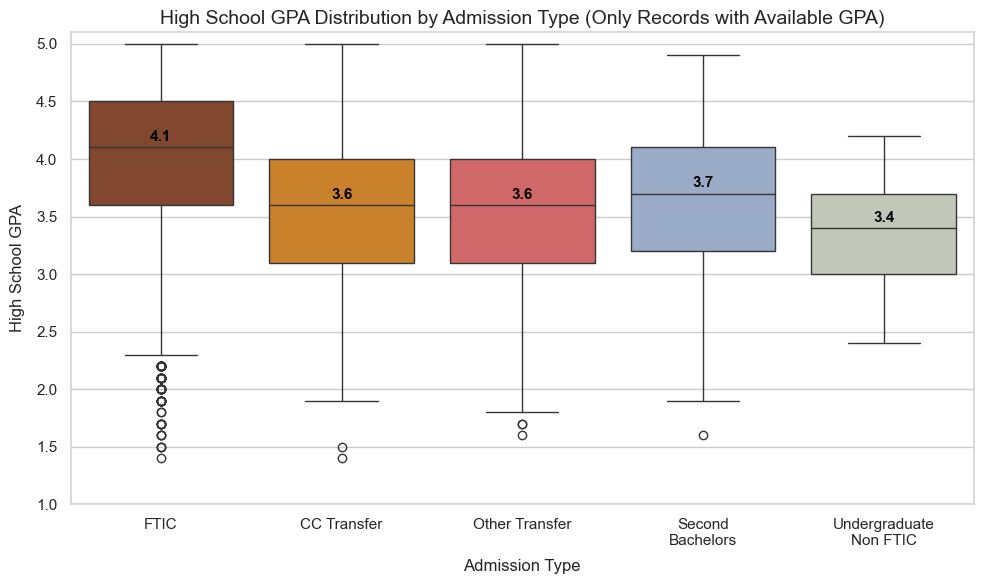

In [137]:
# Prep
df_scores = (
    df_improved
    .assign(
        HIGH_SCHL_GPA=pd.to_numeric(df_improved['HIGH_SCHL_GPA'], errors='coerce'),
        STUDENT_ADMIT_TYPE=df_improved['STUDENT_ADMIT_TYPE'].astype(str).str.strip()
    )
    .loc[(df_improved['HIGH_SCHL_GPA_MISSING'] == 0) & (df_improved['HIGH_SCHL_GPA'].notna())]
    .copy()
)

order  = ["FTIC", "CC Transfer", "Other Transfer", "Second Bachelors", "Undergraduate Non FTIC"]
colors = ["#904321", "#E48312", "#E15759", "#92AACE", "#C1CAB6"]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_scores,
    x='STUDENT_ADMIT_TYPE',
    y='HIGH_SCHL_GPA',
    order=order,
    showfliers=True,
    palette=colors
)

# Annotate medians
medians = df_scores.groupby('STUDENT_ADMIT_TYPE')['HIGH_SCHL_GPA'].median().reindex(order)
for i, (grp, med) in enumerate(medians.items()):
    ax.text(i, med + 0.03, f'{med:.1f}', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black')
            #bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

# Formatting
ax.set_title('High School GPA Distribution by Admission Type (Only Records with Available GPA)', fontsize=14)
ax.set_xlabel('Admission Type', fontsize=12, labelpad=8)
ax.set_ylabel('High School GPA', fontsize=12, labelpad=8)

# Wrap long x labels
wrapped_labels = [textwrap.fill(lbl, 14) for lbl in order]
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=11)
ax.tick_params(axis='y', labelsize=11)

# Optional: lock y-range for consistency across slides
ax.set_ylim(1.0, 5.1)

# Show full frame
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("lightgray")

plt.tight_layout()
plt.show()

#### 3.2.2. SAT Score Missing

In [138]:
ct = pd.crosstab(df_improved['STUDENT_ADMIT_TYPE'], df_improved['SAT_TOTAL_BEST_MISSING'])

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

SAT_TOTAL_BEST_MISSING,0,1
STUDENT_ADMIT_TYPE,,
FTIC,11781,9251
CC Transfer,1748,2897
Other Transfer,1203,2157
Second Bachelors,99,397
Undergraduate Non FTIC,138,158


In [139]:
# Crosstab only for admitted students
ct = pd.crosstab(
    df_improved.loc[df_improved['ADMITTED'] == 1, 'STUDENT_ADMIT_TYPE'],
    df_improved.loc[df_improved['ADMITTED'] == 1, 'SAT_TOTAL_BEST_MISSING']
)

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

SAT_TOTAL_BEST_MISSING,0,1
STUDENT_ADMIT_TYPE,,
FTIC,7734,1
CC Transfer,1510,2504
Other Transfer,851,950
Second Bachelors,99,342
Undergraduate Non FTIC,136,149


In [140]:
# Crosstab only for admitted students
ct = pd.crosstab(
    df_improved.loc[df_improved['ADMITTED'] == 0, 'STUDENT_ADMIT_TYPE'],
    df_improved.loc[df_improved['ADMITTED'] == 0, 'SAT_TOTAL_BEST_MISSING']
)

# Sort rows by row total
ct = ct.reindex(ct.sum(axis=1).sort_values(ascending=False).index)

# Sort columns by column total
ct = ct[ct.sum(axis=0).sort_values(ascending=False).index]

display(ct)

SAT_TOTAL_BEST_MISSING,1,0
STUDENT_ADMIT_TYPE,,
FTIC,9250,4047
Other Transfer,1207,352
CC Transfer,393,238
Second Bachelors,55,0
Undergraduate Non FTIC,9,2


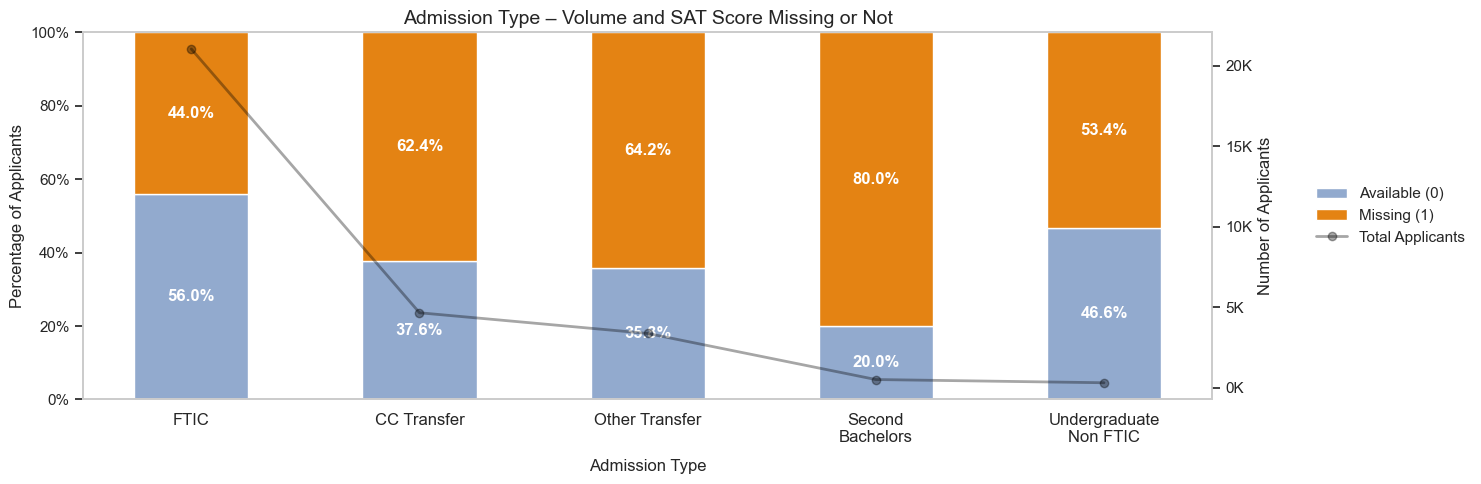

In [141]:
col = 'STUDENT_ADMIT_TYPE'
df_plot = df_improved.copy()

# counts -> totals -> percentages
group_counts = df_plot.groupby([col, 'SAT_TOTAL_BEST_MISSING']).size().unstack(fill_value=0)

group_totals = group_counts.sum(axis=1)
order = group_totals.sort_values(ascending=False).index
group_counts = group_counts.reindex(order)
group_totals = group_totals.reindex(order)

group_perc = group_counts.div(group_totals, axis=0) * 100  # rows sum to 100

# x positions AFTER sorting
cats = group_perc.index.tolist()
x = np.arange(len(cats))

# Plot 100% stacked bars
fig, ax1 = plt.subplots(figsize=(15,5))
bottom = np.zeros(len(cats))
colors = ['#92AACE', '#E48313']  # 0 then 1
labels = ['Available (0)', 'Missing (1)']

for j, status in enumerate(group_perc.columns):  # 0,1
    heights = group_perc[status].values
    ax1.bar(x, heights, bottom=bottom, color=colors[j], label=labels[j], width=0.5)
    # % labels inside
    for i, h in enumerate(heights):
        if h > 0:
            ax1.text(x[i], bottom[i] + h/2, f'{h:.1f}%',
                     ha='center', va='center', color='white',
                     fontsize=12, fontweight='bold')
    bottom += heights

ax1.set_xticks(x, cats)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Admission Type', fontsize=12, labelpad=10)
ax1.set_ylabel('Percentage of Applicants', fontsize=12)
ax1.set_title(f'Admission Type – Volume and SAT Score Missing or Not', fontsize=14)
plt.xticks(rotation=30, fontsize=12.5)
ax1.set_xticklabels([textwrap.fill(label, 15) for label in cats], rotation=0, ha='center', fontsize=12)

# Secondary axis: total applicants (soft line)
ax2 = ax1.twinx()
ax2.plot(x, group_totals.values, color='black', marker='o',
         linewidth=2, alpha=0.35, label='Total Applicants')
ax2.set_ylabel('Number of Applicants', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{int(v/1000)}K'))

# Legend outside (combine both axes' handles)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.08, 0.5), frameon=False)  # outside

ax1.grid(False); ax2.grid(False)
plt.tight_layout()
plt.show()

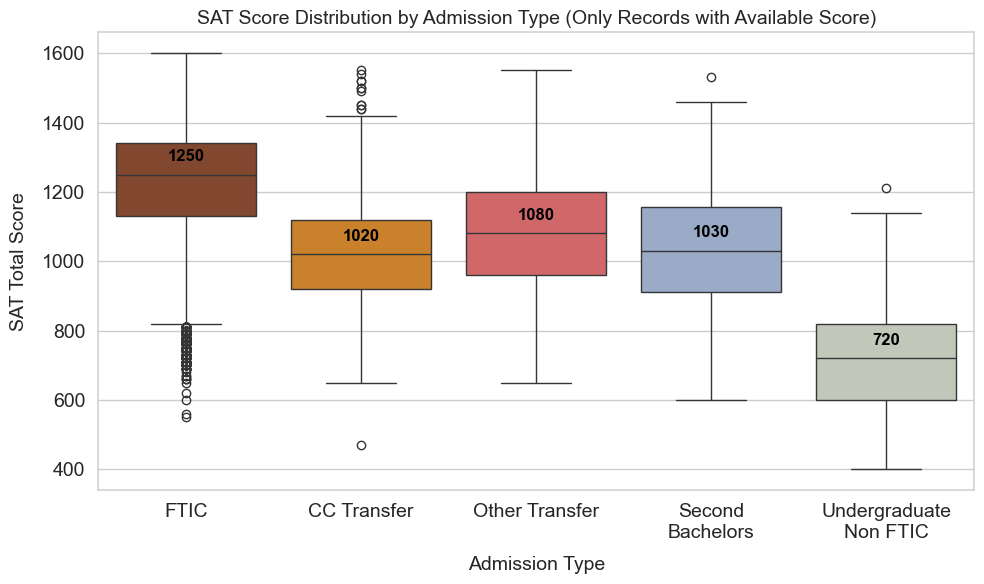

In [142]:
# Ensure clean categories
df_scores = df_improved.copy()
df_scores['SAT_TOTAL_BEST'] = pd.to_numeric(df_scores['SAT_TOTAL_BEST'], errors='coerce')
df_scores['STUDENT_ADMIT_TYPE'] = df_scores['STUDENT_ADMIT_TYPE'].astype(str).str.strip()

# Filter: only rows with available SAT scores
df_scores = df_scores[(df_scores['SAT_TOTAL_BEST_MISSING'] == 0) & df_scores['SAT_TOTAL_BEST'].notna()]

# Define desired order
order = ["FTIC", "CC Transfer", "Other Transfer", "Second Bachelors", "Undergraduate Non FTIC"]

# Custom colors
colors = ["#904321","#E48312","#E15759","#92AACE","#C1CAB6"]

# Boxplot
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df_scores,
    x='STUDENT_ADMIT_TYPE',
    y='SAT_TOTAL_BEST',
    order=order,
    showfliers=True,
    palette=colors  # use your custom palette
)

# Calculate medians for each group
medians = df_scores.groupby('STUDENT_ADMIT_TYPE')['SAT_TOTAL_BEST'].median().reindex(order)

# Add median labels on the plot
for i, median in enumerate(medians):
    ax.text(i, median + 30,        # position slightly above the median line
            f'{int(median)}',
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='black')

# Formatting
ax.set_title('SAT Score Distribution by Admission Type (Only Records with Available Score)', fontsize=14)
ax.set_xlabel('Admission Type', fontsize=14, labelpad=10)
ax.set_ylabel('SAT Total Score', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
ax.set_xticklabels([textwrap.fill(label, 14) for label in cats], rotation=0, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Show full frame (all spines)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("lightgray")

plt.tight_layout()
plt.show()

In [143]:
print("\nOverall Summary Statistics for SAT_TOTAL_BEST (Excluding Missing):")
display(
    df_improved.loc[df_improved['SAT_TOTAL_BEST_MISSING'] == 0, 'SAT_TOTAL_BEST']
    .describe().round(2)
)

print("\nSummary Statistics for SAT_TOTAL_BEST by STUDENT_ADMIT_TYPE (Excluding Missing):")
summary_by_type_sat = (
    df_improved.loc[df_improved['SAT_TOTAL_BEST_MISSING'] == 0]
    .groupby('STUDENT_ADMIT_TYPE')['SAT_TOTAL_BEST']
    .describe().round(2)
)
display(summary_by_type_sat)


Overall Summary Statistics for SAT_TOTAL_BEST (Excluding Missing):


count    14969.00
mean      1182.11
std        192.12
min        400.00
25%       1040.00
50%       1220.00
75%       1320.00
max       1600.00
Name: SAT_TOTAL_BEST, dtype: float64


Summary Statistics for SAT_TOTAL_BEST by STUDENT_ADMIT_TYPE (Excluding Missing):


,count,mean,std,min,25%,50%,75%,max
STUDENT_ADMIT_TYPE,,,,,,,,
CC Transfer,1748.0,1026.37,145.10,470.0,920.0,1020.0,1120.0,1550.0
FTIC,11781.0,1221.69,177.93,550.0,1130.0,1250.0,1340.0,1600.0
Other Transfer,1203.0,1084.71,166.48,650.0,960.0,1080.0,1200.0,1550.0
Second Bachelors,99.0,1029.80,185.57,600.0,910.0,1030.0,1155.0,1530.0
Undergraduate Non FTIC,138.0,734.06,166.12,400.0,600.0,720.0,820.0,1210.0


### 3.3. Quantitative Metrics

In [144]:
DF = df_improved.copy()

# Make custom age groups
bins   = [-np.inf, 17, 18, 19, 20, 24, 30, np.inf]
labels = ["<18", "18", "19", "20", "21-24", "25-30", ">30"]
DF["AGE_GROUP"] = pd.cut(DF["TERM_AGE"], bins=bins, labels=labels, right=True)

# Exclude missing gender
DF = DF[~DF["STUDENT_GENDER"].isin(["Missing/Unknown"])].copy()

#### 3.3.1. Selection Rate (SR)

The selection rate (or admission rate) for group i represents the proportion of individuals in that group who were admitted.
- Formula: Admitted Applicants in Group i / Total Applicants in Group i
- Interpretation: used as the base measure to compare across groups (significant difference between rates may indicate bias).

**Selection Rate (SR) Difference**

Measures disparity between groups. Larger differences show greater imbalance.

- Formula: difference between the max SR of group i and the min SR of group i
- Interpretation: admissions should be equally likely regardless of group membership.
    - ~0: low disparity
    - Moderate (0.05-0.15): potential disparity
    - High (>0.20): strong disparity (potential bias)

In [145]:
def compute_sr(df: pd.DataFrame, feature: str, target: str = "ADMITTED"):
    """
    Returns:
      group_df: per-group Applicants, Admitted, SR
      sr_diff:  max(SR_i) - min(SR_i)
    """
    grp = df.groupby(feature, dropna=False)
    applicants = grp[target].size().rename("Applicants")
    admitted   = grp[target].sum(min_count=1).fillna(0).rename("Admitted")
    sr = (admitted / applicants).rename("SR")

    group_df = pd.concat([applicants, admitted, sr], axis=1).reset_index()
    sr_diff = float(sr.max() - sr.min()) if len(sr) else 0.0
    return group_df, sr_diff

features = [
    "STUDENT_GENDER",
    "FL_RESY_BINARY",
    "US_MILITARY_STATUS_BINARY",
    "ETHNICITY_GROUPED",
    "AGE_GROUP",
    "CONTINENT_OF_BIRTH",
]

for col in features:
    sr_table, sr_diff = compute_sr(DF, col, target="ADMITTED")
    print(f"\nSR for {col}:")
    print(sr_table.to_string(index=False))
    print(f"ΔSR (max - min): {sr_diff:.3f}")


SR for STUDENT_GENDER:
STUDENT_GENDER  Applicants  Admitted       SR
        Female       17159      8034 0.468209
          Male       12665      6242 0.492854
ΔSR (max - min): 0.025

SR for FL_RESY_BINARY:
 FL_RESY_BINARY  Applicants  Admitted       SR
              0       12863      3029 0.235482
              1       16961     11247 0.663109
ΔSR (max - min): 0.428

SR for US_MILITARY_STATUS_BINARY:
 US_MILITARY_STATUS_BINARY  Applicants  Admitted       SR
                         0       28924     13788 0.476698
                         1         900       488 0.542222
ΔSR (max - min): 0.066

SR for ETHNICITY_GROUPED:
        ETHNICITY_GROUPED  Applicants  Admitted       SR
                    Asian         961       609 0.633715
Black or African American        4369      1290 0.295262
          Hispanic/Latino       11779      7078 0.600900
          Missing/Unknown         622       258 0.414791
        Nonresident Alien        6465      2330 0.360402
                    Other 

#### 3.3.2. Weighted Selection Rate (WSR)

Represents the proportion of admitted applicants in each group i relative to the entire applicant pool.
    
- Formula: wieight of group i times selection rate of group i. This can also be simplified to admitted applicants of group i / total applicants

**Weighted Selection Rate (WSR) Difference**

Measures the gap between the groups that contribute the most and least to the admission total

- Formula: difference between the max WSR of group i and the min WSR of group i
- Interpretation:
    - ~0: groups contribute equally
    - Moderate (0.05-0.15): some imbalance
    - High (>0.20): stronger concentration in a group (potential bias)

In [146]:
def compute_wsr(df: pd.DataFrame, feature: str, target: str = "ADMITTED"):
    """
    WSR_i = Admitted_i / TotalApplicants  (already 'weighted' by group size)
    Returns:
      group_df: per-group Applicants, Admitted, WSR
      wsr_diff: max(WSR_i) - min(WSR_i)
    """
    grp = df.groupby(feature, dropna=False)
    applicants = grp[target].size().rename("Applicants")
    admitted   = grp[target].sum(min_count=1).fillna(0).rename("Admitted")

    N = float(applicants.sum()) if applicants.sum() > 0 else 1.0
    wsr = (admitted / N).rename("WSR")

    group_df = pd.concat([applicants, admitted, wsr], axis=1).reset_index()
    wsr_diff = float(wsr.max() - wsr.min()) if len(wsr) else 0.0
    return group_df, wsr_diff

# Example usage
for col in features:
    wsr_table, wsr_diff = compute_wsr(DF, col, target="ADMITTED")
    print(f"\nWSR for {col}:")
    print(wsr_table.to_string(index=False))
    print(f"ΔWSR (max - min): {wsr_diff:.3f}")


WSR for STUDENT_GENDER:
STUDENT_GENDER  Applicants  Admitted      WSR
        Female       17159      8034 0.269380
          Male       12665      6242 0.209295
ΔWSR (max - min): 0.060

WSR for FL_RESY_BINARY:
 FL_RESY_BINARY  Applicants  Admitted      WSR
              0       12863      3029 0.101562
              1       16961     11247 0.377112
ΔWSR (max - min): 0.276

WSR for US_MILITARY_STATUS_BINARY:
 US_MILITARY_STATUS_BINARY  Applicants  Admitted      WSR
                         0       28924     13788 0.462312
                         1         900       488 0.016363
ΔWSR (max - min): 0.446

WSR for ETHNICITY_GROUPED:
        ETHNICITY_GROUPED  Applicants  Admitted      WSR
                    Asian         961       609 0.020420
Black or African American        4369      1290 0.043254
          Hispanic/Latino       11779      7078 0.237326
          Missing/Unknown         622       258 0.008651
        Nonresident Alien        6465      2330 0.078125
                   

#### 3.3.3. Entropy (H) 

Measures the diversity or balance of the applicant or admitted pool across groups. Higher entropy means more diversity and lower entropy means less diversity.

- Formula for Applicants entropy, where p is the applicants in group i / total applicants
$$H(p) = - \sum_{i} p_i \log_2 (p_i)$$

- Formula for Admitted aplicants entropy, where q is the admitted applicants in group i / total admitted applicants
$$H(q) = - \sum_{i} q_i \log_2 (q_i)$$

In [147]:
def shannon_entropy_from_counts(counts: pd.Series) -> float:
    """Shannon entropy in bits from counts (safe for zeros)."""
    total = counts.sum()
    if total <= 0:
        return 0.0
    p = counts / total
    p = p[p > 0]
    return float(-(p * np.log2(p)).sum()) if len(p) else 0.0

def compute_entropy_metrics(df: pd.DataFrame, feature: str, target: str = "ADMITTED"):
    """
    Returns:
      group_df: per-group Applicants, Admitted, p_share, q_share
      summary:  H(p), H(q), ΔH = H(q) - H(p)
    """
    grp = df.groupby(feature, dropna=False)
    applicants = grp[target].size().rename("Applicants")
    admitted   = grp[target].sum(min_count=1).fillna(0).rename("Admitted")

    # Shares
    p_share = (applicants / applicants.sum()).rename("p_share") if applicants.sum() > 0 else applicants*0
    q_share = (admitted   / admitted.sum()).rename("q_share")   if admitted.sum()   > 0 else admitted*0

    # Entropies
    H_p = shannon_entropy_from_counts(applicants)
    H_q = shannon_entropy_from_counts(admitted)
    dH  = H_q - H_p

    group_df = pd.concat([applicants, admitted, p_share, q_share], axis=1).reset_index()
    summary = {"H_applicants": H_p, "H_admitted": H_q, "H_diff": dH}
    return group_df, summary

# Example usage
for col in features:
    ent_table, ent_summary = compute_entropy_metrics(DF, col, target="ADMITTED")
    print(f"\nEntropy for {col}")
    print(ent_table.to_string(index=False))
    print(ent_summary)


Entropy for STUDENT_GENDER
STUDENT_GENDER  Applicants  Admitted  p_share  q_share
        Female       17159      8034 0.575342 0.562763
          Male       12665      6242 0.424658 0.437237
{'H_applicants': 0.983558768626225, 'H_admitted': 0.9886039666185807, 'H_diff': 0.005045197992355699}

Entropy for FL_RESY_BINARY
 FL_RESY_BINARY  Applicants  Admitted  p_share  q_share
              0       12863      3029 0.431297 0.212174
              1       16961     11247 0.568703 0.787826
{'H_applicants': 0.9863374573731196, 'H_admitted': 0.7456182898296211, 'H_diff': -0.24071916754349854}

Entropy for US_MILITARY_STATUS_BINARY
 US_MILITARY_STATUS_BINARY  Applicants  Admitted  p_share  q_share
                         0       28924     13788 0.969823 0.965817
                         1         900       488 0.030177 0.034183
{'H_applicants': 0.19527892228898872, 'H_admitted': 0.21495511318557353, 'H_diff': 0.019676190896584816}

Entropy for ETHNICITY_GROUPED
        ETHNICITY_GROUPED  App

**Summary and Highlights:**
- __Gender__: no meaningful difference, diverssity stayed cosistent after admissions
    - ΔSR: 0.025
    - ΔWSR: 0.060
    - ΔH: 0.005
- __Florida Residency__: large disparity, strong preference for in-state applicants
    - ΔSR: 0.428
    - ΔWSR: 0.276
    - ΔH: -0.241
- __US Military Status__: minimal impact, slight increase in diversity but the group is too small (~3%) to affect admission outcomes
    - ΔSR: 0.066
    - ΔWSR: 0.446
    - ΔH: 0.020
- __Ethnicity__: moderate disparity, admissions reduced ethnic diversity
    - ΔSR: 0.338
    - ΔWSR: 0.229
    - ΔH: -0.154
- __Age__: positive change as age diversity is slightly higher after admissions
    - ΔSR: 0.463
    - ΔWSR: 0.208
    - ΔH: 0.138
 - __Continent of Birth__: moderate disparity as geographic diversity decreased
    - ΔSR: 0.472
    - ΔWSR: 0.384
    - ΔH: -0.155

#### 3.4. Correlation Analysis

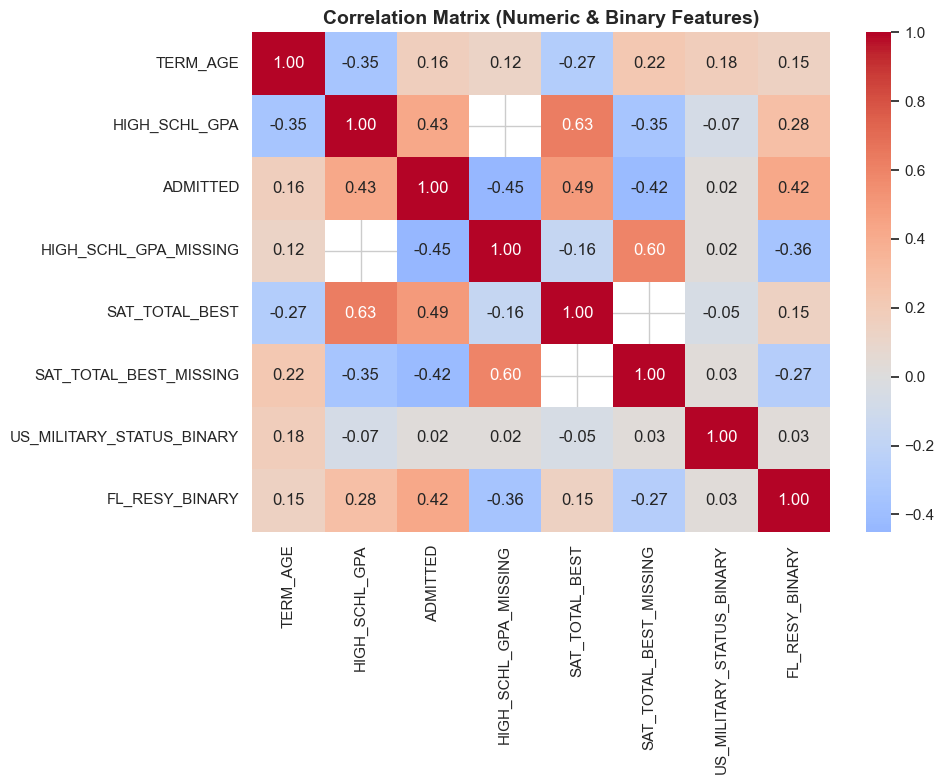

In [148]:
# Pick only numeric columns (including binary 0/1 variables)
num_cols = df_improved.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr = df_improved[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric & Binary Features)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


## 4. Modeling

### 4.1. Train-Test Split (80/20)

In [149]:
# Drop missing/unknown gender records
df_improved = df_improved[
    ~df_improved["STUDENT_GENDER"].isin(["Missing/Unknown"])
].copy()

In [150]:
# Define target column 
target_col = "ADMITTED"

# Split features and target
X = df_improved.drop(columns=[target_col])
y = df_improved[target_col]

# Train/Test split (80/20)
# Use stratify=y to preserve class proportions if it's binary (0/1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Recombine into single DataFrames
train_df = pd.concat([X_train, y_train], axis=1)
test_df  = pd.concat([X_test, y_test], axis=1)

# Save as CSV files
train_df.to_csv("admissions_train_80.csv", index=False)
test_df.to_csv("admissions_test_20.csv", index=False)

Check that Admitted class balance remains in both datasets (target column):

In [151]:
# Check class balance
def check_distribution(df, target_col, name):
    dist = df[target_col].value_counts(normalize=True) * 100
    print(f"\n{name} set class distribution:")
    for label, pct in dist.items():
        print(f"  Class {label}: {pct:.2f}%")

# Print distributions
check_distribution(train_df, target_col, "Training")
check_distribution(test_df, target_col, "Test")

# Display summary
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set class distribution:
  Class 0: 52.13%
  Class 1: 47.87%

Test set class distribution:
  Class 0: 52.14%
  Class 1: 47.86%
Training set shape: (23859, 14)
Test set shape: (5965, 14)


Check the distribution of some demographic features:

In [152]:
# List of sensitive or key categorical features
features_to_check = ['STUDENT_GENDER', 'FL_RESY_BINARY', 'ETHNICITY_GROUPED', 'CONTINENT_OF_BIRTH', 'TERM_AGE', 'STUDENT_ADMIT_TYPE']

for feature in features_to_check:
    print(f"\n{feature} distribution:")
    train_dist = train_df[feature].value_counts(normalize=True) * 100
    test_dist = test_df[feature].value_counts(normalize=True) * 100
    
    # Combine and compare side-by-side
    compare = pd.concat([train_dist, test_dist], axis=1, keys=['Train %', 'Test %']).fillna(0)
    print(compare.round(2))


STUDENT_GENDER distribution:
                Train %  Test %
STUDENT_GENDER                 
Female            57.58   57.33
Male              42.42   42.67

FL_RESY_BINARY distribution:
                Train %  Test %
FL_RESY_BINARY                 
1                 56.79    57.2
0                 43.21    42.8

ETHNICITY_GROUPED distribution:
                           Train %  Test %
ETHNICITY_GROUPED                         
Hispanic/Latino              39.49   39.51
Nonresident Alien            21.73   21.48
White                        15.68   16.06
Black or African American    14.73   14.32
Asian                         3.17    3.44
Other                         3.07    3.27
Missing/Unknown               2.12    1.93

CONTINENT_OF_BIRTH distribution:
                    Train %  Test %
CONTINENT_OF_BIRTH                 
North America         77.41   77.55
South America          7.55    7.81
Asia                   7.31    7.12
Europe                 2.92    2.92
Africa        

### 4.2. Data Pre-Processing

#### 4.2.1. Discretization

We will use K-Means cluserting algorithm to aid in the discretization of the following features: TERM_AGE, HIGH_SCHL_GPA, and SAT_TOTAL_BEST. To make sure we select the optimal value of K for each feature:
- Visual inspection (histogram, box-plot)
- Elbow method (graphical method for finding the optimal value of K)

**Age**

In [153]:
train_df["TERM_AGE"].describe()

# store for later
mean_val = train_df["TERM_AGE"].mean() 
std_val  = train_df["TERM_AGE"].std()

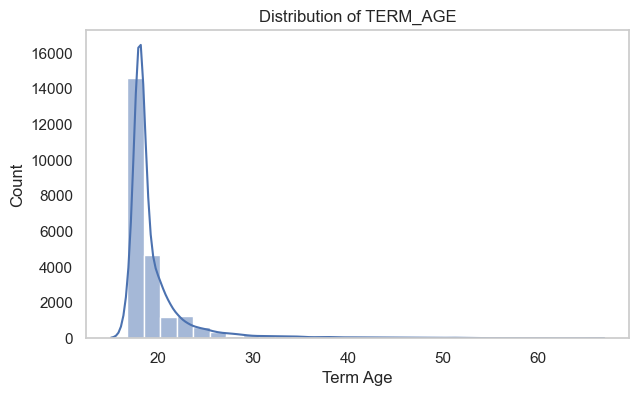

In [154]:
plt.figure(figsize=(7, 4))
sns.histplot(train_df['TERM_AGE'], bins=30, kde=True)
plt.title('Distribution of TERM_AGE')
plt.xlabel('Term Age')
plt.ylabel('Count')
plt.grid(False) #, linestyle='--', alpha=0.5)
plt.show()

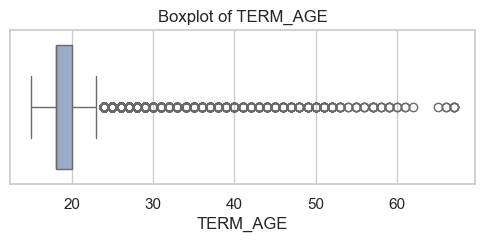

In [155]:
plt.figure(figsize=(6,2))
sns.boxplot(x=train_df["TERM_AGE"], color="#92AACE")
plt.title("Boxplot of TERM_AGE")
plt.xlabel("TERM_AGE")
plt.show()

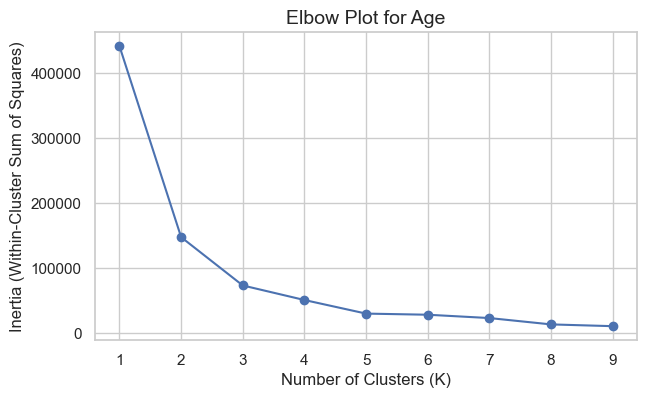

In [156]:
X = train_df[["TERM_AGE"]].dropna()
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Plot for Age", fontsize=14)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

Either 2 or 3 clusters could work for age grouping.

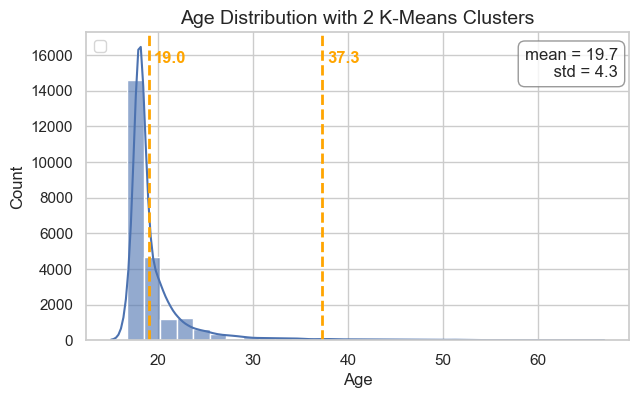

In [157]:
# Drop missing values
X = train_df[["TERM_AGE"]].dropna()

# Choose number of clusters
n_clusters = 2  

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "TERM_AGE_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(7,4))
sns.histplot(X["TERM_AGE"], bins=30, kde=True, alpha=0.6) #, color="#92AACE")

for c in centers:
    plt.axvline(c, color="orange", linestyle="--", linewidth=2)
    plt.text(c + 0.5, plt.ylim()[1]*0.9, f"{c:.1f}", color="orange", fontsize=12, weight="bold")

# Add custom annotation box
text = f"mean = {mean_val:.1f}\n std = {std_val:.1f}"
plt.text(
    0.98, 0.95,  # x, y position in axes fraction (1 = right/top edge)
    text,
    transform=plt.gca().transAxes,  # relative to axes, not data
    fontsize=12,
    ha="right", va="top",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8)
)

plt.title(f"Age Distribution with {n_clusters} K-Means Clusters", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
#plt.grid(False)
plt.legend()
plt.show()

In [158]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("TERM_AGE_CLUSTER")["TERM_AGE"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
TERM_AGE_CLUSTER,,,,
0.0,22943,15,28,18.979340
1.0,916,29,67,37.257642


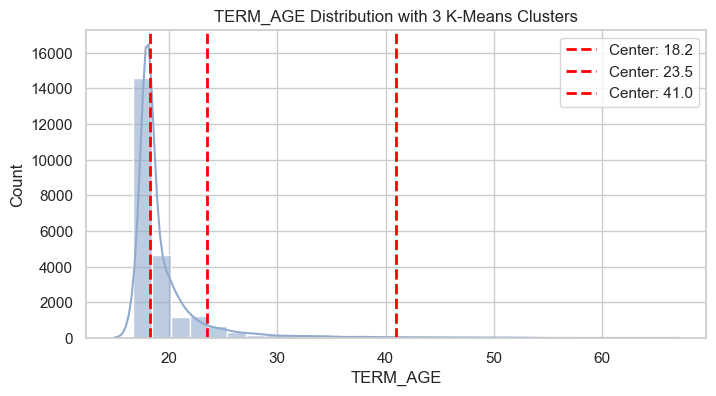

In [159]:
# Drop missing values
X = train_df[["TERM_AGE"]].dropna()

# Choose number of clusters
n_clusters = 3 

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "TERM_AGE_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(8,4))
sns.histplot(X["TERM_AGE"], bins=30, kde=True, color="#92AACE", alpha=0.6)
for c in centers:
    plt.axvline(c, color="red", linestyle="--", linewidth=2, label=f"Center: {c:.1f}")
plt.title(f"TERM_AGE Distribution with {n_clusters} K-Means Clusters")
plt.xlabel("TERM_AGE")
plt.ylabel("Count")
plt.legend()
plt.show()

In [160]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("TERM_AGE_CLUSTER")["TERM_AGE"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
TERM_AGE_CLUSTER,,,,
0.0,19364,15,20,18.246695
2.0,3899,21,32,23.548089
1.0,596,33,67,40.986577


**High-School GPA**

In [161]:
train_df["HIGH_SCHL_GPA"].describe()

# store for later
mean_val = train_df["HIGH_SCHL_GPA"].mean() 
std_val  = train_df["HIGH_SCHL_GPA"].std()

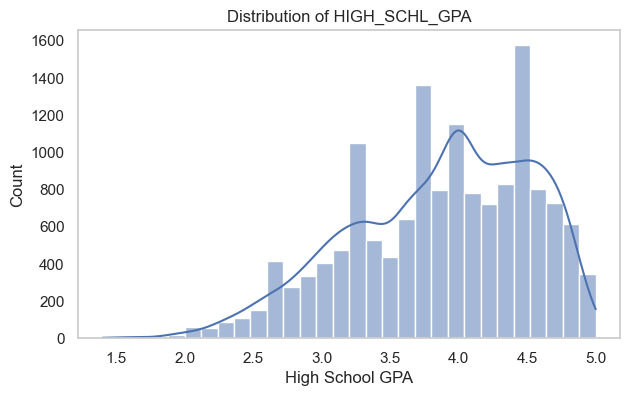

In [162]:
plt.figure(figsize=(7, 4))
sns.histplot(train_df['HIGH_SCHL_GPA'], bins=30, kde=True)
plt.title('Distribution of HIGH_SCHL_GPA')
plt.xlabel('High School GPA')
plt.ylabel('Count')
plt.grid(False) #, linestyle='--', alpha=0.5)
plt.show()

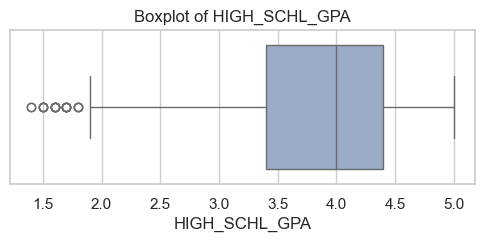

In [163]:
plt.figure(figsize=(6,2))
sns.boxplot(x=train_df["HIGH_SCHL_GPA"], color="#92AACE")
plt.title("Boxplot of HIGH_SCHL_GPA")
plt.xlabel("HIGH_SCHL_GPA")
plt.show()

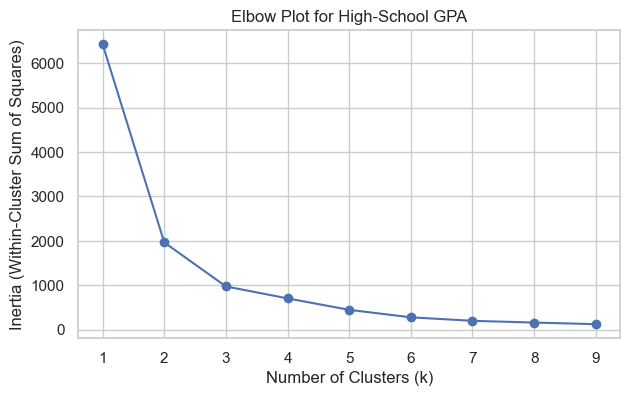

In [164]:
X = train_df[["HIGH_SCHL_GPA"]].dropna()
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Plot for High-School GPA")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

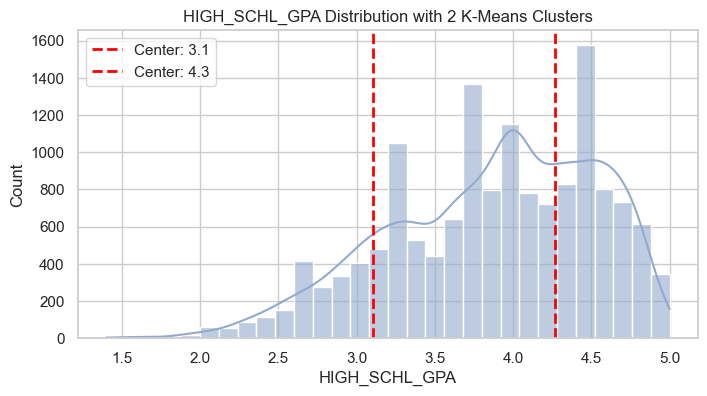

In [165]:
# Drop missing values
X = train_df[["HIGH_SCHL_GPA"]].dropna()

# Choose number of clusters
n_clusters = 2  

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "HIGH_SCHL_GPA_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(8,4))
sns.histplot(X["HIGH_SCHL_GPA"], bins=30, kde=True, color="#92AACE", alpha=0.6)
for c in centers:
    plt.axvline(c, color="red", linestyle="--", linewidth=2, label=f"Center: {c:.1f}")
plt.title(f"HIGH_SCHL_GPA Distribution with {n_clusters} K-Means Clusters")
plt.xlabel("HIGH_SCHL_GPA")
plt.ylabel("Count")
plt.legend()
plt.show()

In [166]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("HIGH_SCHL_GPA_CLUSTER")["HIGH_SCHL_GPA"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
HIGH_SCHL_GPA_CLUSTER,,,,
1.0,5070,1.4,3.6,3.107377
0.0,9718,3.7,5.0,4.264725


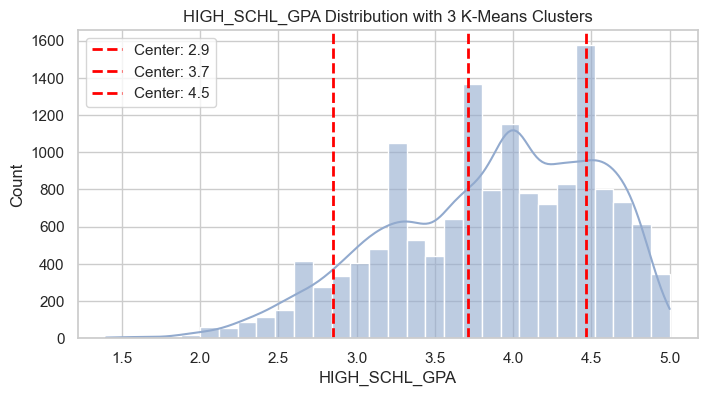

In [167]:
# Drop missing values
X = train_df[["HIGH_SCHL_GPA"]].dropna()

# Choose number of clusters
n_clusters = 3  

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "HIGH_SCHL_GPA_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(8,4))
sns.histplot(X["HIGH_SCHL_GPA"], bins=30, kde=True, color="#92AACE", alpha=0.6)
for c in centers:
    plt.axvline(c, color="red", linestyle="--", linewidth=2, label=f"Center: {c:.1f}")
plt.title(f"HIGH_SCHL_GPA Distribution with {n_clusters} K-Means Clusters")
plt.xlabel("HIGH_SCHL_GPA")
plt.ylabel("Count")
plt.legend()
plt.show()

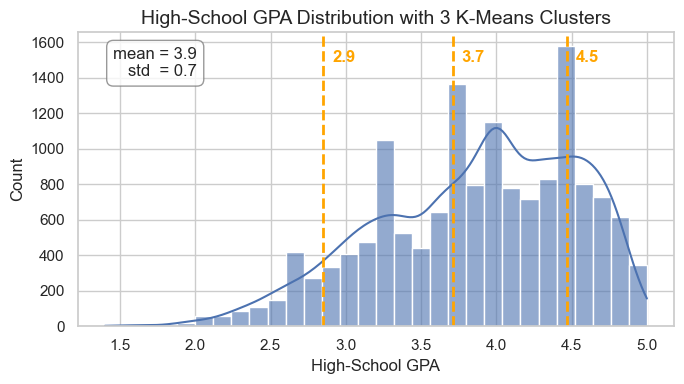

In [168]:
# --- Data (drop missing) ---
X = train_df[["HIGH_SCHL_GPA"]].dropna()

# --- K-Means (k=3) ---
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "HIGH_SCHL_GPA_CLUSTER"] = kmeans.fit_predict(X)

# Sorted centers
centers = np.sort(kmeans.cluster_centers_.flatten())

# Mean / Std (original distribution)
mean_val = X["HIGH_SCHL_GPA"].mean()
std_val  = X["HIGH_SCHL_GPA"].std()

# --- Plot ---
plt.figure(figsize=(7,4))
sns.histplot(X["HIGH_SCHL_GPA"], bins=30, kde=True, alpha=0.6)

# Cluster centers (dashed red) + numeric labels
for c in centers:
    plt.axvline(c, color="orange", linestyle="--", linewidth=2)
    # small offset to the right so the number isn't on top of the line
    plt.text(c + 0.06, plt.ylim()[1]*0.90, f"{c:.1f}",
             color="orange", fontsize=12, weight="bold")

# Custom annotation box (top-right)
text = f"mean = {mean_val:.1f}\nstd  = {std_val:.1f}"
plt.text(
    0.2, 0.95,
    text,
    transform=plt.gca().transAxes,
    fontsize=12,
    ha="right", va="top",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8)
)

plt.title(f"High-School GPA Distribution with {n_clusters} K-Means Clusters", fontsize=14)
plt.xlabel("High-School GPA", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [169]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("HIGH_SCHL_GPA_CLUSTER")["HIGH_SCHL_GPA"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
HIGH_SCHL_GPA_CLUSTER,,,,
1.0,2918,1.4,3.2,2.851097
2.0,5465,3.3,4.0,3.708930
0.0,6405,4.1,5.0,4.466854


**SAT Total Score**

In [170]:
train_df["SAT_TOTAL_BEST"].describe()

# store for later
mean_val = train_df["SAT_TOTAL_BEST"].mean() 
std_val  = train_df["SAT_TOTAL_BEST"].std()

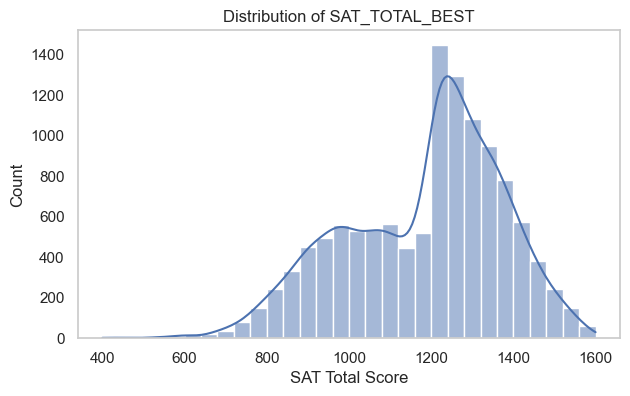

In [171]:
plt.figure(figsize=(7, 4))
sns.histplot(train_df['SAT_TOTAL_BEST'], bins=30, kde=True)
plt.title('Distribution of SAT_TOTAL_BEST')
plt.xlabel('SAT Total Score')
plt.ylabel('Count')
plt.grid(False) #, linestyle='--', alpha=0.5)
plt.show()

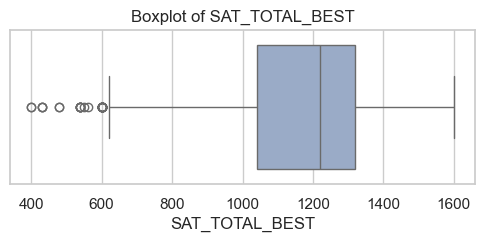

In [172]:
plt.figure(figsize=(6,2))
sns.boxplot(x=train_df["SAT_TOTAL_BEST"], color="#92AACE")
plt.title("Boxplot of SAT_TOTAL_BEST")
plt.xlabel("SAT_TOTAL_BEST")
plt.show()

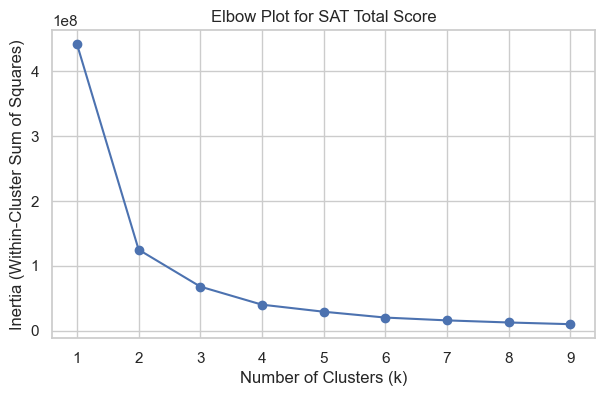

In [173]:
X = train_df[["SAT_TOTAL_BEST"]].dropna()
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Plot for SAT Total Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

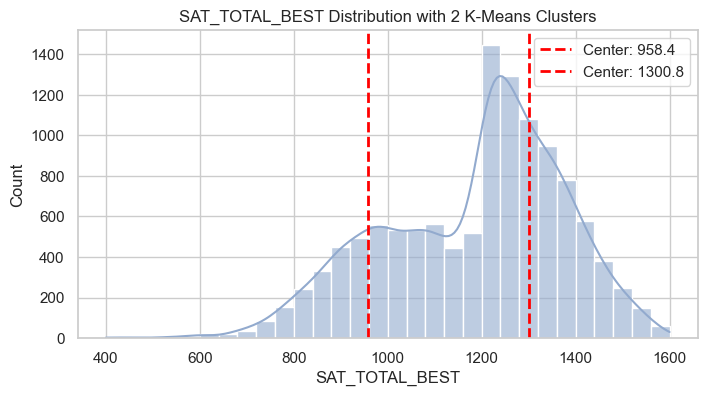

In [174]:
# Drop missing values
X = train_df[["SAT_TOTAL_BEST"]].dropna()

# Choose number of clusters
n_clusters = 2  

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "SAT_TOTAL_BEST_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(8,4))
sns.histplot(X["SAT_TOTAL_BEST"], bins=30, kde=True, color="#92AACE", alpha=0.6)
for c in centers:
    plt.axvline(c, color="red", linestyle="--", linewidth=2, label=f"Center: {c:.1f}")
plt.title(f"SAT_TOTAL_BEST Distribution with {n_clusters} K-Means Clusters")
plt.xlabel("SAT_TOTAL_BEST")
plt.ylabel("Count")
plt.legend()
plt.show()

In [175]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("SAT_TOTAL_BEST_CLUSTER")["SAT_TOTAL_BEST"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
SAT_TOTAL_BEST_CLUSTER,,,,
1.0,4126,400.0,1120.0,958.361609
0.0,7822,1130.0,1600.0,1300.793915


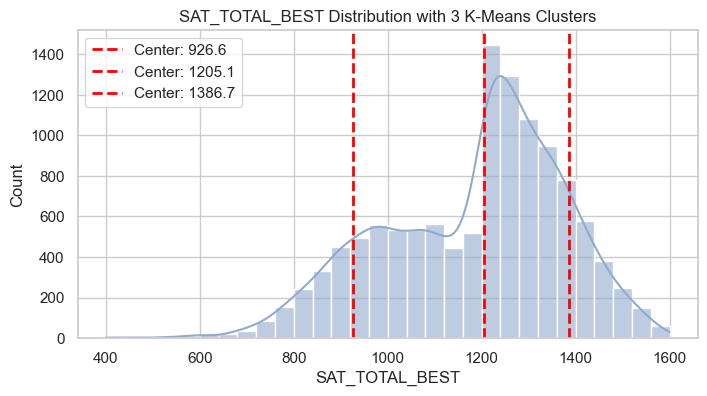

In [176]:
# Drop missing values
X = train_df[["SAT_TOTAL_BEST"]].dropna()

# Choose number of clusters
n_clusters = 3  

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "SAT_TOTAL_BEST_CLUSTER"] = kmeans.fit_predict(X)

# Sort cluster centers for plotting
centers = np.sort(kmeans.cluster_centers_.flatten())

# Plot distribution and cluster centers
plt.figure(figsize=(8,4))
sns.histplot(X["SAT_TOTAL_BEST"], bins=30, kde=True, color="#92AACE", alpha=0.6)
for c in centers:
    plt.axvline(c, color="red", linestyle="--", linewidth=2, label=f"Center: {c:.1f}")
plt.title(f"SAT_TOTAL_BEST Distribution with {n_clusters} K-Means Clusters")
plt.xlabel("SAT_TOTAL_BEST")
plt.ylabel("Count")
plt.legend()
plt.show()

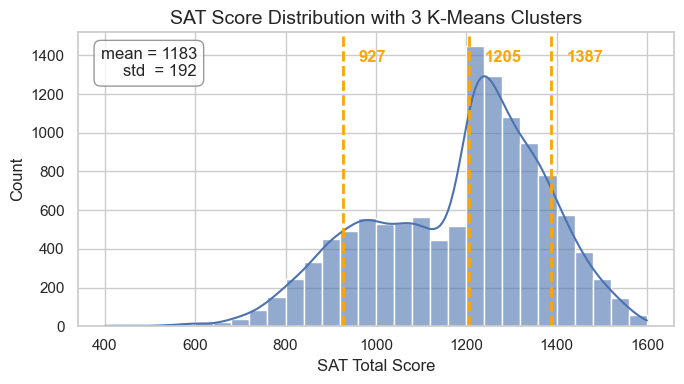

In [177]:
# --- Data (drop missing) ---
X = train_df[["SAT_TOTAL_BEST"]].dropna()

# --- K-Means (k=3) ---
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df.loc[X.index, "SAT_TOTAL_BEST_CLUSTER"] = kmeans.fit_predict(X)

# Sorted cluster centers
centers = np.sort(kmeans.cluster_centers_.flatten())

# Mean / Std (original distribution)
mean_val = X["SAT_TOTAL_BEST"].mean()
std_val  = X["SAT_TOTAL_BEST"].std()

# --- Plot ---
plt.figure(figsize=(7,4))
sns.histplot(X["SAT_TOTAL_BEST"], bins=30, kde=True, alpha=0.6)

# Cluster centers (dashed orange) + numeric labels
for c in centers:
    plt.axvline(c, color="orange", linestyle="--", linewidth=2)
    plt.text(c + 35, plt.ylim()[1]*0.9, f"{c:.0f}",  # offset adjusted for SAT scale
             color="orange", fontsize=12, weight="bold")

# Add custom annotation box (top-right)
text = f"mean = {mean_val:.0f}\nstd  = {std_val:.0f}"
plt.text(
    0.2, 0.95,
    text,
    transform=plt.gca().transAxes,
    fontsize=12,
    ha="right", va="top",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8)
)

plt.title(f"SAT Score Distribution with {n_clusters} K-Means Clusters", fontsize=14)
plt.xlabel("SAT Total Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [178]:
cluster_summary = (
    train_df.loc[X.index]
    .groupby("SAT_TOTAL_BEST_CLUSTER")["SAT_TOTAL_BEST"]
    .agg(["count", "min", "max", "mean"])
    .sort_values("mean")
)

cluster_summary

,count,min,max,mean
SAT_TOTAL_BEST_CLUSTER,,,,
1.0,3345,400.0,1060.0,926.571001
2.0,4955,1070.0,1290.0,1205.071645
0.0,3648,1300.0,1600.0,1386.650219


In [179]:
# Features and chosen number of clusters
cluster_config = {
    "TERM_AGE": 2,
    "HIGH_SCHL_GPA": 3,
    "SAT_TOTAL_BEST": 3
}

# Dictionary to store fitted KMeans models
kmeans_models = {}

# Apply to training data
for feature, k in cluster_config.items():
    print(f"Fitting KMeans for {feature} with k={k}")
    
    # Drop missing values
    X_train = train_df[[feature]].dropna()
    
    # Fit model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    kmeans_models[feature] = kmeans
    
    # Assign clusters to train set (aligning indices)
    train_df.loc[X_train.index, f"{feature}_CLUSTER"] = kmeans.predict(X_train)

# Apply to test data using trained models
for feature, kmeans in kmeans_models.items():
    X_test = test_df[[feature]].dropna()
    test_df.loc[X_test.index, f"{feature}_CLUSTER"] = kmeans.predict(X_test)

# Convert cluster labels to integers
train_df[[f"{f}_CLUSTER" for f in cluster_config.keys()]] = \
    train_df[[f"{f}_CLUSTER" for f in cluster_config.keys()]].astype("Int64")

test_df[[f"{f}_CLUSTER" for f in cluster_config.keys()]] = \
    test_df[[f"{f}_CLUSTER" for f in cluster_config.keys()]].astype("Int64")

for df in [train_df, test_df]:
    for feature in cluster_config.keys():
        col = f"{feature}_CLUSTER"
        df[col] = df[col].fillna(-1).astype(int)

Fitting KMeans for TERM_AGE with k=2
Fitting KMeans for HIGH_SCHL_GPA with k=3
Fitting KMeans for SAT_TOTAL_BEST with k=3


In [180]:
feat_list = ["TERM_AGE", "HIGH_SCHL_GPA", "SAT_TOTAL_BEST"]

# Inspect cluster centers learned on TRAIN
for f in feat_list:
    centers = np.sort(kmeans_models[f].cluster_centers_.ravel())
    print(f"{f} centers:", np.round(centers, 3))

# Class balance in train and test
for f in feat_list:
    for split_name, df in [("TRAIN", train_df), ("TEST", test_df)]:
        vc = df[f"{f}_CLUSTER"].value_counts(dropna=False).sort_index()
        print(f"\n{split_name} {f}_CLUSTER counts:\n{vc}\n")

# Ranges per cluster
def cluster_ranges(df, f):
    return (
        df[[f, f"{f}_CLUSTER"]]
        .dropna(subset=[f])
        .groupby(f"{f}_CLUSTER")[f]
        .agg(["count","min","max","mean","median"])
        .sort_index()
    )

for f in feat_list:
    print(f"\nTRAIN {f} by cluster:\n", cluster_ranges(train_df, f))
    print(f"\nTEST  {f} by cluster:\n", cluster_ranges(test_df, f))

TERM_AGE centers: [18.979 37.258]
HIGH_SCHL_GPA centers: [2.851 3.709 4.467]
SAT_TOTAL_BEST centers: [ 926.571 1205.072 1386.65 ]

TRAIN TERM_AGE_CLUSTER counts:
TERM_AGE_CLUSTER
0    22943
1      916
Name: count, dtype: int64


TEST TERM_AGE_CLUSTER counts:
TERM_AGE_CLUSTER
0    5730
1     235
Name: count, dtype: int64


TRAIN HIGH_SCHL_GPA_CLUSTER counts:
HIGH_SCHL_GPA_CLUSTER
-1    9071
 0    6405
 1    2918
 2    5465
Name: count, dtype: int64


TEST HIGH_SCHL_GPA_CLUSTER counts:
HIGH_SCHL_GPA_CLUSTER
-1    2192
 0    1638
 1     733
 2    1402
Name: count, dtype: int64


TRAIN SAT_TOTAL_BEST_CLUSTER counts:
SAT_TOTAL_BEST_CLUSTER
-1    11911
 0     3648
 1     3345
 2     4955
Name: count, dtype: int64


TEST SAT_TOTAL_BEST_CLUSTER counts:
SAT_TOTAL_BEST_CLUSTER
-1    2945
 0     899
 1     854
 2    1267
Name: count, dtype: int64


TRAIN TERM_AGE by cluster:
                   count  min  max       mean  median
TERM_AGE_CLUSTER                                    
0               

#### 4.2.2. One-Hot Encoding

In [181]:
# Data types of each column
train_df.dtypes

# test_df.dtypes

STUDENT_GENDER                object
TERM_AGE                       int64
HIGH_SCHL_GPA                float64
STUDENT_ADMIT_TYPE            object
HIGH_SCHL_GPA_MISSING          int64
SAT_TOTAL_BEST               float64
SAT_TOTAL_BEST_MISSING         int64
INTENDED_COLLEGE              object
CONTINENT_OF_BIRTH            object
ETHNICITY_GROUPED             object
EDUCATION_GROUPED             object
US_MILITARY_STATUS_BINARY      int64
FL_RESY_BINARY                 int64
ADMITTED                       int64
TERM_AGE_CLUSTER               int64
HIGH_SCHL_GPA_CLUSTER          int64
SAT_TOTAL_BEST_CLUSTER         int64
dtype: object

In [182]:
test_df.dtypes

STUDENT_GENDER                object
TERM_AGE                       int64
HIGH_SCHL_GPA                float64
STUDENT_ADMIT_TYPE            object
HIGH_SCHL_GPA_MISSING          int64
SAT_TOTAL_BEST               float64
SAT_TOTAL_BEST_MISSING         int64
INTENDED_COLLEGE              object
CONTINENT_OF_BIRTH            object
ETHNICITY_GROUPED             object
EDUCATION_GROUPED             object
US_MILITARY_STATUS_BINARY      int64
FL_RESY_BINARY                 int64
ADMITTED                       int64
TERM_AGE_CLUSTER               int64
HIGH_SCHL_GPA_CLUSTER          int64
SAT_TOTAL_BEST_CLUSTER         int64
dtype: object

**Columns for Modeling**

In [183]:
cluster_cols = [
    "TERM_AGE_CLUSTER",
    "HIGH_SCHL_GPA_CLUSTER",
    "SAT_TOTAL_BEST_CLUSTER"
]

cat_cols = [
    "STUDENT_GENDER",
    "STUDENT_ADMIT_TYPE",
    "INTENDED_COLLEGE",
    "CONTINENT_OF_BIRTH",
    "ETHNICITY_GROUPED",
    "EDUCATION_GROUPED"
]

binary_cols = [
    "HIGH_SCHL_GPA_MISSING",
    "SAT_TOTAL_BEST_MISSING",
    "US_MILITARY_STATUS_BINARY",
    "FL_RESY_BINARY"
]

**One-Hot Encoding - Clusters and Categorical Columns**

In [184]:
# Fit encoder on training categorical + cluster columns
encode_cols = cat_cols + cluster_cols

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype=int)
ohe.fit(train_df[encode_cols])

# Transform both train/test datasets
train_ohe = pd.DataFrame(
    ohe.transform(train_df[encode_cols]),
    columns=ohe.get_feature_names_out(encode_cols),
    index=train_df.index
)

test_ohe = pd.DataFrame(
    ohe.transform(test_df[encode_cols]),
    columns=ohe.get_feature_names_out(encode_cols),
    index=test_df.index
)

# Combine with binary features (no need to encode)
X_train = pd.concat([train_ohe, train_df[binary_cols]], axis=1)
X_test = pd.concat([test_ohe, test_df[binary_cols]], axis=1)

In [185]:
X_train.dtypes

STUDENT_GENDER_Female                                int64
STUDENT_GENDER_Male                                  int64
STUDENT_ADMIT_TYPE_CC Transfer                       int64
STUDENT_ADMIT_TYPE_FTIC                              int64
STUDENT_ADMIT_TYPE_Other Transfer                    int64
STUDENT_ADMIT_TYPE_Second Bachelors                  int64
STUDENT_ADMIT_TYPE_Undergraduate Non FTIC            int64
INTENDED_COLLEGE_Arts & Communication                int64
INTENDED_COLLEGE_Arts, Sciences & Education          int64
INTENDED_COLLEGE_Business                            int64
INTENDED_COLLEGE_Engineering & Computing             int64
INTENDED_COLLEGE_Hospitality & Tourism Management    int64
INTENDED_COLLEGE_Missing/Unknown                     int64
INTENDED_COLLEGE_Nursing & Health Sciences           int64
INTENDED_COLLEGE_Public Affairs                      int64
CONTINENT_OF_BIRTH_Africa                            int64
CONTINENT_OF_BIRTH_Asia                              int

**Reference Mapping from Clusters**
- Age: 2 groups found in clustering (Traditional vs. Non-traditional)
- GPA: 3 groups found in clustering + Missing (-1)
- SAT: 3 groups found in clustering + Missing (-1)

| Term Age Cluster | Label |
|---------------|--------|
| `0` | Younger Applicants (15-28)|
| `1` | Older Applicants (59-67)|


| High-School GPA Cluster | Label |
|---------------|--------|
| `-1` | High-School GPA Missing |
| `1` | Low High-School GPA (1.4-3.2)|
| `2` | Mid High-School GPA (3.3-4.0)|
| `0` | High High-School GPA (4.1-5.0)|


| SAT Total Score Cluster | Label |
|---------------|--------|
| `-1` | SAT Total Score Missing |
| `1` | Low SAT Total Score (400-1060)|
| `2` | Mid SAT Total Score (1070-1290)|
| `0` | High SAT Total Score (1300-1600)|


**Store Target Varaible**

In [186]:
# Target
y_train = train_df["ADMITTED"]
y_test = test_df["ADMITTED"]

### 4.3. Compare Performance of Multiple Models

We will be looking at 7 different ML models: Decision Tree, Random Forest, Logistic Regression, SVM, Gradient Boosting, and a rule-based model (RuleFit).

**Experiment Setup:**
- 80/20 train-test split
- Clustering-based discretization for age, high-school GPA, and SAT total score
- One-hot encoding for catergorical and clustered variables
- Cross-validation for hyperparameter tuning (StratifiedKFold)
- Re-train model with best hyperparameters found through cross-validation
- Test on unseet data (test dataset, with same clusters and one-hot encoding)

In [187]:
RANDOM_STATE = 42

#### 4.3.1. Decision Trees

In [188]:
# Exclude these columns for Decision Trees since information
# is already present in the -1 clustering label
exclude_cols = ["SAT_TOTAL_BEST_MISSING", "HIGH_SCHL_GPA_MISSING"]

# Create a reduced feature set for tree-based models
X_train_tree = X_train.drop(columns=exclude_cols, errors="ignore")
X_test_tree  = X_test.drop(columns=exclude_cols, errors="ignore")

In [189]:
# Estimator
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced"  # helpful if classes are imbalanced
)

# Hyperparameter grid
param_grid_dt = {
    "max_depth": [3, 5, 8, 12, None],
    "min_samples_split": [2, 10, 50, 100],
    "min_samples_leaf": [1, 5, 10, 25],
    "criterion": ["gini", "entropy", "log_loss"],  # log_loss = deviance
    "max_features": [None, "sqrt", "log2"]         # often improves generalization
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Multi-metric grid search; refit based on the best roc_auc
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=cv,
    scoring={
        "roc_auc": "roc_auc",
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall"},
    refit="roc_auc",
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

# Fit
grid_dt.fit(X_train_tree, y_train)

# CV summary
best_idx = grid_dt.best_index_
print("Best params:", grid_dt.best_params_)
print("CV ROC-AUC:", grid_dt.cv_results_["mean_test_roc_auc"][best_idx])
print("CV F1:     ", grid_dt.cv_results_["mean_test_f1"][best_idx])
print("CV Acc:    ", grid_dt.cv_results_["mean_test_accuracy"][best_idx])
print("CV Prec:   ", grid_dt.cv_results_["mean_test_precision"][best_idx])
print("CV Recall: ", grid_dt.cv_results_["mean_test_recall"][best_idx])

Best params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 100}
CV ROC-AUC: 0.9710400732518373
CV F1:      0.9149292191317866
CV Acc:     0.9162578272649281
CV Prec:    0.8905191768203021
CV Recall:  0.9407229054175753


**Evaluate on Test Set**

In [190]:
# Evaluate on test set
best_dt = grid_dt.best_estimator_
y_proba_dt = best_dt.predict_proba(X_test_tree)[:, 1]
y_pred_dt  = best_dt.predict(X_test_tree)

print("\nTest set metrics (Decision Tree):")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))
print("F1:",      f1_score(y_test, y_pred_dt))
print("Accuracy:",accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_dt))
print("\nClassification report:\n", classification_report(y_test, y_pred_dt, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_dt))


Test set metrics (Decision Tree):
ROC-AUC: 0.9681836457729149
F1: 0.9127266564988985
Accuracy: 0.9136630343671417
Balanced Accuracy:  0.9148763099655932

Classification report:
               precision    recall  f1-score   support

           0      0.945     0.886     0.915      3110
           1      0.884     0.943     0.913      2855

    accuracy                          0.914      5965
   macro avg      0.914     0.915     0.914      5965
weighted avg      0.916     0.914     0.914      5965

Confusion matrix:
 [[2757  353]
 [ 162 2693]]


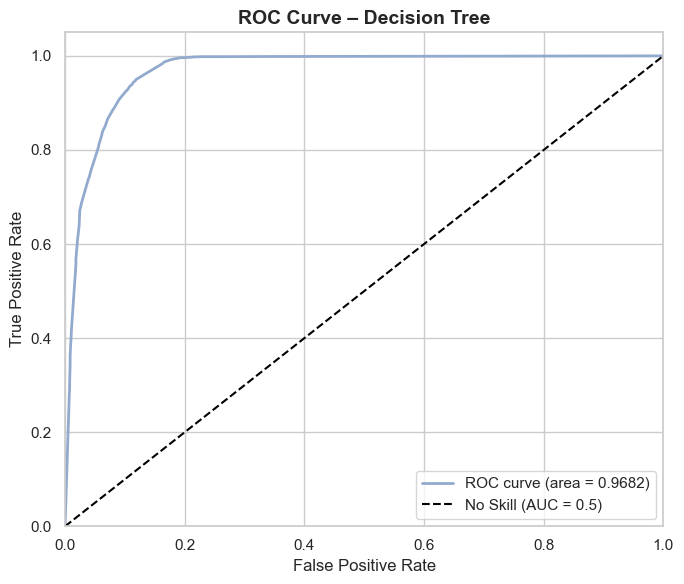

In [191]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")

plt.plot(fpr, tpr, color="#92AACE", lw=2,
         label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--", label="No Skill (AUC = 0.5)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve – Decision Tree", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Feature Importance**

In [192]:
importances = best_dt.feature_importances_
features = X_train_tree.columns  # encoded feature names

fi_df = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values("Importance", ascending=False)
    .head(15)
)

print("\nTop 15 Feature Importances:\n", fi_df)


Top 15 Feature Importances:
                                        Feature  Importance
3                      STUDENT_ADMIT_TYPE_FTIC    0.303649
36                     HIGH_SCHL_GPA_CLUSTER_0    0.230165
38                     HIGH_SCHL_GPA_CLUSTER_2    0.156575
39                   SAT_TOTAL_BEST_CLUSTER_-1    0.098625
41                    SAT_TOTAL_BEST_CLUSTER_1    0.087872
4            STUDENT_ADMIT_TYPE_Other Transfer    0.042567
13  INTENDED_COLLEGE_Nursing & Health Sciences    0.034669
30       EDUCATION_GROUPED_Bachelors or Higher    0.011169
42                    SAT_TOTAL_BEST_CLUSTER_2    0.008435
29          EDUCATION_GROUPED_Associate Degree    0.006853
31        EDUCATION_GROUPED_High School or GED    0.004201
2               STUDENT_ADMIT_TYPE_CC Transfer    0.002923
26         ETHNICITY_GROUPED_Nonresident Alien    0.002841
40                    SAT_TOTAL_BEST_CLUSTER_0    0.002409
44                              FL_RESY_BINARY    0.002401


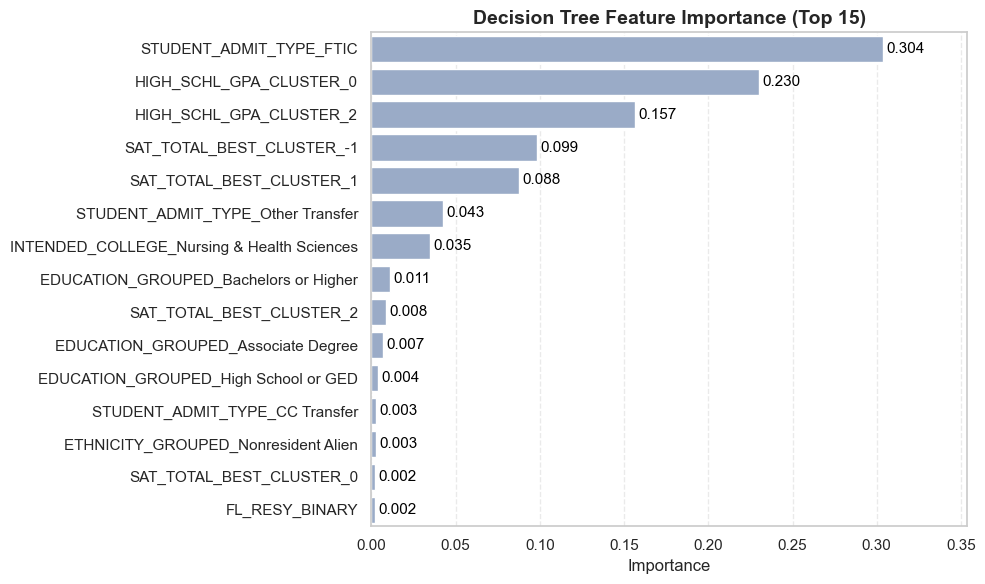

In [193]:
# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=fi_df,
    x="Importance",
    y="Feature",
    color="#92AACE"
)

# Add value labels 
for i, value in enumerate(fi_df["Importance"]):
    plt.text(
        value + 0.002,
        i,
        f"{value:.3f}",
        va="center",
        fontsize=11,
        color="black"
    )

# Titles and formatting
plt.title("Decision Tree Feature Importance (Top 15)", fontsize=14, weight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("")
plt.xlim(0, fi_df["Importance"].max() + 0.05)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### 4.3.2. Random Forest

Note: We are keeping the reduced feature set from Decision Trees too. We excluded the SAT_TOTAL_BEST_MISSING and HIGH_SCHL_GPA_MISSING because those are already accounted for in the -1 cluster labels (one-hot encoding columns present).

In [194]:
# Estimator
rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced_subsample",
    n_jobs=-1
)

# Hyperparameter grid
param_grid_rf = {
    "n_estimators": [300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2", None]   # allow None to use all features
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Multi-metric grid search; refit based on the best roc_auc
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring={
        "roc_auc": "roc_auc",
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall"},
    refit="roc_auc",
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

# Fit
grid_rf.fit(X_train_tree, y_train)

# CV summary
best_idx = grid_rf.best_index_
print("Best params:", grid_rf.best_params_)
print("CV ROC-AUC:", grid_rf.cv_results_["mean_test_roc_auc"][best_idx])
print("CV F1:     ", grid_rf.cv_results_["mean_test_f1"][best_idx])
print("CV Acc:    ", grid_rf.cv_results_["mean_test_accuracy"][best_idx])
print("CV Prec:   ", grid_rf.cv_results_["mean_test_precision"][best_idx])
print("CV Recall: ", grid_rf.cv_results_["mean_test_recall"][best_idx])

Best params: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 500}
CV ROC-AUC: 0.9720383098158261
CV F1:      0.9154195130045986
CV Acc:     0.9166769738868334
CV Prec:    0.8903622209886587
CV Recall:  0.9419485566034481


**Evaluate on Test Set**

In [195]:
# Evaluate on test set
best_rf = grid_rf.best_estimator_
y_proba_rf = best_rf.predict_proba(X_test_tree)[:, 1]
y_pred_rf  = best_rf.predict(X_test_tree)

print("\nTest set metrics (Random Forest):")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("F1:",      f1_score(y_test, y_pred_rf))
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))


Test set metrics (Random Forest):
ROC-AUC: 0.9693534218187756
F1: 0.9139949109414758
Accuracy: 0.9150041911148366
Balanced Accuracy:  0.916176843243365

Classification report:
               precision    recall  f1-score   support

           0      0.945     0.889     0.916      3110
           1      0.886     0.944     0.914      2855

    accuracy                          0.915      5965
   macro avg      0.916     0.916     0.915      5965
weighted avg      0.917     0.915     0.915      5965

Confusion matrix:
 [[2764  346]
 [ 161 2694]]


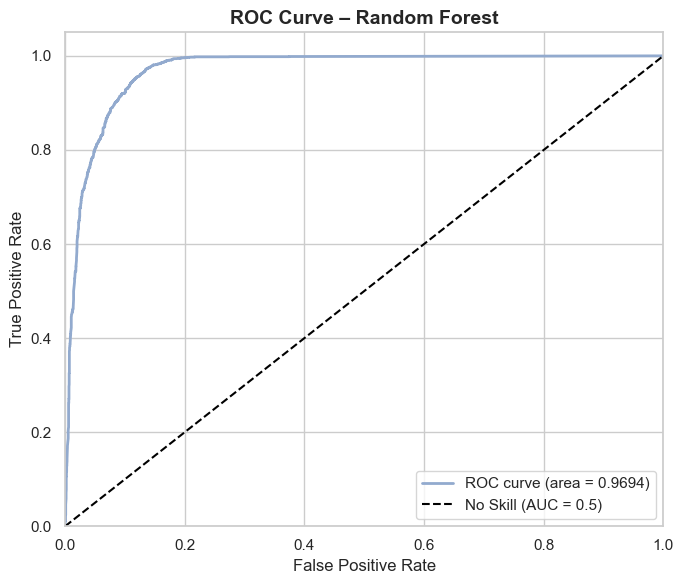

In [196]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")

plt.plot(fpr, tpr, color="#92AACE", lw=2,
         label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--", label="No Skill (AUC = 0.5)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve – Random Forest", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Feature Importance**

In [197]:
importances = best_rf.feature_importances_
features = X_train_tree.columns  # encoded feature names

fi_df = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values("Importance", ascending=False)
    .head(15)
)

print("\nTop 15 Feature Importances:\n", fi_df)


Top 15 Feature Importances:
                                        Feature  Importance
3                      STUDENT_ADMIT_TYPE_FTIC    0.336808
36                     HIGH_SCHL_GPA_CLUSTER_0    0.251043
38                     HIGH_SCHL_GPA_CLUSTER_2    0.087787
39                   SAT_TOTAL_BEST_CLUSTER_-1    0.079713
41                    SAT_TOTAL_BEST_CLUSTER_1    0.076863
4            STUDENT_ADMIT_TYPE_Other Transfer    0.041591
35                    HIGH_SCHL_GPA_CLUSTER_-1    0.028589
13  INTENDED_COLLEGE_Nursing & Health Sciences    0.028520
42                    SAT_TOTAL_BEST_CLUSTER_2    0.010200
40                    SAT_TOTAL_BEST_CLUSTER_0    0.009291
30       EDUCATION_GROUPED_Bachelors or Higher    0.006957
31        EDUCATION_GROUPED_High School or GED    0.004771
29          EDUCATION_GROUPED_Associate Degree    0.003972
44                              FL_RESY_BINARY    0.003450
37                     HIGH_SCHL_GPA_CLUSTER_1    0.003124


In [198]:
# importances = best_rf.feature_importances_
# features = X_train_tree.columns  # encoded feature names

# fi_df = (
#     pd.DataFrame({"Feature": features, "Importance": importances})
#     .sort_values("Importance", ascending=False)
#     #.head(15)
# )

# print("\nFeature Importances:\n", fi_df)

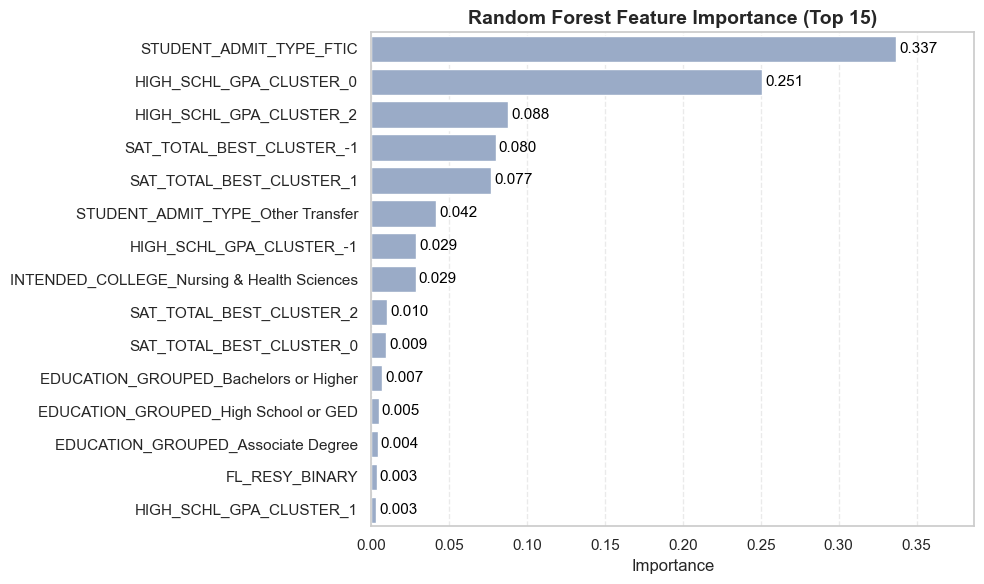

In [199]:
# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=fi_df,
    x="Importance",
    y="Feature",
    color="#92AACE"
)

# Add value labels 
for i, value in enumerate(fi_df["Importance"]):
    plt.text(
        value + 0.002,
        i,
        f"{value:.3f}",
        va="center",
        fontsize=11,
        color="black"
    )

# Titles and formatting
plt.title("Random Forest Feature Importance (Top 15)", fontsize=14, weight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("")
plt.xlim(0, fi_df["Importance"].max() + 0.05)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### 4.3.3. Logistic Regression

For logistic regression, we can keep the SAT_TOTAL_BEST_MISSING, HIGH_SCHL_GPA_MISSING flags. Also, for hyper-parameter tunning, we make sure to do some additional configuration so that the gridsearch can only try combinations that are supported by each other. 
Reference: GeeksforGeeks, July 2025 (https://www.geeksforgeeks.org/machine-learning/how-to-optimize-logistic-regression-performance/)

In [200]:
lr = LogisticRegression(
    random_state=RANDOM_STATE,
    class_weight="balanced",
    max_iter=1000
    # n_jobs is only respected by 'liblinear' and 'saga'; we omit to avoid warnings
)

# Valid solver/penalty combinations
param_grid_lr = [
    # L2: several solvers suport it
    {"penalty": ["l2"],
     "C": np.logspace(-3, 3, 10),
     "solver": ["lbfgs", "newton-cg", "sag", "saga"]},

    # L1: only saga supports it
    {"penalty": ["l1"],
     "C": np.logspace(-3, 3, 10),
     "solver": ["saga"]},

    # No regularization: no C, solvers that support 'none'
    {"penalty": ["none"],
     "solver": ["lbfgs", "newton-cg", "sag"]}
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=cv,
    scoring={
        "roc_auc": "roc_auc",
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall"},
    refit="roc_auc",
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

grid_lr.fit(X_train, y_train)

best_idx = grid_lr.best_index_
print("Best params:", grid_lr.best_params_)
print("CV ROC-AUC:", grid_lr.cv_results_["mean_test_roc_auc"][best_idx])
print("CV F1:     ", grid_lr.cv_results_["mean_test_f1"][best_idx])
print("CV Acc:    ", grid_lr.cv_results_["mean_test_accuracy"][best_idx])
print("CV Prec:   ", grid_lr.cv_results_["mean_test_precision"][best_idx])
print("CV Recall: ", grid_lr.cv_results_["mean_test_recall"][best_idx])

Best params: {'C': np.float64(1000.0), 'penalty': 'l2', 'solver': 'sag'}
CV ROC-AUC: 0.9596905435942992
CV F1:      0.9105953600450839
CV Acc:     0.9116055931661725
CV Prec:    0.8826468524465015
CV Recall:  0.9403727576864267


**Evaluate on Test Set**

In [201]:
best_lr = grid_lr.best_estimator_
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr  = best_lr.predict(X_test)

print("\nTest set metrics (Logistic Regression):")
print("ROC-AUC:           ", roc_auc_score(y_test, y_proba_lr))
print("Accuracy:          ", accuracy_score(y_test, y_pred_lr))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_lr))
print("F1:                ", f1_score(y_test, y_pred_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


Test set metrics (Logistic Regression):
ROC-AUC:            0.9563001672476222
Accuracy:           0.91081307627829
Balanced Accuracy:  0.9121288313502007
F1:                 0.9100743745774171

Classification report:
               precision    recall  f1-score   support

           0      0.944     0.881     0.912      3110
           1      0.879     0.943     0.910      2855

    accuracy                          0.911      5965
   macro avg      0.912     0.912     0.911      5965
weighted avg      0.913     0.911     0.911      5965

Confusion matrix:
 [[2741  369]
 [ 163 2692]]


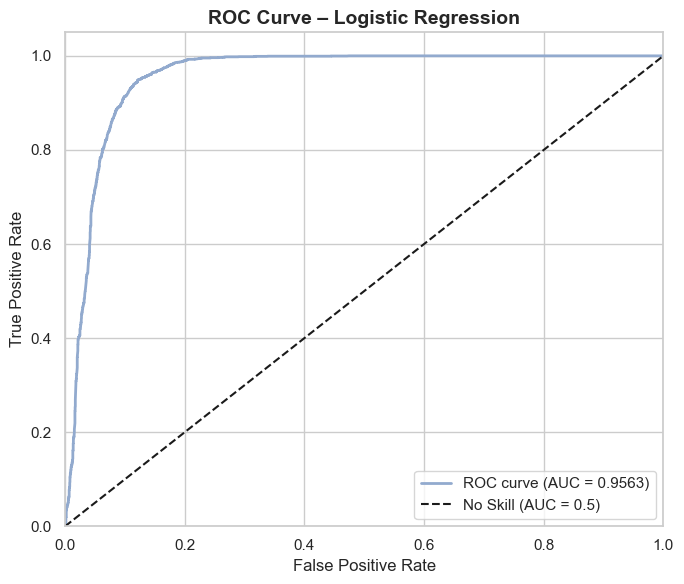

In [202]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color="#92AACE", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--", label="No Skill (AUC = 0.5)")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Feature Importance**

In [203]:
# Coefficient table (direction and strength)
coef = pd.Series(best_lr.coef_[0], index=X_train.columns)
coef_abs = coef.abs().sort_values(ascending=False)

print("\nTop 15 coefficients by absolute value:")
coef_df = pd.DataFrame({
    "Feature": coef_abs.index[:15],
    "Coeff": coef.loc[coef_abs.index[:15]].values,
    "AbsCoeff": coef_abs.values[:15]
})
print(coef_df)


Top 15 coefficients by absolute value:
                                       Feature     Coeff  AbsCoeff
0          STUDENT_ADMIT_TYPE_Second Bachelors  6.593432  6.593432
1                      STUDENT_ADMIT_TYPE_FTIC -5.761761  5.761761
2        EDUCATION_GROUPED_Bachelors or Higher -4.564956  4.564956
3                     SAT_TOTAL_BEST_CLUSTER_0  2.849014  2.849014
4                  EDUCATION_GROUPED_No Degree  2.667395  2.667395
5    STUDENT_ADMIT_TYPE_Undergraduate Non FTIC  2.257106  2.257106
6           EDUCATION_GROUPED_Associate Degree  2.140973  2.140973
7                     SAT_TOTAL_BEST_CLUSTER_1 -2.078341  2.078341
8                      HIGH_SCHL_GPA_CLUSTER_0  2.025611  2.025611
9   INTENDED_COLLEGE_Nursing & Health Sciences -1.587900  1.587900
10           STUDENT_ADMIT_TYPE_Other Transfer -1.557021  1.557021
11                    SAT_TOTAL_BEST_CLUSTER_2  1.545844  1.545844
12                   SAT_TOTAL_BEST_CLUSTER_-1 -1.116650  1.116650
13                    

In [204]:
# # Coefficient table (direction and strength)
# coef = pd.Series(best_lr.coef_[0], index=X_train.columns)
# coef_abs = coef.abs().sort_values(ascending=False)

# print("\nCoefficients by absolute value:")
# coef_df = pd.DataFrame({
#     "Feature": coef_abs.index[:],
#     "Coeff": coef.loc[coef_abs.index[:]].values,
#     "AbsCoeff": coef_abs.values[:]
# })
# print(coef_df)

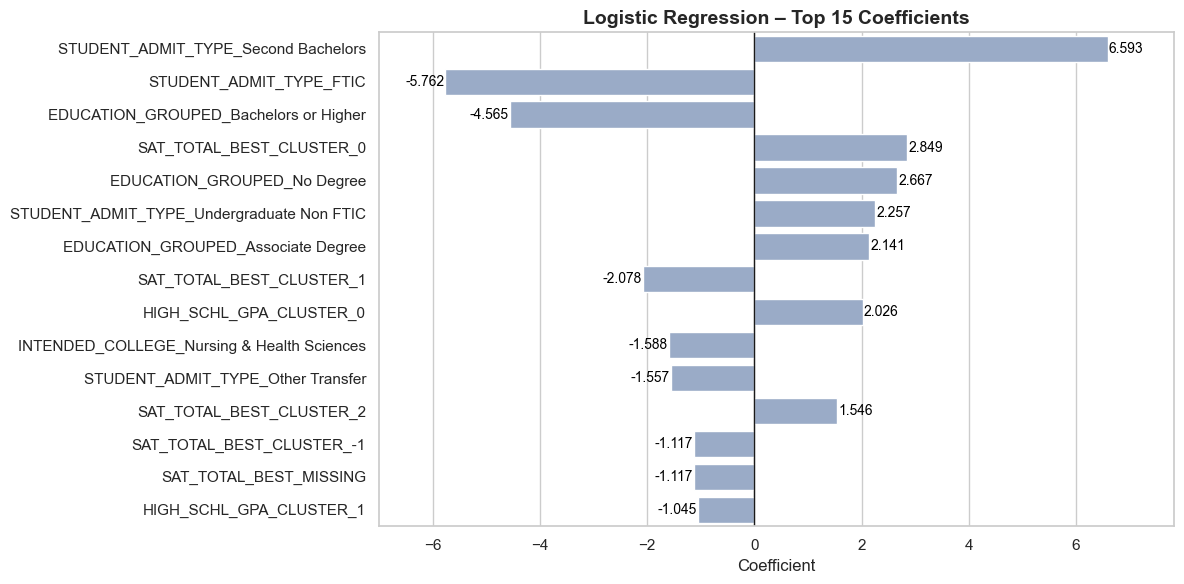

In [205]:
# Barplot of signed coefficients
plt.figure(figsize=(12,6))  # a bit wider for longer labels
sns.set_style("whitegrid")

sns.barplot(data=coef_df, x="Coeff", y="Feature", color="#92AACE")

# Add coefficient values next to bars
for i, v in enumerate(coef_df["Coeff"]):
    plt.text(
        v + (0.02 if v >= 0 else -0.02),  # offset right for positive, left for negative
        i,
        f"{v:.3f}",
        va="center",
        ha="left" if v >= 0 else "right",  # align text based on bar direction
        fontsize=10,
        color="black"
    )

# Dynamic x-limits so labels fit
x_min, x_max = coef_df["Coeff"].min(), coef_df["Coeff"].max()
x_range = x_max - x_min
pad = 0.1 * x_range  # 15% of range padding
plt.xlim(x_min - pad, x_max + pad)

# Title and formatting
plt.title("Logistic Regression – Top 15 Coefficients", fontsize=14, weight="bold")
plt.xlabel("Coefficient", fontsize=12)
plt.ylabel("")
plt.axvline(0, color="k", lw=1)
plt.tight_layout()
plt.show()

#### 4.3.4. Gaussian Naïve Bayes

For this model, we are also keeping the SAT_TOTAL_BEST_MISSING, HIGH_SCHL_GPA_MISSING flags. The application is simpler because we do not need hyper-parameter tuning. 

In [206]:
# Cross-validation (GaussianNB)
gnb = GaussianNB()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
}

cv_res = cross_validate(
    gnb, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

print("CV (GaussianNB)")
print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.3f} ± {cv_res['test_roc_auc'].std():.3f}")
print(f"F1:      {cv_res['test_f1'].mean():.3f} ± {cv_res['test_f1'].std():.3f}")
print(f"Acc:     {cv_res['test_accuracy'].mean():.3f} ± {cv_res['test_accuracy'].std():.3f}")
print(f"Prec:    {cv_res['test_precision'].mean():.3f} ± {cv_res['test_precision'].std():.3f}")
print(f"Recall:  {cv_res['test_recall'].mean():.3f} ± {cv_res['test_recall'].std():.3f}")

# Fit on full train set
gnb.fit(X_train, y_train)

CV (GaussianNB)
ROC-AUC: 0.921 ± 0.003
F1:      0.861 ± 0.004
Acc:     0.866 ± 0.004
Prec:    0.859 ± 0.005
Recall:  0.863 ± 0.010


,priors,None
,var_smoothing,1e-09


**Evaluate on Test Set**

In [207]:
y_proba_gnb = gnb.predict_proba(X_test)[:, 1]
y_pred_gnb  = gnb.predict(X_test)

print("\nTest set metrics (GaussianNB):")
print("ROC-AUC:           ", roc_auc_score(y_test, y_proba_gnb))
print("Accuracy:          ", accuracy_score(y_test, y_pred_gnb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_gnb))
print("F1:                ", f1_score(y_test, y_pred_gnb))
print("\nClassification report:\n", classification_report(y_test, y_pred_gnb, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gnb))


Test set metrics (GaussianNB):
ROC-AUC:            0.9252378351287581
Accuracy:           0.8694048616932104
Balanced Accuracy:  0.8693883354638166
F1:                 0.8643093537711201

Classification report:
               precision    recall  f1-score   support

           0      0.879     0.870     0.874      3110
           1      0.860     0.869     0.864      2855

    accuracy                          0.869      5965
   macro avg      0.869     0.869     0.869      5965
weighted avg      0.870     0.869     0.869      5965

Confusion matrix:
 [[2705  405]
 [ 374 2481]]


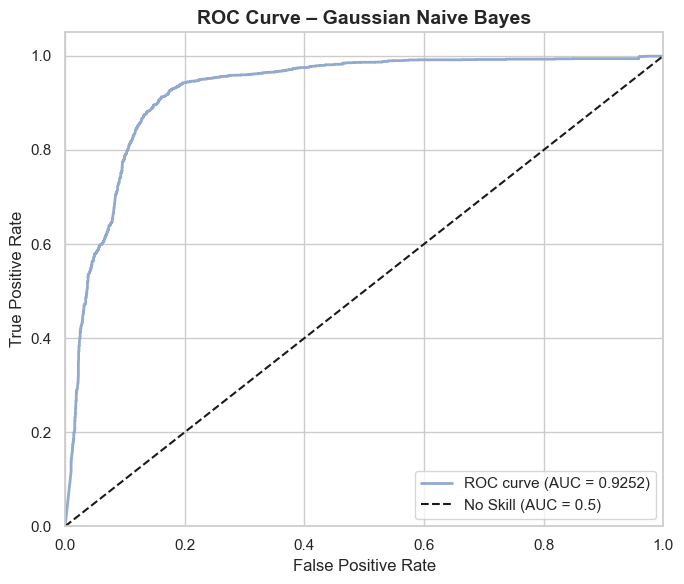

In [208]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_gnb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color="#92AACE", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--", label="No Skill (AUC = 0.5)")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Gaussian Naive Bayes", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### 4.3.5. Bernoulli Naive Bayes

In [209]:
# Cross-validation
bnb = BernoulliNB()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
}

cv_res = cross_validate(
    bnb, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

print("CV (BernoulliNB)")
print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.3f} ± {cv_res['test_roc_auc'].std():.3f}")
print(f"F1:      {cv_res['test_f1'].mean():.3f} ± {cv_res['test_f1'].std():.3f}")
print(f"Acc:     {cv_res['test_accuracy'].mean():.3f} ± {cv_res['test_accuracy'].std():.3f}")
print(f"Prec:    {cv_res['test_precision'].mean():.3f} ± {cv_res['test_precision'].std():.3f}")
print(f"Recall:  {cv_res['test_recall'].mean():.3f} ± {cv_res['test_recall'].std():.3f}")

# Fit on full train set
bnb.fit(X_train, y_train)

CV (BernoulliNB)
ROC-AUC: 0.926 ± 0.003
F1:      0.855 ± 0.004
Acc:     0.853 ± 0.004
Prec:    0.810 ± 0.006
Recall:  0.904 ± 0.001


,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


**Evaluate on Test Set**

In [210]:
y_proba_bnb = bnb.predict_proba(X_test)[:, 1]
y_pred_bnb  = bnb.predict(X_test)

print("\nTest set metrics (BernoulliNB):")
print("ROC-AUC:           ", roc_auc_score(y_test, y_proba_bnb))
print("Accuracy:          ", accuracy_score(y_test, y_pred_bnb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_bnb))
print("F1:                ", f1_score(y_test, y_pred_bnb))
print("\nClassification report:\n", classification_report(y_test, y_pred_bnb, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_bnb))


Test set metrics (BernoulliNB):
ROC-AUC:            0.9269647090623435
Accuracy:           0.8531433361274099
Balanced Accuracy:  0.8554879181894459
F1:                 0.8557787290088904

Classification report:
               precision    recall  f1-score   support

           0      0.907     0.801     0.850      3110
           1      0.807     0.910     0.856      2855

    accuracy                          0.853      5965
   macro avg      0.857     0.855     0.853      5965
weighted avg      0.859     0.853     0.853      5965

Confusion matrix:
 [[2490  620]
 [ 256 2599]]


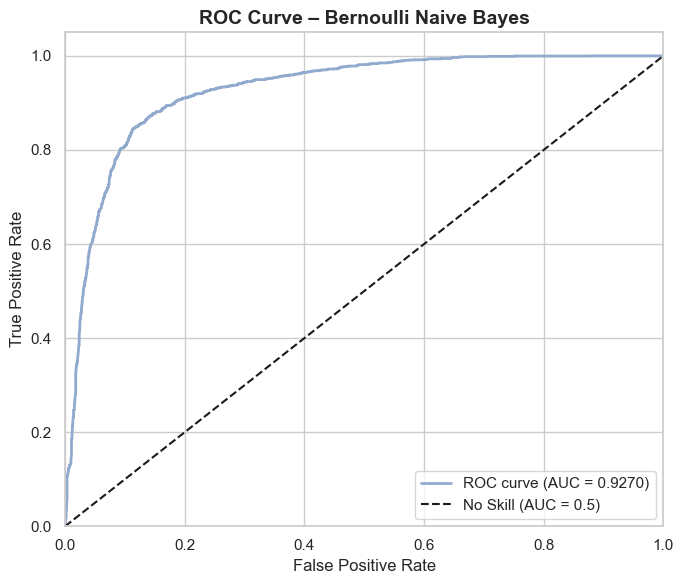

In [211]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_bnb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color="#92AACE", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--", label="No Skill (AUC = 0.5)")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Bernoulli Naive Bayes", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### 4.3.6. AdaBoost Classifier

Note: We are keeping the reduced feature set from Decision Trees too. We excluded the SAT_TOTAL_BEST_MISSING and HIGH_SCHL_GPA_MISSING because those are already accounted for in the -1 cluster labels (one-hot encoding columns present).

In [212]:
# Estimator
ada = AdaBoostClassifier(
    random_state=RANDOM_STATE
)

# Hyperparameter grid
param_grid_ada = {
    "n_estimators": [50, 100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=cv,
    scoring={
        "roc_auc": "roc_auc",
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
    },
    refit="roc_auc",
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

# Fit
grid_ada.fit(X_train_tree, y_train)

# CV summary
best_idx = grid_ada.best_index_
print("Best params:", grid_ada.best_params_)
print("CV ROC-AUC:", grid_ada.cv_results_["mean_test_roc_auc"][best_idx])
print("CV F1:     ", grid_ada.cv_results_["mean_test_f1"][best_idx])
print("CV Acc:    ", grid_ada.cv_results_["mean_test_accuracy"][best_idx])
print("CV Prec:   ", grid_ada.cv_results_["mean_test_precision"][best_idx])
print("CV Recall: ", grid_ada.cv_results_["mean_test_recall"][best_idx])

Best params: {'learning_rate': 0.2, 'n_estimators': 500}
CV ROC-AUC: 0.9553520025809943
CV F1:      0.8938729936411457
CV Acc:     0.8977322827230669
CV Prec:    0.8879891809930222
CV Recall:  0.8999222064250596


**Evaluate on Test Set**

In [213]:
# Test evaluation
best_ada = grid_ada.best_estimator_
y_proba_ada = best_ada.predict_proba(X_test_tree)[:, 1]
y_pred_ada  = best_ada.predict(X_test_tree)

print("\nTest set metrics (AdaBoost):")
print("ROC-AUC:           ", roc_auc_score(y_test, y_proba_ada))
print("Accuracy:          ", accuracy_score(y_test, y_pred_ada))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_ada))
print("F1:                ", f1_score(y_test, y_pred_ada))
print("\nClassification report:\n", classification_report(y_test, y_pred_ada, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_ada))


Test set metrics (AdaBoost):
ROC-AUC:            0.9533318879835118
Accuracy:           0.8953897736797988
Balanced Accuracy:  0.8954710808025633
F1:                 0.8914405010438413

Classification report:
               precision    recall  f1-score   support

           0      0.905     0.894     0.899      3110
           1      0.886     0.897     0.891      2855

    accuracy                          0.895      5965
   macro avg      0.895     0.895     0.895      5965
weighted avg      0.896     0.895     0.895      5965

Confusion matrix:
 [[2779  331]
 [ 293 2562]]


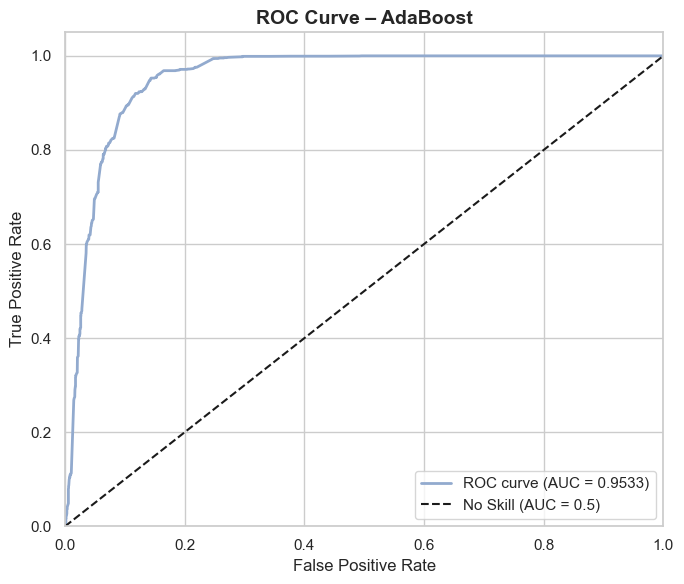

In [214]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ada)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color="#92AACE", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--", label="No Skill (AUC = 0.5)")
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – AdaBoost", fontsize=14, weight="bold")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Feature Importance**

In [215]:
# Feature importance (AdaBoost aggregates from weak learners)
importances = getattr(best_ada, "feature_importances_", None)
if importances is not None:
    fi_df = (pd.DataFrame({"Feature": X_train_tree.columns, "Importance": importances})
             .sort_values("Importance", ascending=False)
             .head(15))
    print("\nTop 15 Feature Importances:\n", fi_df)


Top 15 Feature Importances:
                                        Feature  Importance
40                    SAT_TOTAL_BEST_CLUSTER_0    0.239653
6    STUDENT_ADMIT_TYPE_Undergraduate Non FTIC    0.163494
3                      STUDENT_ADMIT_TYPE_FTIC    0.111363
42                    SAT_TOTAL_BEST_CLUSTER_2    0.077990
5          STUDENT_ADMIT_TYPE_Second Bachelors    0.063452
13  INTENDED_COLLEGE_Nursing & Health Sciences    0.059685
36                     HIGH_SCHL_GPA_CLUSTER_0    0.055994
35                    HIGH_SCHL_GPA_CLUSTER_-1    0.047897
29          EDUCATION_GROUPED_Associate Degree    0.047849
2               STUDENT_ADMIT_TYPE_CC Transfer    0.028859
39                   SAT_TOTAL_BEST_CLUSTER_-1    0.026273
44                              FL_RESY_BINARY    0.025013
37                     HIGH_SCHL_GPA_CLUSTER_1    0.019503
31        EDUCATION_GROUPED_High School or GED    0.016894
41                    SAT_TOTAL_BEST_CLUSTER_1    0.008867


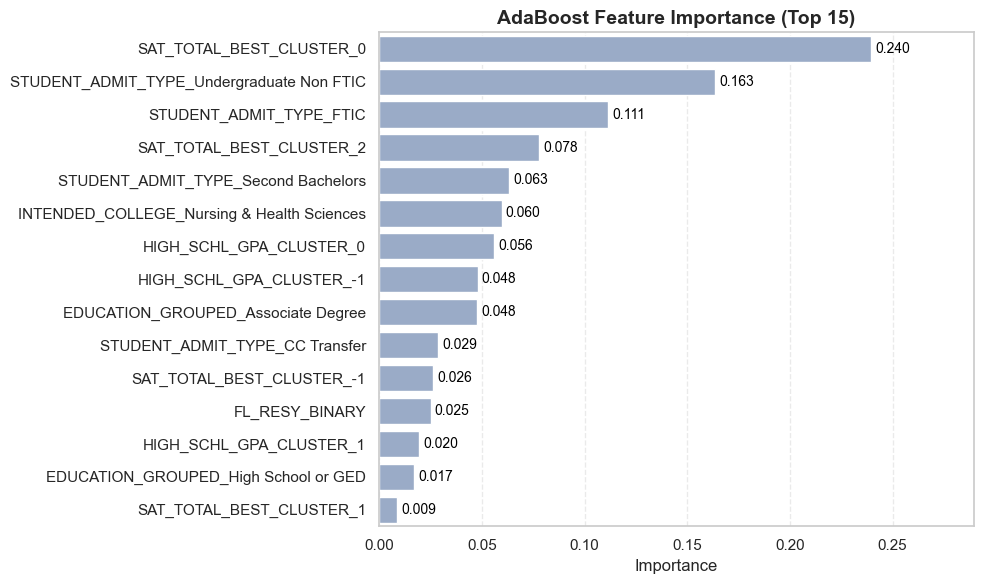

In [216]:
if importances is not None:
    fi_df = (pd.DataFrame({"Feature": X_train_tree.columns, "Importance": importances})
             .sort_values("Importance", ascending=False)
             .head(15))
    plt.figure(figsize=(10,6))
    sns.barplot(data=fi_df, x="Importance", y="Feature", color="#92AACE")
    for i, v in enumerate(fi_df["Importance"]):
        plt.text(v + 0.002, i, f"{v:.3f}", va="center", fontsize=10, color="black")
    plt.title("AdaBoost Feature Importance (Top 15)", fontsize=14, weight="bold")
    plt.xlabel("Importance"); plt.ylabel("")
    plt.xlim(0, fi_df["Importance"].max() + 0.05)
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

#### 4.3.7. Bar Plot Comparison (Top 10)

We'll use a vertical bar plot to compare the feature importance of the top performing models (Random Forest, Decision Tree, and Logistic Regression). 
- Get top 10 features of the best model (Random Forest)
- Get the importance of the same features but according to the other models
- In the case of Logistic Regression, normalize the magnitude of the coefficients first, so we can graph all of the importances together

**Step 1: Get top 10 features according to Random Forest**

In [217]:
top_k = 10

# Series of importances indexed by feature name
rf_importances = pd.Series(best_rf.feature_importances_, index=X_train_tree.columns)

# Top-k (descending) as a DataFrame
rf_top_df = (
    rf_importances
    .sort_values(ascending=False)
    .head(top_k)
    .rename("RF_Importance")
    .reset_index()
    .rename(columns={"index": "Feature"})
)

print(rf_top_df)

                                      Feature  RF_Importance
0                     STUDENT_ADMIT_TYPE_FTIC       0.336808
1                     HIGH_SCHL_GPA_CLUSTER_0       0.251043
2                     HIGH_SCHL_GPA_CLUSTER_2       0.087787
3                   SAT_TOTAL_BEST_CLUSTER_-1       0.079713
4                    SAT_TOTAL_BEST_CLUSTER_1       0.076863
5           STUDENT_ADMIT_TYPE_Other Transfer       0.041591
6                    HIGH_SCHL_GPA_CLUSTER_-1       0.028589
7  INTENDED_COLLEGE_Nursing & Health Sciences       0.028520
8                    SAT_TOTAL_BEST_CLUSTER_2       0.010200
9                    SAT_TOTAL_BEST_CLUSTER_0       0.009291


**Step 2: Add the importance according to Decision Tree**

In [218]:
# top_k = 10

# Random Forest importances
# rf_importances = pd.Series(best_rf.feature_importances_, index=X_train_tree.columns)
rf_top = rf_importances.sort_values(ascending=False).head(top_k)

# Decision Tree importances
dt_importances = pd.Series(best_dt.feature_importances_, index=X_train_tree.columns)

# Combine into a single DataFrame
fi_compare_df = pd.DataFrame({
    "Feature": rf_top.index,
    "RF_Importance": rf_top.values,
    "DT_Importance": dt_importances.reindex(rf_top.index).values  # align by feature
})

print(fi_compare_df)

                                      Feature  RF_Importance  DT_Importance
0                     STUDENT_ADMIT_TYPE_FTIC       0.336808       0.303649
1                     HIGH_SCHL_GPA_CLUSTER_0       0.251043       0.230165
2                     HIGH_SCHL_GPA_CLUSTER_2       0.087787       0.156575
3                   SAT_TOTAL_BEST_CLUSTER_-1       0.079713       0.098625
4                    SAT_TOTAL_BEST_CLUSTER_1       0.076863       0.087872
5           STUDENT_ADMIT_TYPE_Other Transfer       0.041591       0.042567
6                    HIGH_SCHL_GPA_CLUSTER_-1       0.028589       0.000000
7  INTENDED_COLLEGE_Nursing & Health Sciences       0.028520       0.034669
8                    SAT_TOTAL_BEST_CLUSTER_2       0.010200       0.008435
9                    SAT_TOTAL_BEST_CLUSTER_0       0.009291       0.002409


**Step 3: Normalize the importance according to Logistic Regression**

In [219]:
# Absolute value of logistic regression coefficients
lr_coef = pd.Series(best_lr.coef_[0], index=X_train.columns).abs()

# Normalize so values sum to 1 (comparable to DT/RF)
lr_norm_sum1 = lr_coef / lr_coef.sum()

# Combine and sort
lr_compare_df = pd.DataFrame({
    "Feature": lr_coef.index,
    "Abs_Coefficient": lr_coef.values,
    "Normalized_Importance": lr_norm_sum1.values
}).sort_values(by="Normalized_Importance", ascending=False)

display(lr_compare_df)

,Feature,Abs_Coefficient,Normalized_Importance
5,STUDENT_ADMIT_TYPE_Second Bachelors,6.593432,0.127957
3,STUDENT_ADMIT_TYPE_FTIC,5.761761,0.111817
30,EDUCATION_GROUPED_Bachelors or Higher,4.564956,0.088591
40,SAT_TOTAL_BEST_CLUSTER_0,2.849014,0.055290
32,EDUCATION_GROUPED_No Degree,2.667395,0.051765
6,STUDENT_ADMIT_TYPE_Undergraduate Non FTIC,2.257106,0.043803
29,EDUCATION_GROUPED_Associate Degree,2.140973,0.041549
41,SAT_TOTAL_BEST_CLUSTER_1,2.078341,0.040334
36,HIGH_SCHL_GPA_CLUSTER_0,2.025611,0.039310
13,INTENDED_COLLEGE_Nursing & Health Sciences,1.587900,0.030816


**Step 4: Add the importance (normalized to sum to 1) according to Logistic Regression**

In [220]:
# Align LR importances with the same top features from Random Forest
lr_aligned = lr_norm_sum1.reindex(fi_compare_df["Feature"]).fillna(0.0)

# Add LR importances as a new column
fi_compare_df["LR_Importance"] = lr_aligned.values

# # --- Step 5: optional — reorder columns and inspect ---
# fi_compare_df = fi_compare_df[["Feature", "RF_Importance", "DT_Importance", "LR_Importance"]]

display(fi_compare_df)

,Feature,RF_Importance,DT_Importance,LR_Importance
0,STUDENT_ADMIT_TYPE_FTIC,0.336808,0.303649,0.111817
1,HIGH_SCHL_GPA_CLUSTER_0,0.251043,0.230165,0.039310
2,HIGH_SCHL_GPA_CLUSTER_2,0.087787,0.156575,0.014314
3,SAT_TOTAL_BEST_CLUSTER_-1,0.079713,0.098625,0.021670
4,SAT_TOTAL_BEST_CLUSTER_1,0.076863,0.087872,0.040334
5,STUDENT_ADMIT_TYPE_Other Transfer,0.041591,0.042567,0.030217
6,HIGH_SCHL_GPA_CLUSTER_-1,0.028589,0.000000,0.010053
7,INTENDED_COLLEGE_Nursing & Health Sciences,0.028520,0.034669,0.030816
8,SAT_TOTAL_BEST_CLUSTER_2,0.010200,0.008435,0.030000
9,SAT_TOTAL_BEST_CLUSTER_0,0.009291,0.002409,0.055290


**Step 5: Format feature names**

In [221]:
# Top 10 feature labels
feature_labels = {
    "STUDENT_ADMIT_TYPE_FTIC": "Admission Type - FTIC",
    "HIGH_SCHL_GPA_CLUSTER_0": "High-School GPA - High",
    "HIGH_SCHL_GPA_CLUSTER_2": "High-School GPA - Mid",
    "SAT_TOTAL_BEST_CLUSTER_-1": "SAT Score - Missing",
    "SAT_TOTAL_BEST_CLUSTER_1": "SAT Score - Low",
    "STUDENT_ADMIT_TYPE_Other Transfer": "Admission Type - Other Transfer",
    "HIGH_SCHL_GPA_CLUSTER_-1": "High-School GPA - Missing",
    "INTENDED_COLLEGE_Nursing & Health Sciences": "Intended College - Nursing & Health Sciences",
    "SAT_TOTAL_BEST_CLUSTER_2": "SAT Score - Mid",
    "SAT_TOTAL_BEST_CLUSTER_0": "SAT Score - High"
}

# Add a new column using the mapping
fi_compare_df["Feature_Label"] = fi_compare_df["Feature"].map(feature_labels)

# Move Feature_Label next to Feature for readability
fi_compare_df = fi_compare_df[["Feature", "Feature_Label", "RF_Importance", "DT_Importance", "LR_Importance"]]

display(fi_compare_df)

,Feature,Feature_Label,RF_Importance,DT_Importance,LR_Importance
0,STUDENT_ADMIT_TYPE_FTIC,Admission Type - FTIC,0.336808,0.303649,0.111817
1,HIGH_SCHL_GPA_CLUSTER_0,High-School GPA - High,0.251043,0.230165,0.039310
2,HIGH_SCHL_GPA_CLUSTER_2,High-School GPA - Mid,0.087787,0.156575,0.014314
3,SAT_TOTAL_BEST_CLUSTER_-1,SAT Score - Missing,0.079713,0.098625,0.021670
4,SAT_TOTAL_BEST_CLUSTER_1,SAT Score - Low,0.076863,0.087872,0.040334
5,STUDENT_ADMIT_TYPE_Other Transfer,Admission Type - Other Transfer,0.041591,0.042567,0.030217
6,HIGH_SCHL_GPA_CLUSTER_-1,High-School GPA - Missing,0.028589,0.000000,0.010053
7,INTENDED_COLLEGE_Nursing & Health Sciences,Intended College - Nursing & Health Sciences,0.028520,0.034669,0.030816
8,SAT_TOTAL_BEST_CLUSTER_2,SAT Score - Mid,0.010200,0.008435,0.030000
9,SAT_TOTAL_BEST_CLUSTER_0,SAT Score - High,0.009291,0.002409,0.055290


**Step 6: Create vertical bar plot**

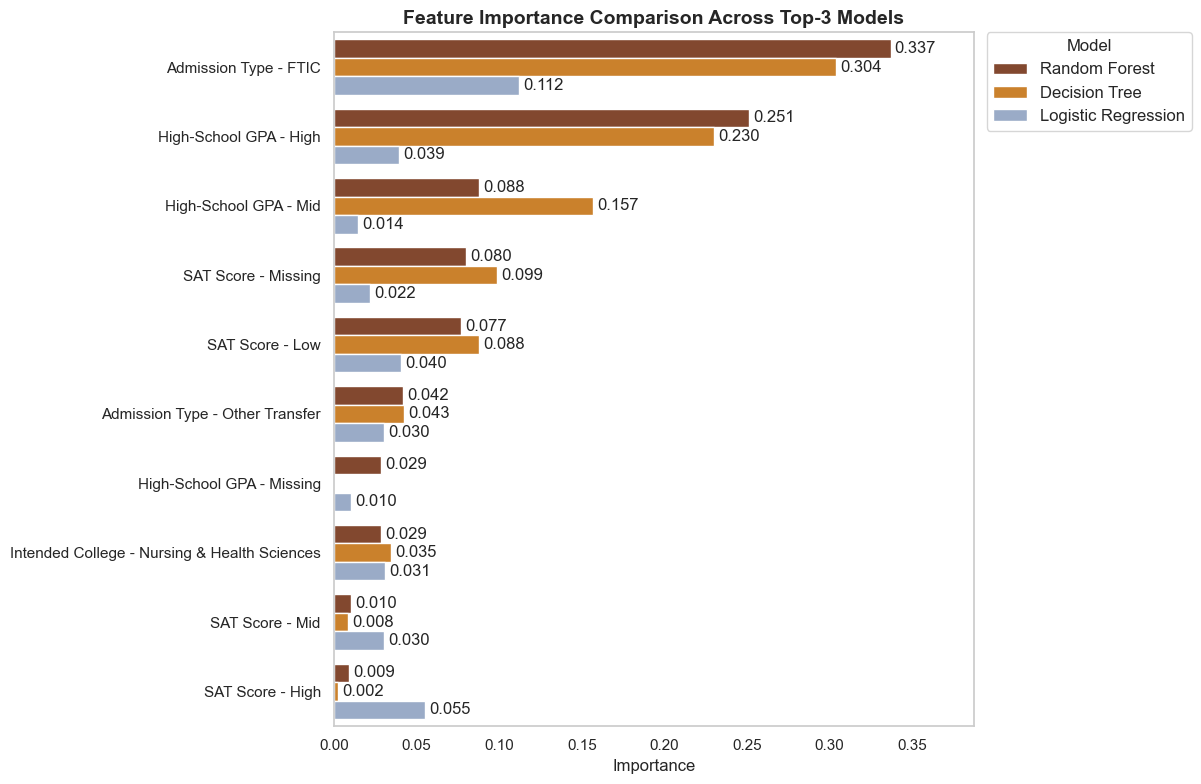

In [222]:
# Prepare data in long format
plot_df = fi_compare_df.melt(
    id_vars=["Feature_Label"],
    value_vars=["RF_Importance", "DT_Importance", "LR_Importance"],
    var_name="Model",
    value_name="Importance"
)

# Sort by Random Forest importance (descending)
rf_order = fi_compare_df.sort_values("RF_Importance", ascending=False)["Feature_Label"]

# Plot (vertical bars: Feature_Label on Y-axis)
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Custom colors
colors = ["#904321","#E48312","#92AACE"]

# Rename models for cleaner legend labels
model_name_map = {
    "RF_Importance": "Random Forest",
    "DT_Importance": "Decision Tree",
    "LR_Importance": "Logistic Regression"
}
plot_df["Model"] = plot_df["Model"].map(model_name_map)

ax = sns.barplot(
    data=plot_df,
    y="Feature_Label",   # vertical bars, features along Y-axis
    x="Importance",
    hue="Model",
    order=rf_order,
    palette=colors
)

xmax = plot_df["Importance"].max()
ax.set_xlim(0, xmax * 1.15)   # add ~15 % headroom

# Formatting
plt.title("Feature Importance Comparison Across Top-3 Models", fontsize=14, weight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("")
plt.legend(title="", fontsize=12, loc="lower right")
ax.grid(False)
plt.tight_layout()

# Move legend outside the plot
plt.legend(
    title="Model",
    bbox_to_anchor=(1.02, 1),  # position
    loc="upper left",
    borderaxespad=0,
    fontsize=12
)

# Add value labels at the end of bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f"{width:.3f}",
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center',
                fontsize=12, xytext=(3, 0), textcoords='offset points')

plt.show()

## 5. Bias Measurement and Mitigation

### 5.1. Fairness Metrics

We will calculate fairness measurements for the best performing model (Random Forest). Our focus will be group fairness metrics, including:
- Demographic or Statistical Parity
- Equal Opportunity
- Equalized Odds

Additional supporting metrics include:
- Selection Rate
- Disparate Impact
- True Positive Rate (TPR)
- False Positive Rate (FPR)

**Function to compute fairness metrics**

In [223]:
def fairness_metrics_binary(y_true, y_pred, sensitive_attr, privileged_value):
    """
    Computes group fairness metrics for a binary sensitive attribute.

    Params:
        y_true (array): true labels (0/1)
        y_pred (array): predicted labels (0/1)
        sensitive_attr (array): attribute groups (0/1 or any categorical encoded to binary)
        privileged_value: which group is considered privileged (optional)

    Returns: dict of fairness metrics
    """

    # Define groups
    priv = privileged_value
    unpriv = 1 - privileged_value

    metrics = {}

    def group_rates(mask):
        yt = y_true[mask]
        yp = y_pred[mask]

        tn, fp, fn, tp = confusion_matrix(yt, yp).ravel()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        sr  = (yp == 1).mean()  # selection rate

        return tpr, fpr, sr

    # Privileged group (e.g., male)
    mask_priv   = (sensitive_attr == priv)
    tpr_p, fpr_p, sr_p = group_rates(mask_priv)

    # Unprivileged group (e.g., female)
    mask_unpriv = (sensitive_attr == unpriv)
    tpr_u, fpr_u, sr_u = group_rates(mask_unpriv)

    # Store raw group stats
    metrics["Priv_TPR"] = tpr_p
    metrics["Unpriv_TPR"] = tpr_u
    metrics["Priv_FPR"] = fpr_p
    metrics["Unpriv_FPR"] = fpr_u
    metrics["Priv_SelectionRate"] = sr_p
    metrics["Unpriv_SelectionRate"] = sr_u

    # Fairness Metrics
    
    # Statistical parity difference (absolute)
    metrics["StatParityDiff"] = abs(sr_p - sr_u)

    # Disparate impact (unpriv / priv)
    metrics["DisparateImpact"] = sr_u / sr_p if sr_p > 0 else np.nan

    # Equal opportunity difference (TPR gap)
    metrics["EqualOpportunityDiff"] = abs(tpr_p - tpr_u)

    # Equalized odds difference (TPR+FPR gap)
    metrics["EqualizedOddsDiff"] = abs(tpr_p - tpr_u) + abs(fpr_p - fpr_u)

    return metrics

**Function to compute confusion matrix for protected groups**

In [224]:
def group_confusion_matrices(y_true, y_pred, sensitive_attr, privileged_value):
    """
    Computes confusion matrices for privileged and unprivileged groups.

    y_true : array-like of true labels
    y_pred : array-like of predicted labels
    sensitive_attr : binary indicator (1/0) of group membership
    privileged_value : which value is considered privileged (0 or 1)
    """

    # Group masks
    priv_mask = (sensitive_attr == privileged_value)
    unpriv_mask = ~priv_mask
    
    # Confusion matrices
    cm_priv = confusion_matrix(y_true[priv_mask], y_pred[priv_mask])
    cm_unpriv = confusion_matrix(y_true[unpriv_mask], y_pred[unpriv_mask])
    
    # Put into nice dataframes
    labels = ["Pred 0", "Pred 1"]
    
    df_priv = pd.DataFrame(cm_priv, 
                           index=["Actual 0", "Actual 1"], 
                           columns=labels)
    
    df_unpriv = pd.DataFrame(cm_unpriv, 
                             index=["Actual 0", "Actual 1"], 
                             columns=labels)
    
    return df_priv, df_unpriv

#### 5.1.1. Gender

In [225]:
# Sensitive attribute (Gender)
gender_test = X_test_tree["STUDENT_GENDER_Female"].values  # 1 = female, 0 = male

fair_gender_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,       # store RF predictions in y_pred_rf
    sensitive_attr = gender_test,
    privileged_value = 0      # 0 = male as privileged
)

pd.DataFrame([fair_gender_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.950715,0.938009,0.129759,0.09819,0.53556,0.490351,0.045209,0.915585,0.012707,0.044276


In [226]:
# Sensitive attribute (Gender)
gender_test = X_test_tree["STUDENT_GENDER_Female"].values  # 1 = female, 0 = male

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = gender_test,
    privileged_value = 0   # males privileged
)

print("Privileged group confusion matrix (Male):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Female):")
display(cm_unpriv)

Privileged group confusion matrix (Male):


,Pred 0,Pred 1
Actual 0,1120,167
Actual 1,62,1196



Unprivileged group confusion matrix (Female):


,Pred 0,Pred 1
Actual 0,1644,179
Actual 1,99,1498


#### 5.1.2. Florida Residency

In [227]:
# Sensitive attribute (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

# Compute fairness metrics for Random Forest
fair_fl_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,         # RF predictions
    sensitive_attr = fl_resid_test,
    privileged_value = 1        # residents = privileged
)

pd.DataFrame([fair_fl_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.965864,0.854386,0.223602,0.047403,0.720692,0.227575,0.493116,0.315774,0.111478,0.287678


In [228]:
# Sensitive attribute (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = fl_resid_test,
    privileged_value = 1        # residents = privileged
)

print("Privileged group confusion matrix (FL Residents):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Non-FL Residents):")
display(cm_unpriv)

Privileged group confusion matrix (FL Residents):


,Pred 0,Pred 1
Actual 0,875,252
Actual 1,78,2207



Unprivileged group confusion matrix (Non-FL Residents):


,Pred 0,Pred 1
Actual 0,1889,94
Actual 1,83,487


#### 5.1.3. Military Status

In [229]:
# Sensitive attribute (Military vs Non-military)
military_test = X_test_tree["US_MILITARY_STATUS_BINARY"].values   # 1 = military, 0 = non-military

# Compute fairness metrics for Random Forest
fair_military_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,         # RF predictions
    sensitive_attr = military_test,
    privileged_value = 1        # 1 = military
)

pd.DataFrame([fair_military_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.863158,0.946377,0.216867,0.108358,0.561798,0.508035,0.053763,0.904303,0.083219,0.191728


In [230]:
# Sensitive attribute (Military vs Non-military)
military_test = X_test_tree["US_MILITARY_STATUS_BINARY"].values   # 1 = military, 0 = non-military

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = military_test,
    privileged_value = 1        # 1 = military
)

print("Privileged group confusion matrix (Military Status):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Non-Military Status):")
display(cm_unpriv)

Privileged group confusion matrix (Military Status):


,Pred 0,Pred 1
Actual 0,65,18
Actual 1,13,82



Unprivileged group confusion matrix (Non-Military Status):


,Pred 0,Pred 1
Actual 0,2699,328
Actual 1,148,2612


#### 5.1.4. Age

In [231]:
# Sensitive attribute: 1 = younger, 0 = older
age_test = X_test_tree["TERM_AGE_CLUSTER_0"].values   # younger = 1

# Age fairness (Random Forest)
fair_age_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = age_test,
    privileged_value = 0     # older = privileged
)

pd.DataFrame([fair_age_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.901734,0.946309,0.274194,0.10794,0.73617,0.500349,0.235821,0.679665,0.044575,0.210829


In [232]:
# Sensitive attribute: 1 = younger, 0 = older
age_test = X_test_tree["TERM_AGE_CLUSTER_0"].values   # younger = 1

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = age_test,
    privileged_value = 0     # older = privileged
)

print("Privileged group confusion matrix (Older Applicants):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Younger Applicants):")
display(cm_unpriv)

Privileged group confusion matrix (Older Applicants):


,Pred 0,Pred 1
Actual 0,45,17
Actual 1,17,156



Unprivileged group confusion matrix (Younger Applicants):


,Pred 0,Pred 1
Actual 0,2719,329
Actual 1,144,2538


#### 5.1.5. Ethnicity

**Individual**

On the first analysis, we're going to do 1 versus rest, meaning we'll make each one-hot encoded ethnicity our priviledge or un-priviledge group depending on unbalances (less admitted group will be our protected attribute).

In [233]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Asian"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 1     # Asian ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.959016,0.94292,0.108434,0.111331,0.614634,0.505903,0.108731,0.823096,0.016097,0.018994


In [234]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Black or African American"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 0     # Non-black or african amercian ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.947167,0.90535,0.120048,0.075286,0.542751,0.311475,0.231276,0.573883,0.041817,0.086579


In [235]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Hispanic/Latino"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 1     # hispanic or latino ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.960591,0.926778,0.17094,0.085557,0.647009,0.4199,0.227109,0.648987,0.033813,0.119196


In [236]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Missing/Unknown"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 1     # missing or unknown ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.97619,0.943121,0.041096,0.11294,0.382609,0.512137,0.129528,1.338539,0.033069,0.104914


In [237]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Nonresident Alien"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 0     # Residents ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.952621,0.897872,0.128317,0.062885,0.548036,0.369243,0.178793,0.673757,0.054748,0.12018


In [238]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_Other"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 1     # Other ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.988372,0.942217,0.119266,0.110963,0.502564,0.509879,0.007315,1.014555,0.046155,0.054458


In [239]:
# Sensitive attribute
ethnicity_test = X_test_tree["ETHNICITY_GROUPED_White"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_ethnicity_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = ethnicity_test,
    privileged_value = 1     # White ethnicity
)

pd.DataFrame([fair_ethnicity_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.942675,0.943792,0.131417,0.10751,0.530271,0.505692,0.024579,0.953648,0.001117,0.025023


**Grouped**

On our second analysis, we'll group the ethnicities with the lowest admission rates (in this case Black or African American and Nonresident Alien) and compare those against the rest of the ethnicities. 

In [240]:
# Combined sensitive attribute
# 1 = Black or African American OR Nonresident Alien (unprivileged)
# 0 = all other ethnicities (privileged)

ethnicity_combined_test = (
    (X_test_tree["ETHNICITY_GROUPED_Black or African American"] == 1) |
    (X_test_tree["ETHNICITY_GROUPED_Nonresident Alien"] == 1)
).astype(int).values

# Fairness for ethnicity combo (Random Forest)
fair_ethnicity_combo_rf = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_rf,           # RF predictions
    sensitive_attr = ethnicity_combined_test,
    privileged_value = 0                    # 0 = "rest" is privileged
)

pd.DataFrame([fair_ethnicity_combo_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.957983,0.900421,0.147512,0.068214,0.600783,0.346136,0.254647,0.576141,0.057562,0.136861


In [241]:
# Combined sensitive attribute
# 1 = Black or African American OR Nonresident Alien (unprivileged)
# 0 = all other ethnicities (privileged)

ethnicity_combined_test = (
    (X_test_tree["ETHNICITY_GROUPED_Black or African American"] == 1) |
    (X_test_tree["ETHNICITY_GROUPED_Nonresident Alien"] == 1)
).astype(int).values

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = ethnicity_combined_test,
    privileged_value = 0   # 0 = "rest" is privileged
)

print("Privileged group confusion matrix (Other Ethnicities):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Black or African American OR Nonresident Alien):")
display(cm_unpriv)

Privileged group confusion matrix (Other Ethnicities):


,Pred 0,Pred 1
Actual 0,1439,249
Actual 1,90,2052



Unprivileged group confusion matrix (Black or African American OR Nonresident Alien):


,Pred 0,Pred 1
Actual 0,1325,97
Actual 1,71,642


#### 5.1.6. Continent of Birth 

**Individual**

On the first analysis, we're going to do 1 versus rest, meaning we'll make each one-hot encoded continent of birth our priviledge or un-priviledge group depending on unbalances (less admitted group will be our protected attribute).

In [242]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_Africa"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 0     # Continent of birth Africa
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.943896,0.904762,0.115101,0.023077,0.519092,0.145695,0.373396,0.280674,0.039134,0.131157


In [243]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_Asia"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 0     # Continent of birth Asia
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.945361,0.90625,0.120867,0.020202,0.526715,0.287059,0.239656,0.544999,0.039111,0.139777


In [244]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_Europe"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 1     # Continent of birth Europe
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.831169,0.946724,0.154639,0.109857,0.454023,0.511311,0.057288,1.126178,0.115555,0.160337


In [245]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_Missing/Unknown"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 1     # Continent of birth Missing
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.923077,0.943989,0.073529,0.112097,0.441667,0.511035,0.069368,1.157061,0.020912,0.05948


In [246]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_North America"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 1     # Continent of birth North America
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.949064,0.921147,0.124088,0.072983,0.533722,0.426438,0.107285,0.798988,0.027917,0.079021


In [247]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_Oceania"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 0     # Continent of birth not Oceania
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.943919,0.5,0.11129,0.0,0.509728,0.333333,0.176395,0.653943,0.443919,0.555208


In [248]:
print("Oceania count in test set:", X_test_tree["CONTINENT_OF_BIRTH_Oceania"].sum())

Oceania count in test set: 3


In [249]:
# Sensitive attribute
continent_test = X_test_tree["CONTINENT_OF_BIRTH_South America"].values   # true when = 1

# Country of birth fairness (Random Forest)
fair_continent_rf = fairness_metrics_binary(
    y_true = y_test.values,
    y_pred = y_pred_rf,      # RF predictions
    sensitive_attr = continent_test,
    privileged_value = 1     # Continent of birth South America
)

pd.DataFrame([fair_continent_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.956835,0.942181,0.148936,0.10883,0.630901,0.499364,0.131538,0.791508,0.014654,0.05476


**Grouped**

On our second analysis, we'll group the continent of birth with the lowest admission rates (in this case Africa, Asia, and Oceania) and compare those against the rest of the continent of birth. 

In [250]:
# Combined sensitive attribute
# 1 = Africa OR Asian OR Oceania (unprivileged)
# 0 = all other continent of birth (privileged)

continent_combined_test = (
    (X_test_tree["CONTINENT_OF_BIRTH_Africa"] == 1) |
    (X_test_tree["CONTINENT_OF_BIRTH_Asia"] == 1) |
    (X_test_tree["CONTINENT_OF_BIRTH_Oceania"] == 1)
).astype(int).values

# Fairness for continent of birth combo (Random Forest)
fair_continent_combo_rf = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_rf,           # RF predictions
    sensitive_attr = continent_combined_test,
    privileged_value = 0                    # 0 = "rest" is privileged
)

pd.DataFrame([fair_continent_combo_rf])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.946006,0.900662,0.125652,0.021028,0.537505,0.250432,0.287073,0.465916,0.045344,0.149968


In [251]:
# Combined sensitive attribute
# 1 = Africa OR Asian OR Oceania (unprivileged)
# 0 = all other continent of birth (privileged)

continent_combined_test = (
    (X_test_tree["CONTINENT_OF_BIRTH_Africa"] == 1) |
    (X_test_tree["CONTINENT_OF_BIRTH_Asia"] == 1) |
    (X_test_tree["CONTINENT_OF_BIRTH_Oceania"] == 1)
).astype(int).values

cm_priv, cm_unpriv = group_confusion_matrices(
    y_true = y_test.values,
    y_pred = y_pred_rf,
    sensitive_attr = continent_combined_test,
    privileged_value = 0   # 0 = "rest" is privileged
)

print("Privileged group confusion matrix (Other Continent of Birth):")
display(cm_priv)

print("\nUnprivileged group confusion matrix (Africa OR Asian OR Oceania):")
display(cm_unpriv)

Privileged group confusion matrix (Other Continent of Birth):


,Pred 0,Pred 1
Actual 0,2345,337
Actual 1,146,2558



Unprivileged group confusion matrix (Africa OR Asian OR Oceania):


,Pred 0,Pred 1
Actual 0,419,9
Actual 1,15,136


### 5.2. Bias Mitigation Pre-Processing Strategies

Pre-processing techniques include those in which we modify the data before prediction. We will evaluate 2 approaches, using SMOTE versus oversampling with replacement of one of the protected groups we identified disparities for (e.g., FLorida Residency).

In [252]:
# Combine features + label for convenience
train_rf = X_train_tree.copy()
train_rf["ADMITTED"] = y_train.values  # or y_train.to_numpy()

#### 5.2.1. Random Oversampling with Replacement

**70%-30% Distribution**

In [253]:
# Original distribution in training dataset
priv = 1  # FL resident
unpriv = 0  # non-resident

# Masks
mask_priv_pos   = (train_rf["FL_RESY_BINARY"] == priv)   & (train_rf["ADMITTED"] == 1)
mask_unpriv_pos = (train_rf["FL_RESY_BINARY"] == unpriv) & (train_rf["ADMITTED"] == 1)

n_priv_pos   = mask_priv_pos.sum()
n_unpriv_pos = mask_unpriv_pos.sum()

print("Resident admitted:", n_priv_pos)
print("Non-resident admitted:", n_unpriv_pos)

Resident admitted: 8962
Non-resident admitted: 2459


In [254]:
# Target share of admitted across groups
target_nonres_share = 0.30   # residents will be ~0.70

train_balanced = train_rf.copy()

if n_unpriv_pos > 0:
    # total admitted (positives)
    total_pos = n_priv_pos + n_unpriv_pos

    # k = (t * (R0 + U0) - U0) / (1 - t)
    num = target_nonres_share * total_pos - n_unpriv_pos
    den = 1.0 - target_nonres_share

    if num > 0 and den > 0:
        k_float = num / den
        n_to_sample = int(np.ceil(k_float))
    else:
        n_to_sample = 0

    print("Extra non-resident admitted to sample:", n_to_sample)

    if n_to_sample > 0:
        unpriv_pos_samples = train_rf[mask_unpriv_pos].sample(
            n=n_to_sample,
            replace=True,
            random_state=RANDOM_STATE
        )
        train_balanced = pd.concat([train_rf, unpriv_pos_samples], axis=0)
else:
    print("No unprivileged positives to oversample; skipping.")

# Shuffle
train_balanced = train_balanced.sample(frac=1.0, random_state=RANDOM_STATE).reset_index(drop=True)

# Back to X / y
X_train_res = train_balanced.drop(columns=["ADMITTED"])
y_train_res = train_balanced["ADMITTED"]

Extra non-resident admitted to sample: 1382


In [255]:
mask_pos_bal = (train_balanced["ADMITTED"] == 1)

R_new = train_balanced[mask_pos_bal & (train_balanced["FL_RESY_BINARY"] == 1)].shape[0]
U_new = train_balanced[mask_pos_bal & (train_balanced["FL_RESY_BINARY"] == 0)].shape[0]
total_new = R_new + U_new

print("AFTER BALANCING:")
print("Resident admitted:", R_new)
print("Non-resident admitted:", U_new)

AFTER BALANCING:
Resident admitted: 8962
Non-resident admitted: 3841


In [256]:
best_params_rf = {
    "max_depth": 10,
    "max_features": None,
    "min_samples_leaf": 5,
    "n_estimators": 500,
}

rf_residency = RandomForestClassifier(
    **best_params_rf,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

rf_residency.fit(X_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [257]:
# Evaluate on untouched test set (X_test_tree, y_test)
y_proba_res = rf_residency.predict_proba(X_test_tree)[:, 1]
y_pred_res  = rf_residency.predict(X_test_tree)

In [258]:
print("\nRandom Forest with Non-FL Residency Oversampling – Test metrics:")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_res))
print("F1:",      f1_score(y_test, y_pred_res))
print("Accuracy:",accuracy_score(y_test, y_pred_res))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_res))
print("\nClassification report:\n", classification_report(y_test, y_pred_res, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_res))


Random Forest with Non-FL Residency Oversampling – Test metrics:
ROC-AUC: 0.969089880111048
F1: 0.9145913421360522
Accuracy: 0.9143336127409891
Balanced Accuracy: 0.9161368614885601

Classification report:
               precision    recall  f1-score   support

           0      0.958     0.874     0.914      3110
           1      0.875     0.958     0.915      2855

    accuracy                          0.914      5965
   macro avg      0.916     0.916     0.914      5965
weighted avg      0.918     0.914     0.914      5965

Confusion matrix:
 [[2718  392]
 [ 119 2736]]


In [259]:
# Fairness metrics AFTER mitigation (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

fair_fl_rf_after = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       # NEW RF predictions
    sensitive_attr = fl_resid_test,
    privileged_value = 1               # residents = privileged
)

pd.DataFrame([fair_fl_rf_after])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.963676,0.936842,0.219166,0.073122,0.717761,0.265962,0.451799,0.370543,0.026834,0.172878


In [260]:
# Group confusion matrices AFTER mitigation
cm_priv_after, cm_unpriv_after = group_confusion_matrices(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       
    sensitive_attr = fl_resid_test,
    privileged_value = 1
)

print("Privileged group confusion matrix (FL Residents) – AFTER mitigation:")
display(cm_priv_after)

print("\nUnprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:")
display(cm_unpriv_after)

Privileged group confusion matrix (FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,880,247
Actual 1,83,2202



Unprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,1838,145
Actual 1,36,534


**50%-50% Distribution**

In [261]:
priv = 1  # FL resident
unpriv = 0  # non-resident

# Masks
mask_priv_pos   = (train_rf["FL_RESY_BINARY"] == priv)   & (train_rf["ADMITTED"] == 1)
mask_unpriv_pos = (train_rf["FL_RESY_BINARY"] == unpriv) & (train_rf["ADMITTED"] == 1)

n_priv_pos   = mask_priv_pos.sum()
n_unpriv_pos = mask_unpriv_pos.sum()

print("Resident admitted:", n_priv_pos)
print("Non-resident admitted:", n_unpriv_pos)

Resident admitted: 8962
Non-resident admitted: 2459


In [262]:
if n_unpriv_pos > 0 and n_unpriv_pos < n_priv_pos:
    n_needed = n_priv_pos - n_unpriv_pos
    
    # Sample WITH replacement from non-resident admitted
    unpriv_pos_samples = train_rf[mask_unpriv_pos].sample(
        n=n_needed,
        replace=True,
        random_state=RANDOM_STATE
    )

    # New balanced training set
    train_balanced = pd.concat([train_rf, unpriv_pos_samples], axis=0)
else:
    # Nothing to oversample (already balanced or no unprivileged positives)
    train_balanced = train_rf.copy()

# Shuffle
train_balanced = train_balanced.sample(frac=1.0, random_state=RANDOM_STATE).reset_index(drop=True)

# Back to X / y
X_train_res = train_balanced.drop(columns=["ADMITTED"])
y_train_res = train_balanced["ADMITTED"]

In [263]:
# After balancing, compute new selection counts

# Residents: FL_RESY_BINARY = 1
resident_admitted_new = train_balanced[
    (train_balanced["FL_RESY_BINARY"] == 1) & (train_balanced["ADMITTED"] == 1)
].shape[0]

# Non-residents: FL_RESY_BINARY = 0
nonresident_admitted_new = train_balanced[
    (train_balanced["FL_RESY_BINARY"] == 0) & (train_balanced["ADMITTED"] == 1)
].shape[0]

resident_admitted_new, nonresident_admitted_new

(8962, 8962)

In [264]:
# After balancing, compute new selection counts

# Residents: FL_RESY_BINARY = 1
resident_admitted_new = train_balanced[
    (train_balanced["FL_RESY_BINARY"] == 1) & (train_balanced["ADMITTED"] == 1)
].shape[0]

# Non-residents: FL_RESY_BINARY = 0
nonresident_admitted_new = train_balanced[
    (train_balanced["FL_RESY_BINARY"] == 0) & (train_balanced["ADMITTED"] == 1)
].shape[0]

resident_admitted_new, nonresident_admitted_new

(8962, 8962)

In [265]:
best_params_rf = {
    "max_depth": 10,
    "max_features": None,
    "min_samples_leaf": 5,
    "n_estimators": 500,
}

rf_residency = RandomForestClassifier(
    **best_params_rf,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

rf_residency.fit(X_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [266]:
# Evaluate on untouched test set (X_test_tree, y_test)
y_proba_res = rf_residency.predict_proba(X_test_tree)[:, 1]
y_pred_res  = rf_residency.predict(X_test_tree)

In [267]:
print("\nRandom Forest with Non-FL Residency Oversampling – Test metrics:")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_res))
print("F1:",      f1_score(y_test, y_pred_res))
print("Accuracy:",accuracy_score(y_test, y_pred_res))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_res))
print("\nClassification report:\n", classification_report(y_test, y_pred_res, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_res))


Random Forest with Non-FL Residency Oversampling – Test metrics:
ROC-AUC: 0.9670152212229912
F1: 0.9074962766837663
Accuracy: 0.9062866722548197
Balanced Accuracy: 0.908505977553905

Classification report:
               precision    recall  f1-score   support

           0      0.959     0.857     0.905      3110
           1      0.860     0.960     0.907      2855

    accuracy                          0.906      5965
   macro avg      0.910     0.909     0.906      5965
weighted avg      0.912     0.906     0.906      5965

Confusion matrix:
 [[2664  446]
 [ 113 2742]]


In [268]:
# Fairness metrics AFTER mitigation (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

fair_fl_rf_after = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       # NEW RF predictions
    sensitive_attr = fl_resid_test,
    privileged_value = 1               # residents = privileged
)

pd.DataFrame([fair_fl_rf_after])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.957987,0.970175,0.210293,0.105396,0.71102,0.298472,0.412548,0.419781,0.012189,0.117086


In [269]:
# Group confusion matrices AFTER mitigation
cm_priv_after, cm_unpriv_after = group_confusion_matrices(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       
    sensitive_attr = fl_resid_test,
    privileged_value = 1
)

print("Privileged group confusion matrix (FL Residents) – AFTER mitigation:")
display(cm_priv_after)

print("\nUnprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:")
display(cm_unpriv_after)

Privileged group confusion matrix (FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,890,237
Actual 1,96,2189



Unprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,1774,209
Actual 1,17,553


#### 5.2.2. SMOTE

In [270]:
# from imblearn.over_sampling import SMOTE

**70%-30% Distribution**

In [271]:
priv = 1   # resident
unpriv = 0 # non-resident

# Work only with ADMITTED = 1 rows (positives)
mask_pos = (train_rf["ADMITTED"] == 1)

df_pos = train_rf.loc[mask_pos].copy()
df_neg = train_rf.loc[~mask_pos].copy()   # keep all non-admitted unchanged

# Counts among admitted
R0 = ((df_pos["FL_RESY_BINARY"] == priv)).sum()
U0 = ((df_pos["FL_RESY_BINARY"] == unpriv)).sum()

print("Current admitted counts:")
print("Residents (1):     ", R0)
print("Non-residents (0): ", U0)

# Desired ratio among admitted: 70% residents, 30% non-residents
target_nonres_share = 0.30
target_res_share    = 0.70

# Keep residents fixed, increase non-residents
U_target = int(np.ceil((target_nonres_share / target_res_share) * R0))
R_target = R0

print("\nTarget admitted counts after SMOTE:")
print("Residents (1):     ", R_target)
print("Non-residents (0): ", U_target)

# Prepare X and y for SMOTE, using FL_RESY_BINARY as the 'label'
# Drop FL_RESY_BINARY from X so we don't use it as a feature during SMOTE.
X_pos = df_pos.drop(columns=["FL_RESY_BINARY"])
y_group = df_pos["FL_RESY_BINARY"]

# SMOTE with custom sampling_strategy (desired counts per class)
sm = SMOTE(
    sampling_strategy={unpriv: U_target, priv: R_target},
    random_state=RANDOM_STATE
)

X_pos_res, y_group_res = sm.fit_resample(X_pos, y_group)

# Rebuild the positive part dataframe: add back FL_RESY_BINARY
df_pos_res = X_pos_res.copy()
df_pos_res["FL_RESY_BINARY"] = y_group_res

print("\nAFTER SMOTE (admitted only):")
print("Residents (1):     ", (df_pos_res["FL_RESY_BINARY"] == 1).sum())
print("Non-residents (0): ", (df_pos_res["FL_RESY_BINARY"] == 0).sum())

# Combine back with negatives (ADMITTED=0 unchanged)
train_balanced_smote = pd.concat([df_pos_res, df_neg], axis=0)

# Shuffle
train_balanced_smote = (
    train_balanced_smote
    .sample(frac=1.0, random_state=RANDOM_STATE)
    .reset_index(drop=True)
)

# Final X / y for the *real* target (ADMITTED)
X_train_res = train_balanced_smote.drop(columns=["ADMITTED"])
y_train_res = train_balanced_smote["ADMITTED"]

Current admitted counts:
Residents (1):      8962
Non-residents (0):  2459

Target admitted counts after SMOTE:
Residents (1):      8962
Non-residents (0):  3841

AFTER SMOTE (admitted only):
Residents (1):      8962
Non-residents (0):  3841


**Best hyper-parameters from previous run:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 500}

In [272]:
best_params_rf = {
    "max_depth": 10,
    "max_features": None,
    "min_samples_leaf": 5,
    "n_estimators": 500,
}

rf_residency_t_smote = RandomForestClassifier(
    **best_params_rf,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced_subsample'  # or None, if you want to isolate SMOTE effect
)

rf_residency_t_smote.fit(X_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [273]:
# Evaluate on the untouched test set
y_proba_res = rf_residency_t_smote.predict_proba(X_test_tree)[:, 1]
y_pred_res  = rf_residency_t_smote.predict(X_test_tree)

print("\nRandom Forest with SMOTE – Test metrics:")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_res))
print("F1:",      f1_score(y_test, y_pred_res))
print("Accuracy:",accuracy_score(y_test, y_pred_res))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_res))
print("\nClassification report:\n", classification_report(y_test, y_pred_res, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_res))


Random Forest with SMOTE – Test metrics:
ROC-AUC: 0.9693449186568383
F1: 0.9136750709634329
Accuracy: 0.913327745180218
Balanced Accuracy: 0.9151722312634798

Classification report:
               precision    recall  f1-score   support

           0      0.958     0.872     0.913      3110
           1      0.873     0.958     0.914      2855

    accuracy                          0.913      5965
   macro avg      0.915     0.915     0.913      5965
weighted avg      0.917     0.913     0.913      5965

Confusion matrix:
 [[2712  398]
 [ 119 2736]]


In [274]:
# Fairness metrics AFTER mitigation (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

fair_fl_rf_after = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       # NEW RF predictions
    sensitive_attr = fl_resid_test,
    privileged_value = 1               # residents = privileged
)

pd.DataFrame([fair_fl_rf_after])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.966302,0.926316,0.227152,0.071609,0.722157,0.262436,0.459721,0.363406,0.039986,0.195529


In [275]:
# Group confusion matrices AFTER mitigation
cm_priv_after, cm_unpriv_after = group_confusion_matrices(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       
    sensitive_attr = fl_resid_test,
    privileged_value = 1
)

print("Privileged group confusion matrix (FL Residents) – AFTER mitigation:")
display(cm_priv_after)

print("\nUnprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:")
display(cm_unpriv_after)

Privileged group confusion matrix (FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,871,256
Actual 1,77,2208



Unprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,1841,142
Actual 1,42,528


**50%-50% Distribution**

In [276]:
priv = 1   # resident
unpriv = 0 # non-resident

# Work only with ADMITTED = 1 rows (positives)
mask_pos = (train_rf["ADMITTED"] == 1)

df_pos = train_rf.loc[mask_pos].copy()
df_neg = train_rf.loc[~mask_pos].copy()   # keep all non-admitted unchanged

# Counts among admitted
R0 = ((df_pos["FL_RESY_BINARY"] == priv)).sum()
U0 = ((df_pos["FL_RESY_BINARY"] == unpriv)).sum()

print("Current admitted counts:")
print("Residents (1):     ", R0)
print("Non-residents (0): ", U0)

# Desired ratio among admitted: 50% residents, 50% non-residents
target_nonres_share = 0.50
target_res_share    = 0.50

# Keep residents fixed, increase non-residents
U_target = int(np.ceil((target_nonres_share / target_res_share) * R0))
R_target = R0

print("\nTarget admitted counts after SMOTE:")
print("Residents (1):     ", R_target)
print("Non-residents (0): ", U_target)

# Prepare X and y for SMOTE, using FL_RESY_BINARY as the 'label'
# Drop FL_RESY_BINARY from X so we don't use it as a feature during SMOTE.
X_pos = df_pos.drop(columns=["FL_RESY_BINARY"])
y_group = df_pos["FL_RESY_BINARY"]

# SMOTE with custom sampling_strategy (desired counts per class)
sm = SMOTE(
    sampling_strategy={unpriv: U_target, priv: R_target},
    random_state=RANDOM_STATE
)

X_pos_res, y_group_res = sm.fit_resample(X_pos, y_group)

# Rebuild the positive part dataframe: add back FL_RESY_BINARY
df_pos_res = X_pos_res.copy()
df_pos_res["FL_RESY_BINARY"] = y_group_res

print("\nAFTER SMOTE (admitted only):")
print("Residents (1):     ", (df_pos_res["FL_RESY_BINARY"] == 1).sum())
print("Non-residents (0): ", (df_pos_res["FL_RESY_BINARY"] == 0).sum())

# Combine back with negatives (ADMITTED=0 unchanged)
train_balanced_smote = pd.concat([df_pos_res, df_neg], axis=0)

# Shuffle
train_balanced_smote = (
    train_balanced_smote
    .sample(frac=1.0, random_state=RANDOM_STATE)
    .reset_index(drop=True)
)

# Final X / y for the *real* target (ADMITTED)
X_train_res = train_balanced_smote.drop(columns=["ADMITTED"])
y_train_res = train_balanced_smote["ADMITTED"]

Current admitted counts:
Residents (1):      8962
Non-residents (0):  2459

Target admitted counts after SMOTE:
Residents (1):      8962
Non-residents (0):  8962

AFTER SMOTE (admitted only):
Residents (1):      8962
Non-residents (0):  8962


**Best hyper-parameters from previous run:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 500}

In [277]:
best_params_rf = {
    "max_depth": 10,
    "max_features": None,
    "min_samples_leaf": 5,
    "n_estimators": 500,
}

rf_residency_t_smote = RandomForestClassifier(
    **best_params_rf,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced_subsample'  # or None, if you want to isolate SMOTE effect -- balanced_subsample
)

rf_residency_t_smote.fit(X_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [278]:
# Evaluate on the untouched test set
y_proba_res = rf_residency_t_smote.predict_proba(X_test_tree)[:, 1]
y_pred_res  = rf_residency_t_smote.predict(X_test_tree)

print("\nRandom Forest with SMOTE – Test metrics:")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_res))
print("F1:",      f1_score(y_test, y_pred_res))
print("Accuracy:",accuracy_score(y_test, y_pred_res))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_res))
print("\nClassification report:\n", classification_report(y_test, y_pred_res, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_res))


Random Forest with SMOTE – Test metrics:
ROC-AUC: 0.9670280604343935
F1: 0.9105175292153589
Accuracy: 0.9101424979044426
Balanced Accuracy: 0.9119883320850767

Classification report:
               precision    recall  f1-score   support

           0      0.955     0.869     0.910      3110
           1      0.870     0.955     0.911      2855

    accuracy                          0.910      5965
   macro avg      0.912     0.912     0.910      5965
weighted avg      0.914     0.910     0.910      5965

Confusion matrix:
 [[2702  408]
 [ 128 2727]]


In [279]:
# Fairness metrics AFTER mitigation (Florida residency)
fl_resid_test = X_test_tree["FL_RESY_BINARY"].values   # 1 = resident, 0 = non-resident

fair_fl_rf_after = fairness_metrics_binary(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       # NEW RF predictions
    sensitive_attr = fl_resid_test,
    privileged_value = 1               # residents = privileged
)

pd.DataFrame([fair_fl_rf_after])

,Priv_TPR,Unpriv_TPR,Priv_FPR,Unpriv_FPR,Priv_SelectionRate,Unpriv_SelectionRate,StatParityDiff,DisparateImpact,EqualOpportunityDiff,EqualizedOddsDiff
0,0.956236,0.950877,0.206744,0.08825,0.708675,0.280846,0.427829,0.396297,0.005359,0.123853


In [280]:
# Group confusion matrices AFTER mitigation
cm_priv_after, cm_unpriv_after = group_confusion_matrices(
    y_true         = y_test.values,
    y_pred         = y_pred_res,       
    sensitive_attr = fl_resid_test,
    privileged_value = 1
)

print("Privileged group confusion matrix (FL Residents) – AFTER mitigation:")
display(cm_priv_after)

print("\nUnprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:")
display(cm_unpriv_after)

Privileged group confusion matrix (FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,894,233
Actual 1,100,2185



Unprivileged group confusion matrix (Non-FL Residents) – AFTER mitigation:


,Pred 0,Pred 1
Actual 0,1808,175
Actual 1,28,542
